# Municipal Infrastructure

Funding for municipal investment in public infrastructure comes from the municipal wards through municipal level taxes, property taxes, and other cesses aimed at infrastructural development and maintenance. These funds are distributed for local investment (at the municipal ward level). As such, wealthier wards tend to corner a larger percentage of the funds due to their proportionately larger contribution.


An interesting way to look at municipal investment is through road density. Disadvantaged areas in Pune tend to be more densely populated. How road networks compare across various neighborhoods may throw light on whether this holds true or not.

### OSMnx

We will use the OSMNx package of Python to understand the road network dynamics, and their comparision across neighborhoods. Primary points of interest are road network density, the street network centrality, and their spread across the city by census wards.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import seaborn as sns
import statsmodels.api as sm
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
import osmnx as ox
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
np.random.seed(0)
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__


/opt/conda/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


'0.9'

In [2]:
pnq_census = gpd.read_file("data/PCA_complete/PCA_complete.shp")
pnq_census = gpd.GeoDataFrame(pnq_census)

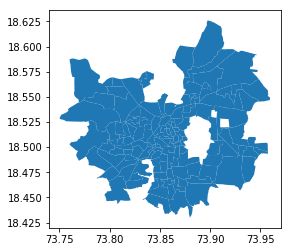

In [3]:
pnq_census.plot()

For each of these individual wards, we will now get the street network, and certain important basic stats using OSMNx.

### Ward 1

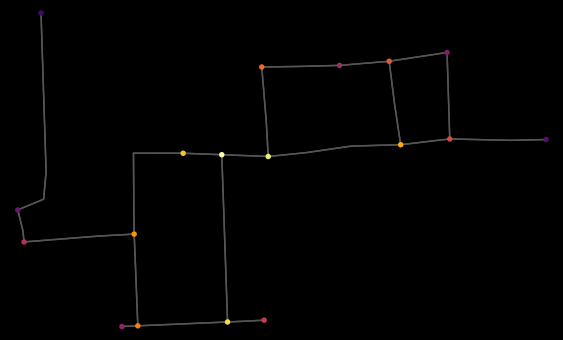

{'n': 18,
 'm': 40,
 'k_avg': 4.444444444444445,
 'intersection_count': 18,
 'streets_per_node_avg': 3.2222222222222223,
 'streets_per_node_counts': {0: 0, 1: 0, 2: 0, 3: 14, 4: 4},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.7777777777777778,
  4: 0.2222222222222222},
 'edge_length_total': 2729.142,
 'edge_length_avg': 68.22855,
 'street_length_total': 1364.5710000000001,
 'street_length_avg': 68.22855000000001,
 'street_segments_count': 20,
 'node_density_km': 244.6095728773384,
 'intersection_density_km': 244.6095728773384,
 'edge_density_km': 37087.45883008917,
 'street_density_km': 18543.729415044585,
 'circuity_avg': 1.0336353569894994,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 15,
 'clean_intersection_density_km': 203.84131073111533}

In [4]:
wardno = pnq_census[(pnq_census['Ward']== 1)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w1 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w1

### Ward 2

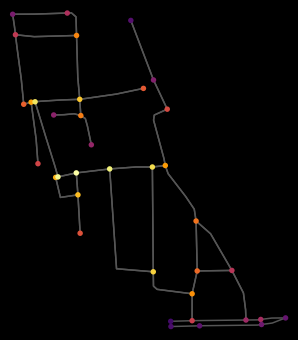

{'n': 37,
 'm': 81,
 'k_avg': 4.378378378378378,
 'intersection_count': 32,
 'streets_per_node_avg': 2.810810810810811,
 'streets_per_node_counts': {0: 0, 1: 5, 2: 0, 3: 30, 4: 1, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.13513513513513514,
  2: 0.0,
  3: 0.8108108108108109,
  4: 0.02702702702702703,
  5: 0.02702702702702703},
 'edge_length_total': 6355.269000000001,
 'edge_length_avg': 78.46011111111113,
 'street_length_total': 3388.4390000000003,
 'street_length_avg': 77.00997727272728,
 'street_segments_count': 44,
 'node_density_km': 244.00139686428622,
 'intersection_density_km': 211.02823512586917,
 'edge_density_km': 41910.66252562962,
 'street_density_km': 22345.509437552035,
 'circuity_avg': 1.04094469079398,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 23,
 'clean_intersection_density_km': 151.67654399671846}

In [5]:
wardno = pnq_census[(pnq_census['Ward']== 2)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w2 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w2

### Ward 3

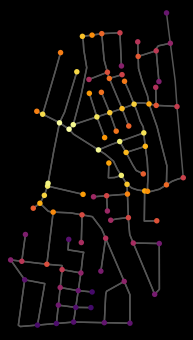

{'n': 90,
 'm': 205,
 'k_avg': 4.555555555555555,
 'intersection_count': 63,
 'streets_per_node_avg': 2.533333333333333,
 'streets_per_node_counts': {0: 0, 1: 27, 2: 0, 3: 52, 4: 10, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3,
  2: 0.0,
  3: 0.5777777777777777,
  4: 0.1111111111111111,
  5: 0.011111111111111112},
 'edge_length_total': 15179.249999999989,
 'edge_length_avg': 74.04512195121946,
 'street_length_total': 7823.335,
 'street_length_avg': 75.224375,
 'street_segments_count': 104,
 'node_density_km': 277.7521567829089,
 'intersection_density_km': 194.4265097480362,
 'edge_density_km': 46845.21584274407,
 'street_density_km': 24143.868549835763,
 'circuity_avg': 1.0375651767902476,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 50,
 'clean_intersection_density_km': 154.3067537682827}

In [6]:
wardno = pnq_census[(pnq_census['Ward']== 3)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w3 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w3

### Ward 4

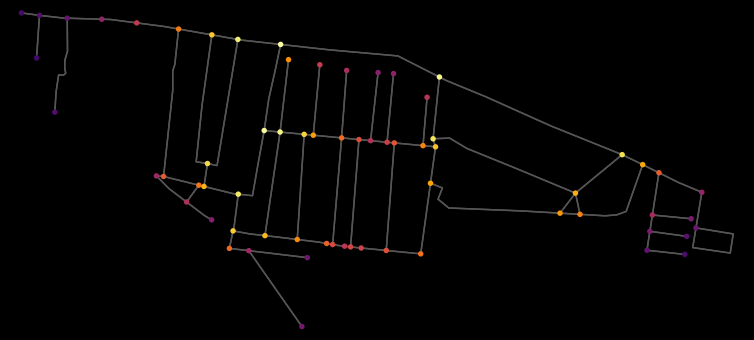

{'n': 67,
 'm': 164,
 'k_avg': 4.895522388059701,
 'intersection_count': 53,
 'streets_per_node_avg': 2.6865671641791047,
 'streets_per_node_counts': {0: 0, 1: 14, 2: 0, 3: 46, 4: 7},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.208955223880597,
  2: 0.0,
  3: 0.6865671641791045,
  4: 0.1044776119402985},
 'edge_length_total': 15494.770000000002,
 'edge_length_avg': 94.4803048780488,
 'street_length_total': 7958.473999999999,
 'street_length_avg': 95.88522891566264,
 'street_segments_count': 83,
 'node_density_km': 166.01592698029046,
 'intersection_density_km': 131.32603179037903,
 'edge_density_km': 38393.71052084173,
 'street_density_km': 19719.902066545375,
 'circuity_avg': 1.0498239112984153,
 'self_loop_proportion': 0.012195121951219513,
 'clean_intersection_count': 41,
 'clean_intersection_density_km': 101.59183591331208}

In [7]:
wardno = pnq_census[(pnq_census['Ward']== 4)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w4 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w4

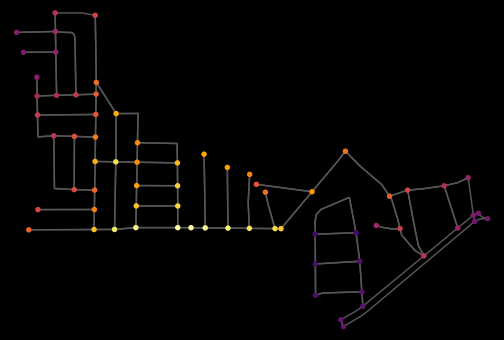

{'n': 70,
 'm': 171,
 'k_avg': 4.885714285714286,
 'intersection_count': 59,
 'streets_per_node_avg': 2.8285714285714287,
 'streets_per_node_counts': {0: 0, 1: 11, 2: 0, 3: 49, 4: 10},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.15714285714285714,
  2: 0.0,
  3: 0.7,
  4: 0.14285714285714285},
 'edge_length_total': 11404.451000000006,
 'edge_length_avg': 66.69269590643279,
 'street_length_total': 6125.236,
 'street_length_avg': 67.31028571428571,
 'street_segments_count': 91,
 'node_density_km': 229.81798422866243,
 'intersection_density_km': 193.70372956415832,
 'edge_density_km': 37442.11342935078,
 'street_density_km': 20109.848434926218,
 'circuity_avg': 1.044837078425512,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 50,
 'clean_intersection_density_km': 164.15570302047314}

In [8]:
wardno = pnq_census[(pnq_census['Ward']== 5)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w5 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w5

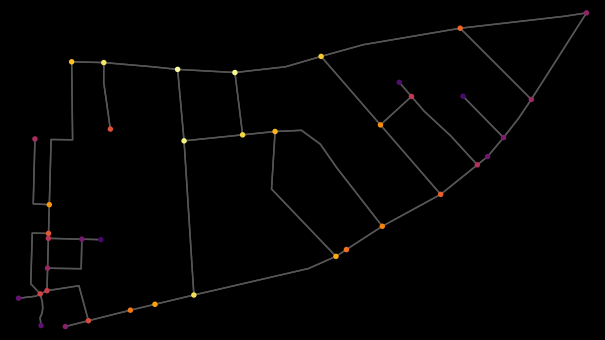

{'n': 39,
 'm': 96,
 'k_avg': 4.923076923076923,
 'intersection_count': 32,
 'streets_per_node_avg': 2.6923076923076925,
 'streets_per_node_counts': {0: 0, 1: 7, 2: 0, 3: 30, 4: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1794871794871795,
  2: 0.0,
  3: 0.7692307692307693,
  4: 0.05128205128205128},
 'edge_length_total': 8455.434000000001,
 'edge_length_avg': 88.07743750000002,
 'street_length_total': 4227.716999999999,
 'street_length_avg': 88.07743749999997,
 'street_segments_count': 48,
 'node_density_km': 190.21879034904134,
 'intersection_density_km': 156.0769561838288,
 'edge_density_km': 41240.57506041426,
 'street_density_km': 20620.287530207122,
 'circuity_avg': 1.039993147133233,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 28,
 'clean_intersection_density_km': 136.5673366608502}

In [9]:
wardno = pnq_census[(pnq_census['Ward']== 6)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w6 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w6

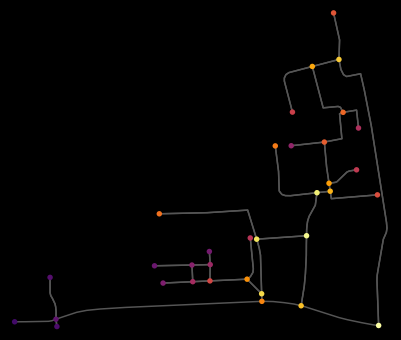

{'n': 34,
 'm': 68,
 'k_avg': 4.0,
 'intersection_count': 21,
 'streets_per_node_avg': 2.2941176470588234,
 'streets_per_node_counts': {0: 0, 1: 13, 2: 0, 3: 19, 4: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.38235294117647056,
  2: 0.0,
  3: 0.5588235294117647,
  4: 0.058823529411764705},
 'edge_length_total': 7531.202,
 'edge_length_avg': 110.7529705882353,
 'street_length_total': 4180.523,
 'street_length_avg': 116.12563888888889,
 'street_segments_count': 36,
 'node_density_km': 108.82929395050874,
 'intersection_density_km': 67.21809332237305,
 'edge_density_km': 24106.335184078216,
 'street_density_km': 13381.275483348902,
 'circuity_avg': 1.08136219040032,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 18,
 'clean_intersection_density_km': 57.61550856203404}

In [10]:
wardno = pnq_census[(pnq_census['Ward']== 7)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w7 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w7

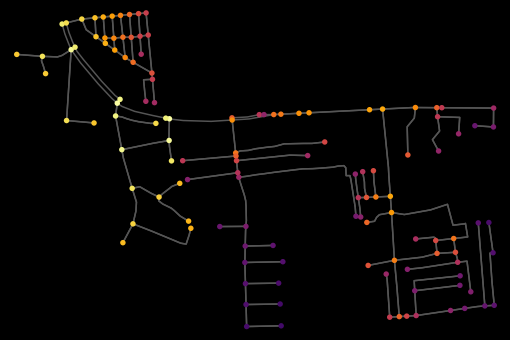

{'n': 126,
 'm': 273,
 'k_avg': 4.333333333333333,
 'intersection_count': 86,
 'streets_per_node_avg': 2.5396825396825395,
 'streets_per_node_counts': {0: 0, 1: 40, 2: 0, 3: 65, 4: 20, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.31746031746031744,
  2: 0.0,
  3: 0.5158730158730159,
  4: 0.15873015873015872,
  5: 0.007936507936507936},
 'edge_length_total': 19291.556000000008,
 'edge_length_avg': 70.66504029304032,
 'street_length_total': 10148.966000000002,
 'street_length_avg': 71.4715915492958,
 'street_segments_count': 142,
 'node_density_km': 184.76959468120103,
 'intersection_density_km': 126.11258049669277,
 'edge_density_km': 28289.6268483309,
 'street_density_km': 14882.701065502306,
 'circuity_avg': 1.04690674156912,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 49,
 'clean_intersection_density_km': 71.85484237602262}

In [11]:
wardno = pnq_census[(pnq_census['Ward']== 8)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w8 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w8

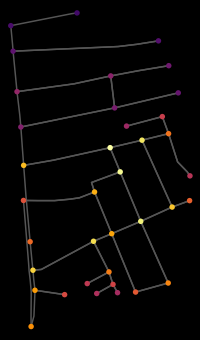

{'n': 37,
 'm': 74,
 'k_avg': 4.0,
 'intersection_count': 28,
 'streets_per_node_avg': 2.6216216216216215,
 'streets_per_node_counts': {0: 0, 1: 9, 2: 0, 3: 24, 4: 4},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.24324324324324326,
  2: 0.0,
  3: 0.6486486486486487,
  4: 0.10810810810810811},
 'edge_length_total': 7591.814999999999,
 'edge_length_avg': 102.59209459459457,
 'street_length_total': 4327.785000000001,
 'street_length_avg': 103.04250000000002,
 'street_segments_count': 42,
 'node_density_km': 182.60167381752768,
 'intersection_density_km': 138.18505045650744,
 'edge_density_km': 37466.97638683821,
 'street_density_km': 21358.399592497004,
 'circuity_avg': 1.0072297965128354,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 27,
 'clean_intersection_density_km': 133.24987008306073}

In [12]:
wardno = pnq_census[(pnq_census['Ward']== 9)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w9 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w9

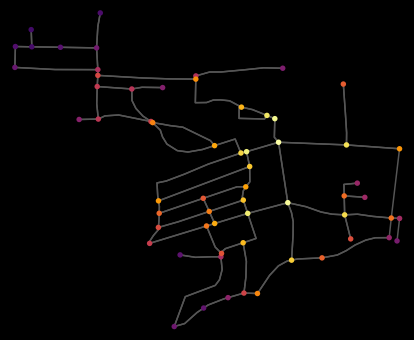

{'n': 62,
 'm': 153,
 'k_avg': 4.935483870967742,
 'intersection_count': 55,
 'streets_per_node_avg': 2.8870967741935485,
 'streets_per_node_counts': {0: 0, 1: 7, 2: 0, 3: 48, 4: 7},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.11290322580645161,
  2: 0.0,
  3: 0.7741935483870968,
  4: 0.11290322580645161},
 'edge_length_total': 8110.618,
 'edge_length_avg': 53.0105751633987,
 'street_length_total': 4135.564000000001,
 'street_length_avg': 53.0200512820513,
 'street_segments_count': 78,
 'node_density_km': 406.2465310446365,
 'intersection_density_km': 360.37998721701626,
 'edge_density_km': 53143.71656658368,
 'street_density_km': 27097.718208275513,
 'circuity_avg': 1.0420975180051735,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 29,
 'clean_intersection_density_km': 190.01853871442677}

In [13]:
wardno = pnq_census[(pnq_census['Ward']== 10)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w10 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w10

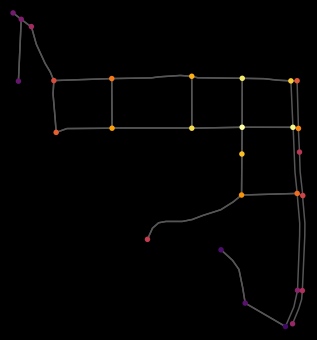

{'n': 28,
 'm': 61,
 'k_avg': 4.357142857142857,
 'intersection_count': 26,
 'streets_per_node_avg': 3.2142857142857144,
 'streets_per_node_counts': {0: 0, 1: 2, 2: 0, 3: 16, 4: 10},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.07142857142857142,
  2: 0.0,
  3: 0.5714285714285714,
  4: 0.35714285714285715},
 'edge_length_total': 4416.9270000000015,
 'edge_length_avg': 72.40863934426233,
 'street_length_total': 2588.9759999999997,
 'street_length_avg': 73.97074285714285,
 'street_segments_count': 35,
 'node_density_km': 227.97447200877224,
 'intersection_density_km': 211.6905811510028,
 'edge_density_km': 35962.378597367526,
 'street_density_km': 21079.30130869225,
 'circuity_avg': 1.0088697930465975,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 19,
 'clean_intersection_density_km': 154.69696314880974}

In [14]:
wardno = pnq_census[(pnq_census['Ward']== 11)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w11 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w11

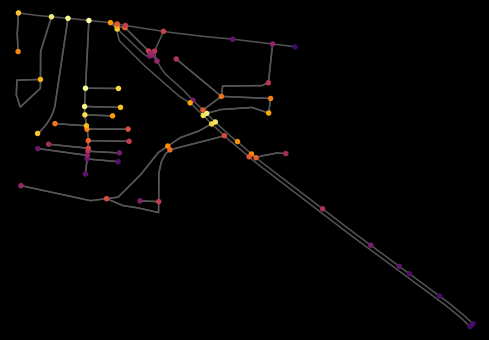

{'n': 75,
 'm': 140,
 'k_avg': 3.7333333333333334,
 'intersection_count': 58,
 'streets_per_node_avg': 2.72,
 'streets_per_node_counts': {0: 0, 1: 17, 2: 0, 3: 46, 4: 11, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.22666666666666666,
  2: 0.0,
  3: 0.6133333333333333,
  4: 0.14666666666666667,
  5: 0.013333333333333334},
 'edge_length_total': 11762.88000000001,
 'edge_length_avg': 84.0205714285715,
 'street_length_total': 7739.397000000003,
 'street_length_avg': 84.12388043478263,
 'street_segments_count': 92,
 'node_density_km': 151.52854346072522,
 'intersection_density_km': 117.1820736096275,
 'edge_density_km': 23765.494310710626,
 'street_density_km': 15636.527395657424,
 'circuity_avg': 1.0569809822639598,
 'self_loop_proportion': 0.014285714285714285,
 'clean_intersection_count': 32,
 'clean_intersection_density_km': 64.65217854324275}

In [15]:
wardno = pnq_census[(pnq_census['Ward']== 12)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w12 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w12

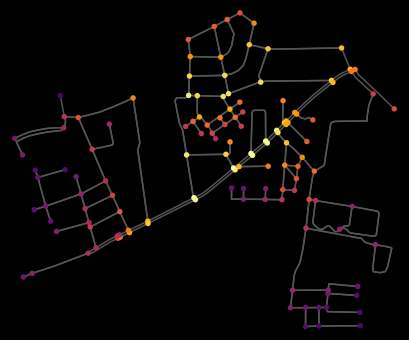

{'n': 131,
 'm': 303,
 'k_avg': 4.625954198473282,
 'intersection_count': 104,
 'streets_per_node_avg': 2.816793893129771,
 'streets_per_node_counts': {0: 0, 1: 27, 2: 0, 3: 75, 4: 28, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.20610687022900764,
  2: 0.0,
  3: 0.5725190839694656,
  4: 0.21374045801526717,
  5: 0.007633587786259542},
 'edge_length_total': 21261.939000000006,
 'edge_length_avg': 70.17141584158418,
 'street_length_total': 12185.353000000001,
 'street_length_avg': 70.84507558139535,
 'street_segments_count': 172,
 'node_density_km': 178.48092271849606,
 'intersection_density_km': 141.69477834140145,
 'edge_density_km': 28968.324362628842,
 'street_density_km': 16601.93165718011,
 'circuity_avg': 1.10032918730574,
 'self_loop_proportion': 0.006600660066006601,
 'clean_intersection_count': 71,
 'clean_intersection_density_km': 96.73393521384138}

In [16]:
wardno = pnq_census[(pnq_census['Ward']== 13)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w13 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w13

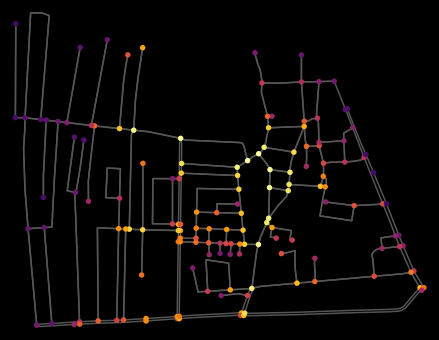

{'n': 151,
 'm': 356,
 'k_avg': 4.71523178807947,
 'intersection_count': 124,
 'streets_per_node_avg': 2.8543046357615895,
 'streets_per_node_counts': {0: 0, 1: 27, 2: 0, 3: 94, 4: 28, 5: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.17880794701986755,
  2: 0.0,
  3: 0.6225165562913907,
  4: 0.18543046357615894,
  5: 0.013245033112582781},
 'edge_length_total': 32643.040999999987,
 'edge_length_avg': 91.69393539325839,
 'street_length_total': 18987.132000000005,
 'street_length_avg': 91.28428846153848,
 'street_segments_count': 208,
 'node_density_km': 185.32206630901268,
 'intersection_density_km': 152.18500809481836,
 'edge_density_km': 40062.75370019746,
 'street_density_km': 23302.877718688593,
 'circuity_avg': 1.1155043486759975,
 'self_loop_proportion': 0.0056179775280898875,
 'clean_intersection_count': 75,
 'clean_intersection_density_km': 92.04738392831756}

In [17]:
wardno = pnq_census[(pnq_census['Ward']== 14)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w14 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w14

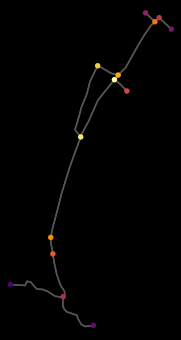

{'n': 14,
 'm': 28,
 'k_avg': 4.0,
 'intersection_count': 9,
 'streets_per_node_avg': 2.2857142857142856,
 'streets_per_node_counts': {0: 0, 1: 5, 2: 0, 3: 9},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.35714285714285715,
  2: 0.0,
  3: 0.6428571428571429},
 'edge_length_total': 2502.2899999999995,
 'edge_length_avg': 89.36749999999998,
 'street_length_total': 1251.1449999999998,
 'street_length_avg': 89.36749999999998,
 'street_segments_count': 14,
 'node_density_km': 135.50436992588138,
 'intersection_density_km': 87.10995209520947,
 'edge_density_km': 24219.373558702402,
 'street_density_km': 12109.686779351201,
 'circuity_avg': 1.0448804564365723,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 7,
 'clean_intersection_density_km': 67.75218496294069}

In [18]:
wardno = pnq_census[(pnq_census['Ward']== 15)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w15 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w15

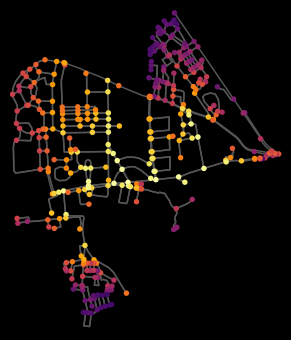

{'n': 336,
 'm': 827,
 'k_avg': 4.9226190476190474,
 'intersection_count': 265,
 'streets_per_node_avg': 2.7172619047619047,
 'streets_per_node_counts': {0: 0, 1: 71, 2: 0, 3: 221, 4: 42, 5: 1, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2113095238095238,
  2: 0.0,
  3: 0.6577380952380952,
  4: 0.125,
  5: 0.002976190476190476,
  6: 0.002976190476190476},
 'edge_length_total': 85613.694,
 'edge_length_avg': 103.5232091898428,
 'street_length_total': 47368.70399999992,
 'street_length_avg': 106.44652584269645,
 'street_segments_count': 445,
 'node_density_km': 75.12598678518634,
 'intersection_density_km': 59.251150291888045,
 'edge_density_km': 19142.30132165175,
 'street_density_km': 10591.132829569635,
 'circuity_avg': 1.1133452143435871,
 'self_loop_proportion': 0.0024183796856106408,
 'clean_intersection_count': 214,
 'clean_intersection_density_km': 47.8480987262794}

In [19]:
wardno = pnq_census[(pnq_census['Ward']== 16)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w16 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w16

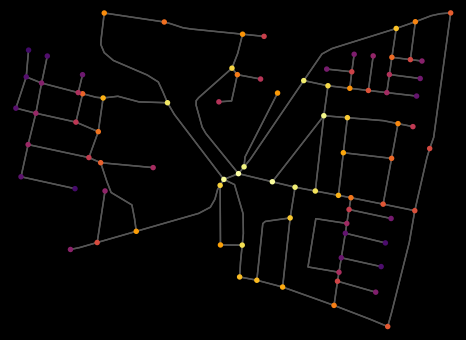

{'n': 86,
 'm': 210,
 'k_avg': 4.883720930232558,
 'intersection_count': 65,
 'streets_per_node_avg': 2.627906976744186,
 'streets_per_node_counts': {0: 0, 1: 21, 2: 0, 3: 55, 4: 10},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2441860465116279,
  2: 0.0,
  3: 0.6395348837209303,
  4: 0.11627906976744186},
 'edge_length_total': 17246.451999999987,
 'edge_length_avg': 82.12596190476184,
 'street_length_total': 8623.225999999997,
 'street_length_avg': 82.12596190476188,
 'street_segments_count': 105,
 'node_density_km': 201.5466597658452,
 'intersection_density_km': 152.3317777299993,
 'edge_density_km': 40418.1952722323,
 'street_density_km': 20209.09763611616,
 'circuity_avg': 1.0389388336724827,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 54,
 'clean_intersection_density_km': 126.55255380646093}

In [20]:
wardno = pnq_census[(pnq_census['Ward']== 17)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w17 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w17

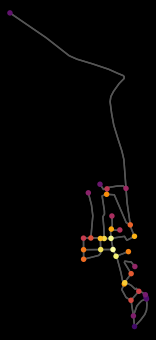

{'n': 33,
 'm': 80,
 'k_avg': 4.848484848484849,
 'intersection_count': 26,
 'streets_per_node_avg': 2.6363636363636362,
 'streets_per_node_counts': {0: 0, 1: 7, 2: 0, 3: 24, 4: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.21212121212121213,
  2: 0.0,
  3: 0.7272727272727273,
  4: 0.06060606060606061},
 'edge_length_total': 9528.588000000005,
 'edge_length_avg': 119.10735000000007,
 'street_length_total': 4764.294000000002,
 'street_length_avg': 119.10735000000004,
 'street_segments_count': 40,
 'node_density_km': 95.17441081343762,
 'intersection_density_km': 74.98589942876903,
 'edge_density_km': 27481.143902545224,
 'street_density_km': 13740.57195127261,
 'circuity_avg': 1.1099873729731324,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 21,
 'clean_intersection_density_km': 60.56553415400575}

In [21]:
wardno = pnq_census[(pnq_census['Ward']== 18)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w18 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w18

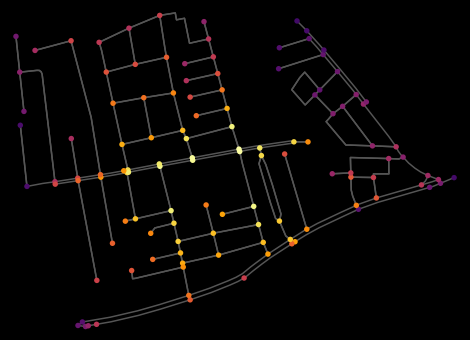

{'n': 119,
 'm': 255,
 'k_avg': 4.285714285714286,
 'intersection_count': 97,
 'streets_per_node_avg': 2.857142857142857,
 'streets_per_node_counts': {0: 0, 1: 22, 2: 0, 3: 72, 4: 23, 5: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.18487394957983194,
  2: 0.0,
  3: 0.6050420168067226,
  4: 0.19327731092436976,
  5: 0.01680672268907563},
 'edge_length_total': 23034.613000000016,
 'edge_length_avg': 90.33181568627457,
 'street_length_total': 13859.387,
 'street_length_avg': 89.99601948051948,
 'street_segments_count': 154,
 'node_density_km': 160.8741711877987,
 'intersection_density_km': 131.13272777492836,
 'edge_density_km': 31140.11995803946,
 'street_density_km': 18736.280645344134,
 'circuity_avg': 1.0452600446102596,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 69,
 'clean_intersection_density_km': 93.27998161309337}

In [22]:
wardno = pnq_census[(pnq_census['Ward']== 19)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w19 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w19

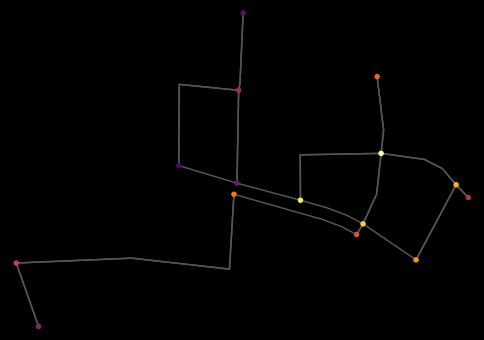

{'n': 15,
 'm': 29,
 'k_avg': 3.8666666666666667,
 'intersection_count': 11,
 'streets_per_node_avg': 2.6,
 'streets_per_node_counts': {0: 0, 1: 4, 2: 0, 3: 9, 4: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.26666666666666666,
  2: 0.0,
  3: 0.6,
  4: 0.13333333333333333},
 'edge_length_total': 2252.005,
 'edge_length_avg': 77.6553448275862,
 'street_length_total': 1288.8010000000002,
 'street_length_avg': 75.81182352941177,
 'street_segments_count': 17,
 'node_density_km': 268.0740986857364,
 'intersection_density_km': 196.58767236954,
 'edge_density_km': 40246.94737405145,
 'street_density_km': 23032.94443068505,
 'circuity_avg': 1.1224465750006496,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 9,
 'clean_intersection_density_km': 160.84445921144183}

In [23]:
wardno = pnq_census[(pnq_census['Ward']== 20)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w20 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w20

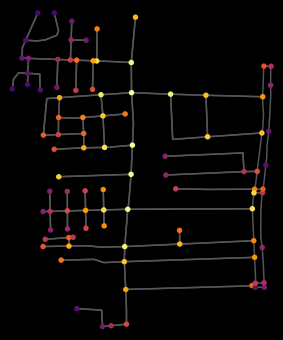

{'n': 96,
 'm': 198,
 'k_avg': 4.125,
 'intersection_count': 64,
 'streets_per_node_avg': 2.5520833333333335,
 'streets_per_node_counts': {0: 0, 1: 32, 2: 0, 3: 43, 4: 21},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3333333333333333,
  2: 0.0,
  3: 0.4479166666666667,
  4: 0.21875},
 'edge_length_total': 17168.052999999993,
 'edge_length_avg': 86.70733838383835,
 'street_length_total': 9256.105999999998,
 'street_length_avg': 83.38834234234233,
 'street_segments_count': 111,
 'node_density_km': 192.31457147018295,
 'intersection_density_km': 128.20971431345532,
 'edge_density_km': 34392.36203825404,
 'street_density_km': 18542.5422799228,
 'circuity_avg': 1.0303908424081398,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 48,
 'clean_intersection_density_km': 96.15728573509148}

In [24]:
wardno = pnq_census[(pnq_census['Ward']== 21)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w21 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w21

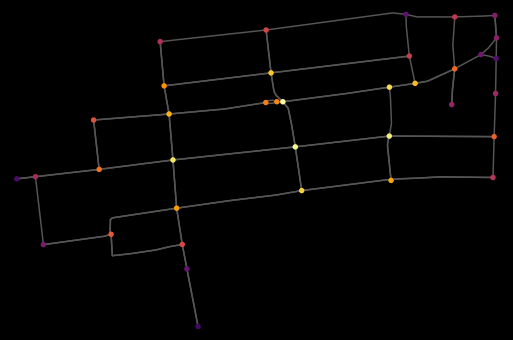

{'n': 37,
 'm': 88,
 'k_avg': 4.756756756756757,
 'intersection_count': 36,
 'streets_per_node_avg': 3.3783783783783785,
 'streets_per_node_counts': {0: 0, 1: 1, 2: 2, 3: 16, 4: 18},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.02702702702702703,
  2: 0.05405405405405406,
  3: 0.43243243243243246,
  4: 0.4864864864864865},
 'edge_length_total': 8861.598000000004,
 'edge_length_avg': 100.69997727272731,
 'street_length_total': 5084.558000000004,
 'street_length_avg': 97.7799615384616,
 'street_segments_count': 52,
 'node_density_km': 132.78386612436518,
 'intersection_density_km': 129.1951129858688,
 'edge_density_km': 31802.087634593045,
 'street_density_km': 18247.223480366767,
 'circuity_avg': 1.0147778105799101,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 33,
 'clean_intersection_density_km': 118.42885357037974}

In [25]:
wardno = pnq_census[(pnq_census['Ward']== 22)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w22 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w22

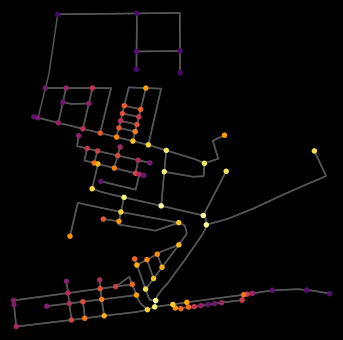

{'n': 103,
 'm': 260,
 'k_avg': 5.048543689320389,
 'intersection_count': 87,
 'streets_per_node_avg': 2.796116504854369,
 'streets_per_node_counts': {0: 0, 1: 16, 2: 0, 3: 77, 4: 9, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1553398058252427,
  2: 0.0,
  3: 0.7475728155339806,
  4: 0.08737864077669903,
  5: 0.009708737864077669},
 'edge_length_total': 19208.611999999986,
 'edge_length_avg': 73.87927692307687,
 'street_length_total': 9767.818000000001,
 'street_length_avg': 74.56349618320611,
 'street_segments_count': 131,
 'node_density_km': 146.9688290826123,
 'intersection_density_km': 124.13871971055602,
 'edge_density_km': 27408.419552837026,
 'street_density_km': 13937.522079146253,
 'circuity_avg': 1.0658100235929961,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 61,
 'clean_intersection_density_km': 87.03979198096457}

In [26]:
wardno = pnq_census[(pnq_census['Ward']== 23)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w23 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w23

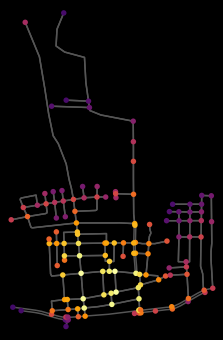

{'n': 133,
 'm': 317,
 'k_avg': 4.7669172932330826,
 'intersection_count': 105,
 'streets_per_node_avg': 2.8045112781954886,
 'streets_per_node_counts': {0: 0, 1: 28, 2: 0, 3: 75, 4: 30},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.21052631578947367,
  2: 0.0,
  3: 0.5639097744360902,
  4: 0.22556390977443608},
 'edge_length_total': 26262.093999999994,
 'edge_length_avg': 82.84572239747632,
 'street_length_total': 14199.023000000005,
 'street_length_avg': 81.60358045977014,
 'street_segments_count': 174,
 'node_density_km': 125.67544162148694,
 'intersection_density_km': 99.2174539117002,
 'edge_density_km': 24815.79143875941,
 'street_density_km': 13417.056286606397,
 'circuity_avg': 1.0477437630435533,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 80,
 'clean_intersection_density_km': 75.59425059939063}

In [27]:
wardno = pnq_census[(pnq_census['Ward']== 24)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w24 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w24

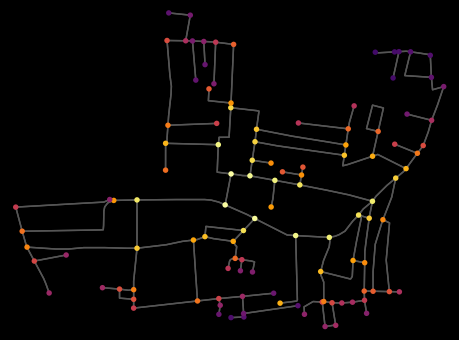

{'n': 113,
 'm': 262,
 'k_avg': 4.6371681415929205,
 'intersection_count': 86,
 'streets_per_node_avg': 2.584070796460177,
 'streets_per_node_counts': {0: 0, 1: 27, 2: 0, 3: 79, 4: 7},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.23893805309734514,
  2: 0.0,
  3: 0.6991150442477876,
  4: 0.061946902654867256},
 'edge_length_total': 23047.89000000001,
 'edge_length_avg': 87.96904580152676,
 'street_length_total': 11729.684999999996,
 'street_length_avg': 88.86124999999997,
 'street_segments_count': 132,
 'node_density_km': 136.89124266971407,
 'intersection_density_km': 104.18271566013638,
 'edge_density_km': 27920.83453995467,
 'street_density_km': 14209.656245790306,
 'circuity_avg': 1.0664555968030713,
 'self_loop_proportion': 0.007633587786259542,
 'clean_intersection_count': 69,
 'clean_intersection_density_km': 83.58845791336523}

In [28]:
wardno = pnq_census[(pnq_census['Ward']== 25)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w25 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w25

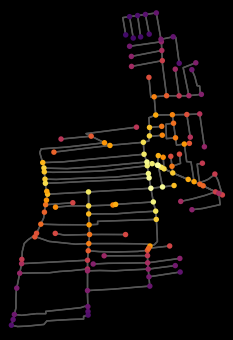

{'n': 134,
 'm': 330,
 'k_avg': 4.925373134328358,
 'intersection_count': 94,
 'streets_per_node_avg': 2.6343283582089554,
 'streets_per_node_counts': {0: 0, 1: 40, 2: 0, 3: 70, 4: 17, 5: 7},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.29850746268656714,
  2: 0.0,
  3: 0.5223880597014925,
  4: 0.12686567164179105,
  5: 0.05223880597014925},
 'edge_length_total': 26819.74200000001,
 'edge_length_avg': 81.27194545454549,
 'street_length_total': 13409.871000000001,
 'street_length_avg': 81.27194545454546,
 'street_segments_count': 165,
 'node_density_km': 254.3628569514422,
 'intersection_density_km': 178.43364592116095,
 'edge_density_km': 50910.04625239246,
 'street_density_km': 25455.02312619622,
 'circuity_avg': 1.0310452963674308,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 49,
 'clean_intersection_density_km': 93.01328351209455}

In [29]:
wardno = pnq_census[(pnq_census['Ward']== 26)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w26 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w26

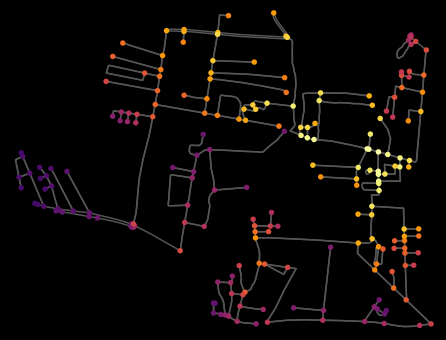

{'n': 204,
 'm': 442,
 'k_avg': 4.333333333333333,
 'intersection_count': 143,
 'streets_per_node_avg': 2.446078431372549,
 'streets_per_node_counts': {0: 0, 1: 61, 2: 0, 3: 134, 4: 9},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.29901960784313725,
  2: 0.0,
  3: 0.6568627450980392,
  4: 0.04411764705882353},
 'edge_length_total': 50448.36999999999,
 'edge_length_avg': 114.13658371040721,
 'street_length_total': 27273.577999999994,
 'street_length_avg': 115.07838818565398,
 'street_segments_count': 237,
 'node_density_km': 70.63211330703245,
 'intersection_density_km': 49.51172648483158,
 'edge_density_km': 17467.034245074003,
 'street_density_km': 9443.090448942095,
 'circuity_avg': 1.1054008724948456,
 'self_loop_proportion': 0.00904977375565611,
 'clean_intersection_count': 114,
 'clean_intersection_density_km': 39.47088684804755}

In [30]:
wardno = pnq_census[(pnq_census['Ward']== 27)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w27 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w27

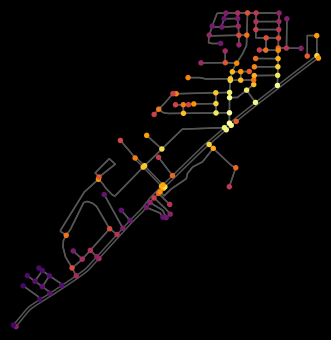

{'n': 127,
 'm': 276,
 'k_avg': 4.346456692913386,
 'intersection_count': 92,
 'streets_per_node_avg': 2.543307086614173,
 'streets_per_node_counts': {0: 0, 1: 35, 2: 0, 3: 80, 4: 12},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2755905511811024,
  2: 0.0,
  3: 0.6299212598425197,
  4: 0.09448818897637795},
 'edge_length_total': 22821.279000000013,
 'edge_length_avg': 82.68579347826092,
 'street_length_total': 13708.834000000006,
 'street_length_avg': 87.3174140127389,
 'street_segments_count': 157,
 'node_density_km': 184.19983538583213,
 'intersection_density_km': 133.43610122438233,
 'edge_density_km': 33099.809725150786,
 'street_density_km': 19883.188709698425,
 'circuity_avg': 1.06786011700217,
 'self_loop_proportion': 0.007246376811594203,
 'clean_intersection_count': 70,
 'clean_intersection_density_km': 101.52746832289961}

In [31]:
wardno = pnq_census[(pnq_census['Ward']== 28)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w28 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w28

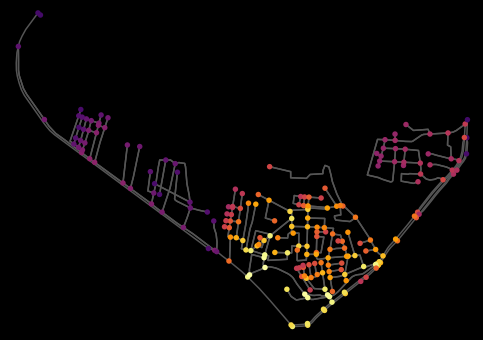

{'n': 220,
 'm': 508,
 'k_avg': 4.618181818181818,
 'intersection_count': 166,
 'streets_per_node_avg': 2.6227272727272726,
 'streets_per_node_counts': {0: 0, 1: 54, 2: 0, 3: 142, 4: 23, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.24545454545454545,
  2: 0.0,
  3: 0.6454545454545455,
  4: 0.10454545454545454,
  5: 0.004545454545454545},
 'edge_length_total': 52795.71599999999,
 'edge_length_avg': 103.92857480314959,
 'street_length_total': 30229.220000000005,
 'street_length_avg': 109.1307581227437,
 'street_segments_count': 277,
 'node_density_km': 73.54064196729851,
 'intersection_density_km': 55.48975712077979,
 'edge_density_km': 17648.32203528715,
 'street_density_km': 10104.892022594091,
 'circuity_avg': 1.0961321484156406,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 122,
 'clean_intersection_density_km': 40.78162872732009}

In [32]:
wardno = pnq_census[(pnq_census['Ward']== 29)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w29 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w29

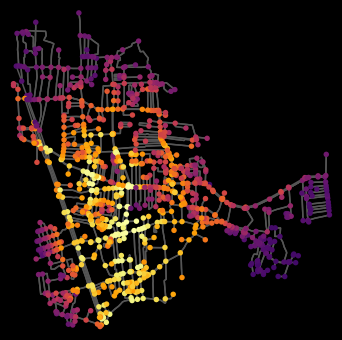

{'n': 1012,
 'm': 2395,
 'k_avg': 4.733201581027668,
 'intersection_count': 751,
 'streets_per_node_avg': 2.6699604743083003,
 'streets_per_node_counts': {0: 0,
  1: 261,
  2: 0,
  3: 603,
  4: 119,
  5: 19,
  6: 9,
  7: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.25790513833992096,
  2: 0.0,
  3: 0.5958498023715415,
  4: 0.11758893280632411,
  5: 0.018774703557312252,
  6: 0.008893280632411068,
  7: 0.0009881422924901185},
 'edge_length_total': 269025.2469999998,
 'edge_length_avg': 112.32786931106463,
 'street_length_total': 151557.50800000012,
 'street_length_avg': 113.52622322097388,
 'street_segments_count': 1335,
 'node_density_km': 78.90753990719651,
 'intersection_density_km': 58.556879911368156,
 'edge_density_km': 20976.403570845734,
 'street_density_km': 11817.223429590182,
 'circuity_avg': 1.0809150159349434,
 'self_loop_proportion': 0.008768267223382045,
 'clean_intersection_count': 525,
 'clean_intersection_density_km': 40.93523562379266}

In [33]:
wardno = pnq_census[(pnq_census['Ward']== 30)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w30 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w30

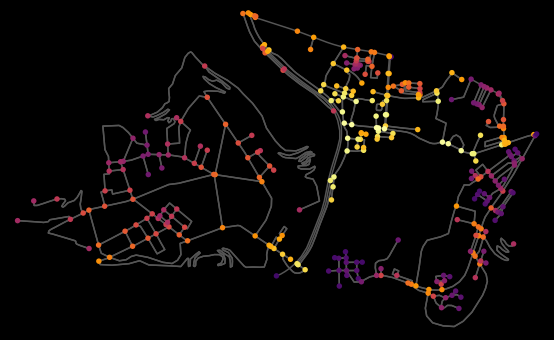

{'n': 329,
 'm': 754,
 'k_avg': 4.583586626139818,
 'intersection_count': 240,
 'streets_per_node_avg': 2.5501519756838906,
 'streets_per_node_counts': {0: 0, 1: 89, 2: 0, 3: 211, 4: 28, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.270516717325228,
  2: 0.0,
  3: 0.6413373860182371,
  4: 0.0851063829787234,
  5: 0.00303951367781155},
 'edge_length_total': 115948.92999999988,
 'edge_length_avg': 153.77842175066297,
 'street_length_total': 62637.04899999998,
 'street_length_avg': 153.89938329238325,
 'street_segments_count': 407,
 'node_density_km': 49.46139065352231,
 'intersection_density_km': 36.081257619590744,
 'edge_density_km': 17431.596725191204,
 'street_density_km': 9416.764589583032,
 'circuity_avg': 1.2187462101646873,
 'self_loop_proportion': 0.010610079575596816,
 'clean_intersection_count': 177,
 'clean_intersection_density_km': 26.609927494448172}

In [34]:
wardno = pnq_census[(pnq_census['Ward']== 31)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w31 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w31

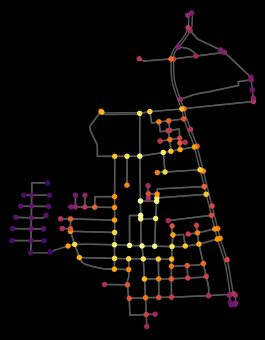

{'n': 148,
 'm': 354,
 'k_avg': 4.783783783783784,
 'intersection_count': 118,
 'streets_per_node_avg': 2.8378378378378377,
 'streets_per_node_counts': {0: 0, 1: 30, 2: 1, 3: 82, 4: 34, 5: 0, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.20270270270270271,
  2: 0.006756756756756757,
  3: 0.5540540540540541,
  4: 0.22972972972972974,
  5: 0.0,
  6: 0.006756756756756757},
 'edge_length_total': 23379.34199999998,
 'edge_length_avg': 66.04333898305079,
 'street_length_total': 12965.930999999997,
 'street_length_avg': 66.15270918367345,
 'street_segments_count': 196,
 'node_density_km': 217.71388670603096,
 'intersection_density_km': 173.58269345480846,
 'edge_density_km': 34391.94199628072,
 'street_density_km': 19073.400221433876,
 'circuity_avg': 1.0327291436417319,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 89,
 'clean_intersection_density_km': 130.92253997862673}

In [35]:
wardno = pnq_census[(pnq_census['Ward']== 32)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w32 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w32

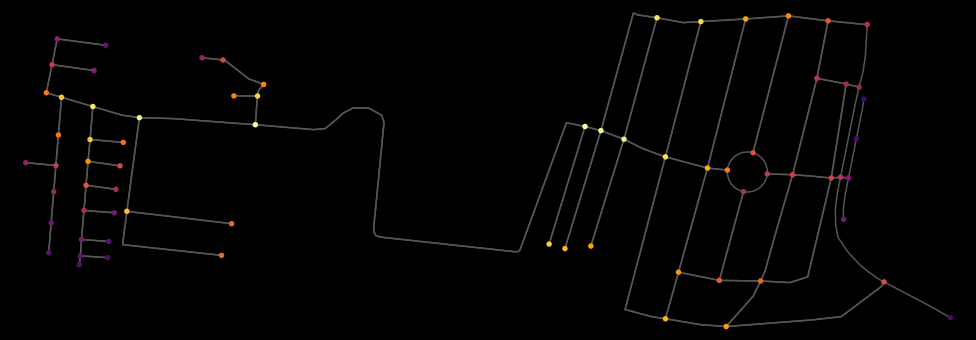

{'n': 71,
 'm': 159,
 'k_avg': 4.47887323943662,
 'intersection_count': 54,
 'streets_per_node_avg': 2.6901408450704225,
 'streets_per_node_counts': {0: 0, 1: 17, 2: 0, 3: 43, 4: 10, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.23943661971830985,
  2: 0.0,
  3: 0.6056338028169014,
  4: 0.14084507042253522,
  5: 0.014084507042253521},
 'edge_length_total': 17242.147999999994,
 'edge_length_avg': 108.44118238993707,
 'street_length_total': 9132.242999999997,
 'street_length_avg': 107.43815294117643,
 'street_segments_count': 85,
 'node_density_km': 104.72388710037558,
 'intersection_density_km': 79.64915356929974,
 'edge_density_km': 25431.89803549248,
 'street_density_km': 13469.915280354857,
 'circuity_avg': 1.0783876380427797,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 46,
 'clean_intersection_density_km': 67.84927896644052}

In [36]:
wardno = pnq_census[(pnq_census['Ward']== 33)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w33 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w33

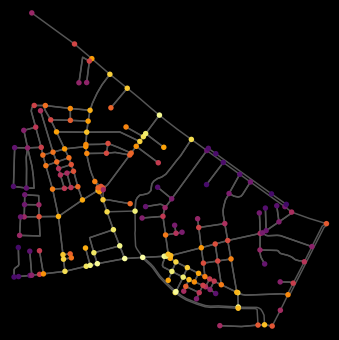

{'n': 182,
 'm': 437,
 'k_avg': 4.802197802197802,
 'intersection_count': 152,
 'streets_per_node_avg': 2.8351648351648353,
 'streets_per_node_counts': {0: 0, 1: 30, 2: 0, 3: 125, 4: 24, 5: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.16483516483516483,
  2: 0.0,
  3: 0.6868131868131868,
  4: 0.13186813186813187,
  5: 0.016483516483516484},
 'edge_length_total': 37585.56799999996,
 'edge_length_avg': 86.00816475972532,
 'street_length_total': 21455.377000000015,
 'street_length_avg': 89.02646058091293,
 'street_segments_count': 241,
 'node_density_km': 136.08374874144792,
 'intersection_density_km': 113.65236158626419,
 'edge_density_km': 28103.21424184945,
 'street_density_km': 16042.462268247487,
 'circuity_avg': 1.0250645327222585,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 119,
 'clean_intersection_density_km': 88.9778357155621}

In [37]:
wardno = pnq_census[(pnq_census['Ward']== 34)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w34 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w34

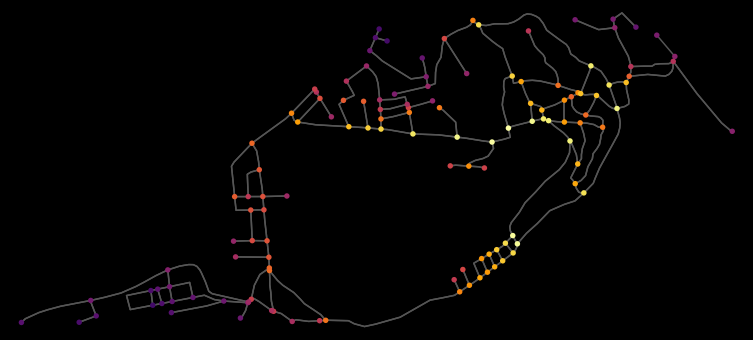

{'n': 129,
 'm': 327,
 'k_avg': 5.069767441860465,
 'intersection_count': 107,
 'streets_per_node_avg': 2.7364341085271318,
 'streets_per_node_counts': {0: 0, 1: 22, 2: 0, 3: 97, 4: 10},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.17054263565891473,
  2: 0.0,
  3: 0.751937984496124,
  4: 0.07751937984496124},
 'edge_length_total': 27611.942999999996,
 'edge_length_avg': 84.44019266055045,
 'street_length_total': 13848.622000000005,
 'street_length_avg': 84.44281707317076,
 'street_segments_count': 164,
 'node_density_km': 114.27965995776138,
 'intersection_density_km': 94.79010554636021,
 'edge_density_km': 24461.11206831852,
 'street_density_km': 12268.339635996697,
 'circuity_avg': 1.0598285569838592,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 78,
 'clean_intersection_density_km': 69.09932927678595}

In [38]:
wardno = pnq_census[(pnq_census['Ward']== 35)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w35 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w35

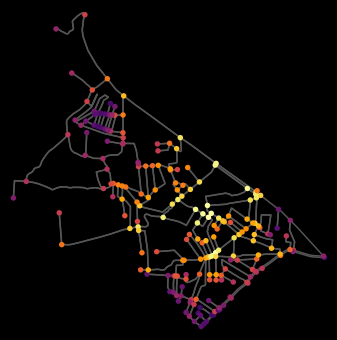

{'n': 209,
 'm': 507,
 'k_avg': 4.851674641148326,
 'intersection_count': 160,
 'streets_per_node_avg': 2.650717703349282,
 'streets_per_node_counts': {0: 0, 1: 49, 2: 0, 3: 140, 4: 15, 5: 5},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.23444976076555024,
  2: 0.0,
  3: 0.6698564593301436,
  4: 0.07177033492822966,
  5: 0.023923444976076555},
 'edge_length_total': 57668.777000000075,
 'edge_length_avg': 113.74512228796858,
 'street_length_total': 30241.166000000005,
 'street_length_avg': 113.26279400749065,
 'street_segments_count': 267,
 'node_density_km': 81.79149931058987,
 'intersection_density_km': 62.61550186456641,
 'edge_density_km': 22568.496336067306,
 'street_density_km': 11834.786162872892,
 'circuity_avg': 1.0943260569021052,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 110,
 'clean_intersection_density_km': 43.04815753188941}

In [39]:
wardno = pnq_census[(pnq_census['Ward']== 36)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w36 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w36

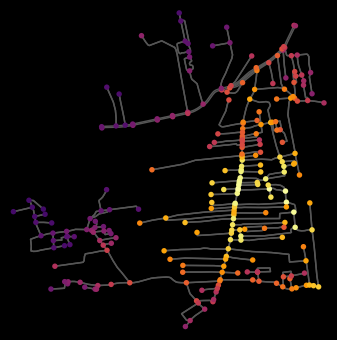

{'n': 254,
 'm': 562,
 'k_avg': 4.425196850393701,
 'intersection_count': 175,
 'streets_per_node_avg': 2.4488188976377954,
 'streets_per_node_counts': {0: 0, 1: 79, 2: 0, 3: 159, 4: 14, 5: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3110236220472441,
  2: 0.0,
  3: 0.6259842519685039,
  4: 0.05511811023622047,
  5: 0.007874015748031496},
 'edge_length_total': 69418.76,
 'edge_length_avg': 123.5209252669039,
 'street_length_total': 37085.053,
 'street_length_avg': 125.28734121621622,
 'street_segments_count': 296,
 'node_density_km': 67.49846874381714,
 'intersection_density_km': 46.50485051247244,
 'edge_density_km': 18447.480323206863,
 'street_density_km': 9855.056262926386,
 'circuity_avg': 1.063980630409767,
 'self_loop_proportion': 0.0035587188612099642,
 'clean_intersection_count': 115,
 'clean_intersection_density_km': 30.560330336767603}

In [40]:
wardno = pnq_census[(pnq_census['Ward']== 37)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w37 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w37

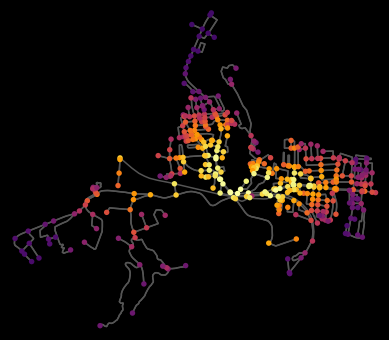

{'n': 392,
 'm': 901,
 'k_avg': 4.596938775510204,
 'intersection_count': 288,
 'streets_per_node_avg': 2.5535714285714284,
 'streets_per_node_counts': {0: 0, 1: 104, 2: 0, 3: 256, 4: 31, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2653061224489796,
  2: 0.0,
  3: 0.6530612244897959,
  4: 0.07908163265306123,
  5: 0.002551020408163265},
 'edge_length_total': 102772.27200000027,
 'edge_length_avg': 114.06467480577167,
 'street_length_total': 55964.99100000006,
 'street_length_avg': 116.59373125000012,
 'street_segments_count': 480,
 'node_density_km': 48.721978419765996,
 'intersection_density_km': 35.79573924717502,
 'edge_density_km': 12773.643924832486,
 'street_density_km': 6955.931336133676,
 'circuity_avg': 1.1559246061440178,
 'self_loop_proportion': 0.006659267480577136,
 'clean_intersection_count': 233,
 'clean_intersection_density_km': 28.95974737705479}

In [41]:
wardno = pnq_census[(pnq_census['Ward']== 38)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w38 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w38

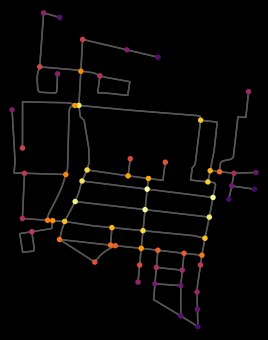

{'n': 63,
 'm': 162,
 'k_avg': 5.142857142857143,
 'intersection_count': 54,
 'streets_per_node_avg': 2.873015873015873,
 'streets_per_node_counts': {0: 0, 1: 9, 2: 0, 3: 44, 4: 10},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.14285714285714285,
  2: 0.0,
  3: 0.6984126984126984,
  4: 0.15873015873015872},
 'edge_length_total': 19130.28600000001,
 'edge_length_avg': 118.08818518518525,
 'street_length_total': 10091.544999999995,
 'street_length_avg': 121.58487951807223,
 'street_segments_count': 83,
 'node_density_km': 103.99353484247051,
 'intersection_density_km': 89.13731557926043,
 'edge_density_km': 31578.191487102013,
 'street_density_km': 16658.02280272791,
 'circuity_avg': 1.1293261276345343,
 'self_loop_proportion': 0.024691358024691357,
 'clean_intersection_count': 51,
 'clean_intersection_density_km': 84.18524249152374}

In [42]:
wardno = pnq_census[(pnq_census['Ward']== 39)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w39 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w39

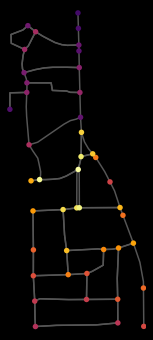

{'n': 44,
 'm': 92,
 'k_avg': 4.181818181818182,
 'intersection_count': 42,
 'streets_per_node_avg': 3.1136363636363638,
 'streets_per_node_counts': {0: 0, 1: 2, 2: 0, 3: 33, 4: 9},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.045454545454545456,
  2: 0.0,
  3: 0.75,
  4: 0.20454545454545456},
 'edge_length_total': 7326.9619999999995,
 'edge_length_avg': 79.64089130434782,
 'street_length_total': 4431.359999999998,
 'street_length_avg': 77.74315789473681,
 'street_segments_count': 57,
 'node_density_km': 213.40058175151802,
 'intersection_density_km': 203.7005553082672,
 'edge_density_km': 35535.86257434695,
 'street_density_km': 21492.154589781963,
 'circuity_avg': 1.0353187862315183,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 35,
 'clean_intersection_density_km': 169.75046275688933}

In [43]:
wardno = pnq_census[(pnq_census['Ward']== 40)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w40 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w40

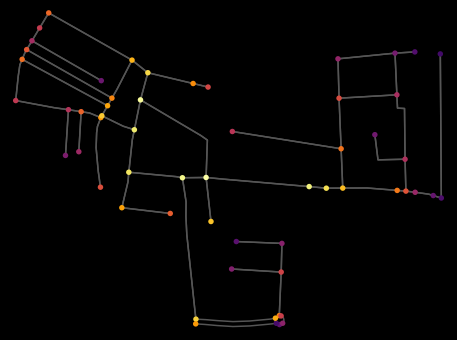

{'n': 58,
 'm': 124,
 'k_avg': 4.275862068965517,
 'intersection_count': 46,
 'streets_per_node_avg': 2.689655172413793,
 'streets_per_node_counts': {0: 0, 1: 12, 2: 0, 3: 40, 4: 6},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.20689655172413793,
  2: 0.0,
  3: 0.6896551724137931,
  4: 0.10344827586206896},
 'edge_length_total': 9780.770000000008,
 'edge_length_avg': 78.87717741935491,
 'street_length_total': 5062.603,
 'street_length_avg': 76.70610606060606,
 'street_segments_count': 66,
 'node_density_km': 187.5283745606968,
 'intersection_density_km': 148.7294005136561,
 'edge_density_km': 31623.653449172893,
 'street_density_km': 16368.650200622538,
 'circuity_avg': 1.0155291563904247,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 30,
 'clean_intersection_density_km': 96.99743511760178}

In [44]:
wardno = pnq_census[(pnq_census['Ward']== 41)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w41 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w41

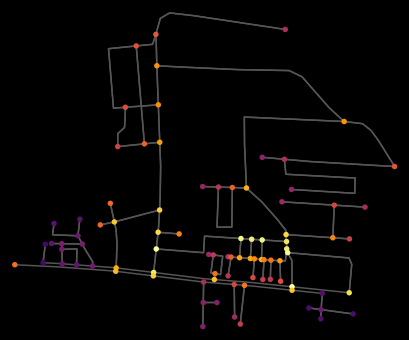

{'n': 88,
 'm': 191,
 'k_avg': 4.340909090909091,
 'intersection_count': 60,
 'streets_per_node_avg': 2.4318181818181817,
 'streets_per_node_counts': {0: 0, 1: 28, 2: 0, 3: 54, 4: 6},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3181818181818182,
  2: 0.0,
  3: 0.6136363636363636,
  4: 0.06818181818181818},
 'edge_length_total': 15548.301999999998,
 'edge_length_avg': 81.404722513089,
 'street_length_total': 8501.652000000004,
 'street_length_avg': 82.5403106796117,
 'street_segments_count': 103,
 'node_density_km': 199.94639832682788,
 'intersection_density_km': 136.32708976829173,
 'edge_density_km': 35327.57937497516,
 'street_density_km': 19316.75792304629,
 'circuity_avg': 1.1496803337819137,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 39,
 'clean_intersection_density_km': 88.61260834938962}

In [45]:
wardno = pnq_census[(pnq_census['Ward']== 42)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w42 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w42

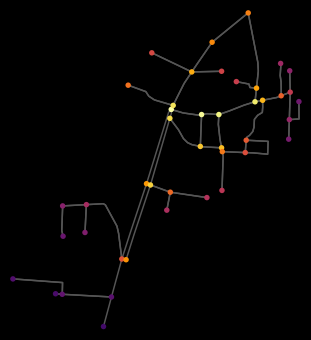

{'n': 44,
 'm': 93,
 'k_avg': 4.2272727272727275,
 'intersection_count': 30,
 'streets_per_node_avg': 2.5,
 'streets_per_node_counts': {0: 0, 1: 14, 2: 0, 3: 25, 4: 4, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3181818181818182,
  2: 0.0,
  3: 0.5681818181818182,
  4: 0.09090909090909091,
  5: 0.022727272727272728},
 'edge_length_total': 8252.019,
 'edge_length_avg': 88.7313870967742,
 'street_length_total': 4662.5560000000005,
 'street_length_avg': 93.25112000000001,
 'street_segments_count': 50,
 'node_density_km': 130.75477845484141,
 'intersection_density_km': 89.15098531011914,
 'edge_density_km': 24522.52082159414,
 'street_density_km': 13855.715382120265,
 'circuity_avg': 1.0622040324929014,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 22,
 'clean_intersection_density_km': 65.37738922742071}

In [46]:
wardno = pnq_census[(pnq_census['Ward']== 43)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w43 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w43

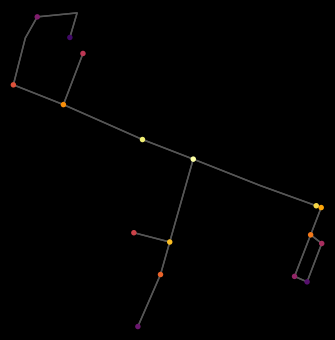

{'n': 17,
 'm': 34,
 'k_avg': 4.0,
 'intersection_count': 14,
 'streets_per_node_avg': 2.7058823529411766,
 'streets_per_node_counts': {0: 0, 1: 3, 2: 0, 3: 13, 4: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.17647058823529413,
  2: 0.0,
  3: 0.7647058823529411,
  4: 0.058823529411764705},
 'edge_length_total': 2789.9640000000004,
 'edge_length_avg': 82.05776470588236,
 'street_length_total': 1394.9819999999997,
 'street_length_avg': 82.05776470588233,
 'street_segments_count': 17,
 'node_density_km': 141.96385487589947,
 'intersection_density_km': 116.91140989779957,
 'edge_density_km': 23298.47320029318,
 'street_density_km': 11649.236600146587,
 'circuity_avg': 1.0343313880705163,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 11,
 'clean_intersection_density_km': 91.85896491969967}

In [47]:
wardno = pnq_census[(pnq_census['Ward']== 44)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w44 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w44

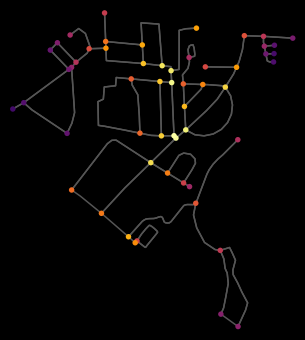

{'n': 55,
 'm': 134,
 'k_avg': 4.872727272727273,
 'intersection_count': 44,
 'streets_per_node_avg': 2.672727272727273,
 'streets_per_node_counts': {0: 0, 1: 11, 2: 0, 3: 40, 4: 4},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2,
  2: 0.0,
  3: 0.7272727272727273,
  4: 0.07272727272727272},
 'edge_length_total': 16656.25,
 'edge_length_avg': 124.30037313432835,
 'street_length_total': 8840.435000000001,
 'street_length_avg': 124.51316901408453,
 'street_segments_count': 71,
 'node_density_km': 85.69440021671359,
 'intersection_density_km': 68.55552017337087,
 'edge_density_km': 25951.77006562974,
 'street_density_km': 13774.1049996335,
 'circuity_avg': 1.2045840628300974,
 'self_loop_proportion': 0.029850746268656716,
 'clean_intersection_count': 38,
 'clean_intersection_density_km': 59.20704014972939}

In [48]:
wardno = pnq_census[(pnq_census['Ward']== 45)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w45 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w45

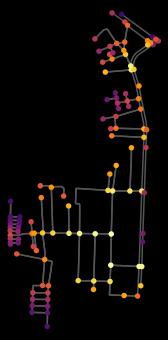

{'n': 112,
 'm': 227,
 'k_avg': 4.053571428571429,
 'intersection_count': 77,
 'streets_per_node_avg': 2.5267857142857144,
 'streets_per_node_counts': {0: 0, 1: 35, 2: 0, 3: 61, 4: 15, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3125,
  2: 0.0,
  3: 0.5446428571428571,
  4: 0.13392857142857142,
  5: 0.008928571428571428},
 'edge_length_total': 16485.452999999998,
 'edge_length_avg': 72.62314096916299,
 'street_length_total': 9691.928000000002,
 'street_length_avg': 75.13122480620156,
 'street_segments_count': 129,
 'node_density_km': 175.99804815937978,
 'intersection_density_km': 120.9986581095736,
 'edge_density_km': 25905.424562707067,
 'street_density_km': 15230.003668761085,
 'circuity_avg': 1.04164938561358,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 49,
 'clean_intersection_density_km': 76.99914606972865}

In [49]:
wardno = pnq_census[(pnq_census['Ward']== 46)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w46 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w46

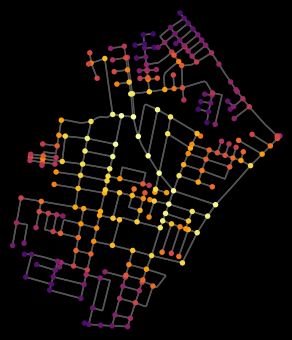

{'n': 247,
 'm': 612,
 'k_avg': 4.955465587044534,
 'intersection_count': 185,
 'streets_per_node_avg': 2.611336032388664,
 'streets_per_node_counts': {0: 0, 1: 62, 2: 0, 3: 157, 4: 28},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.25101214574898784,
  2: 0.0,
  3: 0.6356275303643725,
  4: 0.11336032388663968},
 'edge_length_total': 40118.617000000035,
 'edge_length_avg': 65.55329575163404,
 'street_length_total': 20364.88999999998,
 'street_length_avg': 65.48196141479093,
 'street_segments_count': 311,
 'node_density_km': 266.24867966088044,
 'intersection_density_km': 199.41702727636795,
 'edge_density_km': 43245.05589502252,
 'street_density_km': 21951.92337627151,
 'circuity_avg': 1.0378954265206286,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 148,
 'clean_intersection_density_km': 159.53362182109436}

In [50]:
wardno = pnq_census[(pnq_census['Ward']== 47)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w47 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w47

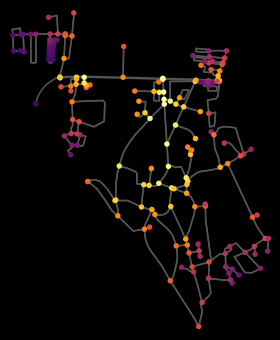

{'n': 174,
 'm': 414,
 'k_avg': 4.758620689655173,
 'intersection_count': 132,
 'streets_per_node_avg': 2.6091954022988504,
 'streets_per_node_counts': {0: 0, 1: 42, 2: 0, 3: 116, 4: 16},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2413793103448276,
  2: 0.0,
  3: 0.6666666666666666,
  4: 0.09195402298850575},
 'edge_length_total': 57384.854999999996,
 'edge_length_avg': 138.6107608695652,
 'street_length_total': 31503.221,
 'street_length_avg': 142.5485113122172,
 'street_segments_count': 221,
 'node_density_km': 49.35868536687348,
 'intersection_density_km': 37.44451993349023,
 'edge_density_km': 16278.396567635955,
 'street_density_km': 8936.537778057938,
 'circuity_avg': 1.1664269736495607,
 'self_loop_proportion': 0.01932367149758454,
 'clean_intersection_count': 107,
 'clean_intersection_density_km': 30.352754794571624}

In [51]:
wardno = pnq_census[(pnq_census['Ward']== 48)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w48 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w48

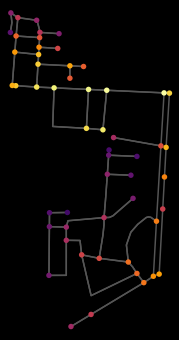

{'n': 54,
 'm': 119,
 'k_avg': 4.407407407407407,
 'intersection_count': 43,
 'streets_per_node_avg': 2.7037037037037037,
 'streets_per_node_counts': {0: 0, 1: 11, 2: 0, 3: 37, 4: 6},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2037037037037037,
  2: 0.0,
  3: 0.6851851851851852,
  4: 0.1111111111111111},
 'edge_length_total': 7562.84,
 'edge_length_avg': 63.55327731092437,
 'street_length_total': 4201.065000000001,
 'street_length_avg': 66.68357142857145,
 'street_segments_count': 63,
 'node_density_km': 303.44075124608383,
 'intersection_density_km': 241.62874636262234,
 'edge_density_km': 42497.663910258016,
 'street_density_km': 23606.931845067218,
 'circuity_avg': 1.062937189740481,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 31,
 'clean_intersection_density_km': 174.19746830793702}

In [52]:
wardno = pnq_census[(pnq_census['Ward']== 49)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w49 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w49

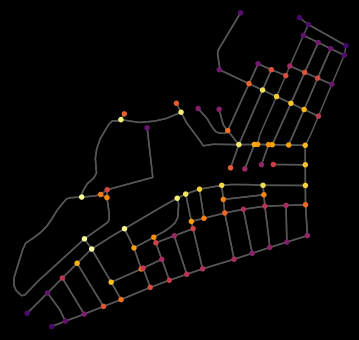

{'n': 91,
 'm': 246,
 'k_avg': 5.406593406593407,
 'intersection_count': 79,
 'streets_per_node_avg': 2.934065934065934,
 'streets_per_node_counts': {0: 0, 1: 12, 2: 0, 3: 62, 4: 16, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.13186813186813187,
  2: 0.0,
  3: 0.6813186813186813,
  4: 0.17582417582417584,
  5: 0.01098901098901099},
 'edge_length_total': 20972.50999999999,
 'edge_length_avg': 85.25410569105688,
 'street_length_total': 10867.551999999996,
 'street_length_avg': 84.90274999999997,
 'street_segments_count': 128,
 'node_density_km': 178.10250976590993,
 'intersection_density_km': 154.6164645220537,
 'edge_density_km': 41046.77656143563,
 'street_density_km': 21269.651496830036,
 'circuity_avg': 1.0775780118037077,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 69,
 'clean_intersection_density_km': 135.04476015217347}

In [53]:
wardno = pnq_census[(pnq_census['Ward']== 50)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w50 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w50

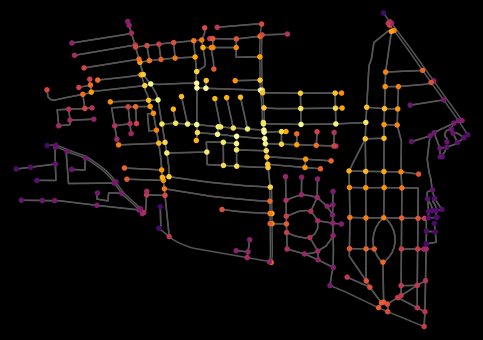

{'n': 300,
 'm': 734,
 'k_avg': 4.8933333333333335,
 'intersection_count': 236,
 'streets_per_node_avg': 2.7333333333333334,
 'streets_per_node_counts': {0: 0, 1: 64, 2: 0, 3: 190, 4: 44, 5: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.21333333333333335,
  2: 0.0,
  3: 0.6333333333333333,
  4: 0.14666666666666667,
  5: 0.006666666666666667},
 'edge_length_total': 66486.742,
 'edge_length_avg': 90.5813923705722,
 'street_length_total': 35797.542000000016,
 'street_length_avg': 91.78856923076927,
 'street_segments_count': 390,
 'node_density_km': 132.68392728421802,
 'intersection_density_km': 104.37802279691816,
 'edge_density_km': 29405.740136308545,
 'street_density_km': 15832.52819893914,
 'circuity_avg': 1.0284682639266984,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 190,
 'clean_intersection_density_km': 84.0331539466714}

In [54]:
wardno = pnq_census[(pnq_census['Ward']== 51)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w51 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w51

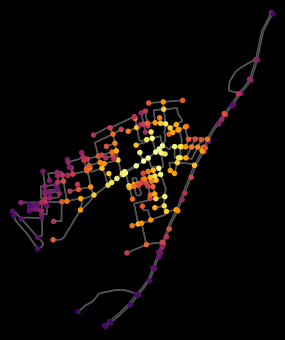

{'n': 225,
 'm': 490,
 'k_avg': 4.355555555555555,
 'intersection_count': 160,
 'streets_per_node_avg': 2.568888888888889,
 'streets_per_node_counts': {0: 0, 1: 65, 2: 0, 3: 128, 4: 31, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.28888888888888886,
  2: 0.0,
  3: 0.5688888888888889,
  4: 0.13777777777777778,
  5: 0.0044444444444444444},
 'edge_length_total': 40233.25,
 'edge_length_avg': 82.10867346938775,
 'street_length_total': 23100.241000000013,
 'street_length_avg': 85.24074169741702,
 'street_segments_count': 271,
 'node_density_km': 118.32652740074174,
 'intersection_density_km': 84.14330837386079,
 'edge_density_km': 21158.49226020397,
 'street_density_km': 12148.316887334397,
 'circuity_avg': 1.0868673084712714,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 118,
 'clean_intersection_density_km': 62.055689925722334}

In [55]:
wardno = pnq_census[(pnq_census['Ward']== 52)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w52 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w52

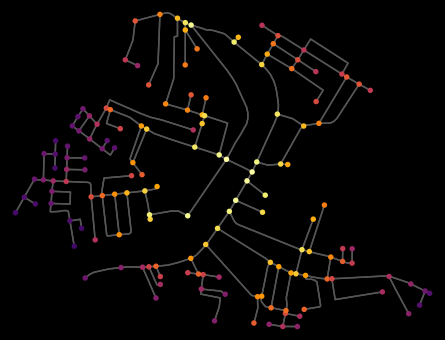

{'n': 152,
 'm': 342,
 'k_avg': 4.5,
 'intersection_count': 100,
 'streets_per_node_avg': 2.3684210526315788,
 'streets_per_node_counts': {0: 0, 1: 52, 2: 0, 3: 92, 4: 8},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.34210526315789475,
  2: 0.0,
  3: 0.6052631578947368,
  4: 0.05263157894736842},
 'edge_length_total': 31696.348000000024,
 'edge_length_avg': 92.67938011695914,
 'street_length_total': 15848.174000000006,
 'street_length_avg': 92.6793801169591,
 'street_segments_count': 171,
 'node_density_km': 126.61259113127204,
 'intersection_density_km': 83.29775732320529,
 'edge_density_km': 26402.347037358653,
 'street_density_km': 13201.173518679321,
 'circuity_avg': 1.067337635024995,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 86,
 'clean_intersection_density_km': 71.63607129795655}

In [56]:
wardno = pnq_census[(pnq_census['Ward']== 53)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w53 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w53

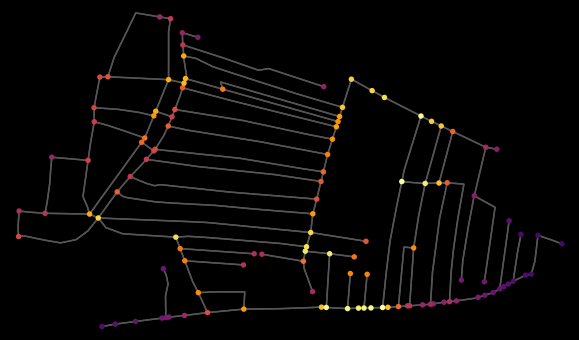

{'n': 119,
 'm': 294,
 'k_avg': 4.9411764705882355,
 'intersection_count': 103,
 'streets_per_node_avg': 2.8151260504201683,
 'streets_per_node_counts': {0: 0, 1: 16, 2: 0, 3: 94, 4: 8, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.13445378151260504,
  2: 0.0,
  3: 0.7899159663865546,
  4: 0.06722689075630252,
  5: 0.008403361344537815},
 'edge_length_total': 25582.49,
 'edge_length_avg': 87.01527210884355,
 'street_length_total': 12791.245000000004,
 'street_length_avg': 87.01527210884356,
 'street_segments_count': 147,
 'node_density_km': 243.02145169039701,
 'intersection_density_km': 210.34629852194027,
 'edge_density_km': 52244.48619878206,
 'street_density_km': 26122.24309939104,
 'circuity_avg': 1.0176249211139643,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 47,
 'clean_intersection_density_km': 95.98326243234168}

In [57]:
wardno = pnq_census[(pnq_census['Ward']== 54)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w54 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w54

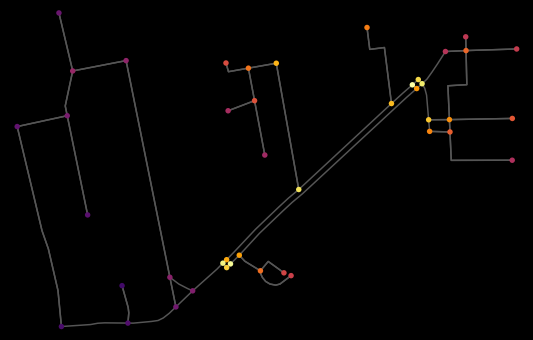

{'n': 43,
 'm': 77,
 'k_avg': 3.5813953488372094,
 'intersection_count': 30,
 'streets_per_node_avg': 2.558139534883721,
 'streets_per_node_counts': {0: 0, 1: 13, 2: 0, 3: 23, 4: 7},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3023255813953488,
  2: 0.0,
  3: 0.5348837209302325,
  4: 0.16279069767441862},
 'edge_length_total': 7465.688,
 'edge_length_avg': 96.95698701298701,
 'street_length_total': 4492.544,
 'street_length_avg': 91.68457142857143,
 'street_segments_count': 49,
 'node_density_km': 120.23054494214597,
 'intersection_density_km': 83.88177554103207,
 'edge_density_km': 20874.505502512555,
 'street_density_km': 12561.418913873678,
 'circuity_avg': 1.041209638851404,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 21,
 'clean_intersection_density_km': 58.71724287872245}

In [58]:
wardno = pnq_census[(pnq_census['Ward']== 55)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w55 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w55

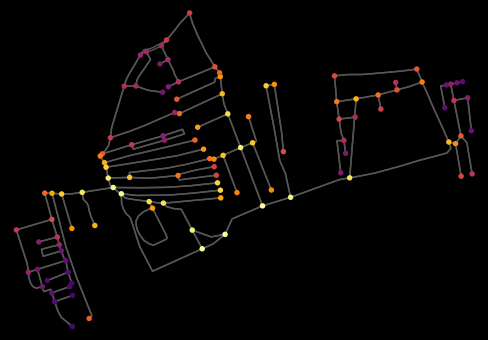

{'n': 113,
 'm': 248,
 'k_avg': 4.389380530973451,
 'intersection_count': 74,
 'streets_per_node_avg': 2.353982300884956,
 'streets_per_node_counts': {0: 0, 1: 39, 2: 0, 3: 69, 4: 5},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.34513274336283184,
  2: 0.0,
  3: 0.6106194690265486,
  4: 0.04424778761061947},
 'edge_length_total': 25855.058999999987,
 'edge_length_avg': 104.25427016129026,
 'street_length_total': 13349.638999999996,
 'street_length_avg': 105.1152677165354,
 'street_segments_count': 127,
 'node_density_km': 137.96324120197627,
 'intersection_density_km': 90.34760928271012,
 'edge_density_km': 31566.794169100227,
 'street_density_km': 16298.75633023282,
 'circuity_avg': 1.0785391995063338,
 'self_loop_proportion': 0.008064516129032258,
 'clean_intersection_count': 55,
 'clean_intersection_density_km': 67.15025014255482}

In [59]:
wardno = pnq_census[(pnq_census['Ward']== 56)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w56 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w56

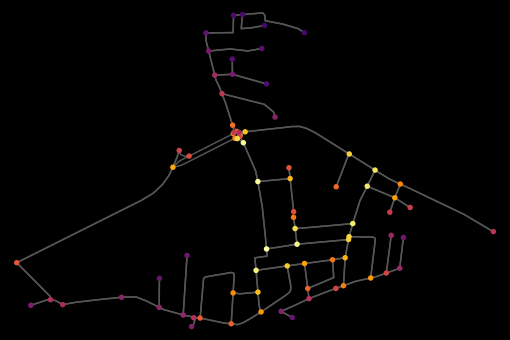

{'n': 79,
 'm': 172,
 'k_avg': 4.3544303797468356,
 'intersection_count': 63,
 'streets_per_node_avg': 2.670886075949367,
 'streets_per_node_counts': {0: 0, 1: 16, 2: 0, 3: 58, 4: 4, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.20253164556962025,
  2: 0.0,
  3: 0.7341772151898734,
  4: 0.05063291139240506,
  5: 0.012658227848101266},
 'edge_length_total': 13808.804000000002,
 'edge_length_avg': 80.28374418604652,
 'street_length_total': 7177.042000000003,
 'street_length_avg': 75.54781052631583,
 'street_segments_count': 95,
 'node_density_km': 142.6039704744899,
 'intersection_density_km': 113.72215366952992,
 'edge_density_km': 24926.459213974915,
 'street_density_km': 12955.375765343979,
 'circuity_avg': 1.056535043938716,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 45,
 'clean_intersection_density_km': 81.23010976394994}

In [60]:
wardno = pnq_census[(pnq_census['Ward']== 57)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w57 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w57

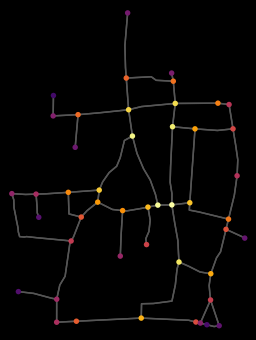

{'n': 47,
 'm': 116,
 'k_avg': 4.9361702127659575,
 'intersection_count': 41,
 'streets_per_node_avg': 2.8297872340425534,
 'streets_per_node_counts': {0: 0, 1: 6, 2: 0, 3: 37, 4: 4},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1276595744680851,
  2: 0.0,
  3: 0.7872340425531915,
  4: 0.0851063829787234},
 'edge_length_total': 6922.693999999996,
 'edge_length_avg': 59.678396551724106,
 'street_length_total': 3461.347,
 'street_length_avg': 59.67839655172414,
 'street_segments_count': 58,
 'node_density_km': 309.9485776014403,
 'intersection_density_km': 270.3806740778522,
 'edge_density_km': 45652.748052553696,
 'street_density_km': 22826.374026276866,
 'circuity_avg': 1.030842313781808,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 32,
 'clean_intersection_density_km': 211.02881879247}

In [61]:
wardno = pnq_census[(pnq_census['Ward']== 58)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w58 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w58

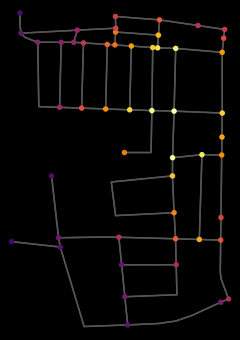

{'n': 51,
 'm': 140,
 'k_avg': 5.490196078431373,
 'intersection_count': 48,
 'streets_per_node_avg': 3.019607843137255,
 'streets_per_node_counts': {0: 0, 1: 3, 2: 0, 3: 41, 4: 7},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.058823529411764705,
  2: 0.0,
  3: 0.803921568627451,
  4: 0.13725490196078433},
 'edge_length_total': 9736.390000000001,
 'edge_length_avg': 69.54564285714287,
 'street_length_total': 4868.194999999999,
 'street_length_avg': 69.54564285714284,
 'street_segments_count': 70,
 'node_density_km': 266.3718072759361,
 'intersection_density_km': 250.70287743617513,
 'edge_density_km': 50852.937267516696,
 'street_density_km': 25426.46863375834,
 'circuity_avg': 1.0822997923098148,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 33,
 'clean_intersection_density_km': 172.3582282373704}

In [62]:
wardno = pnq_census[(pnq_census['Ward']== 59)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w59 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w59

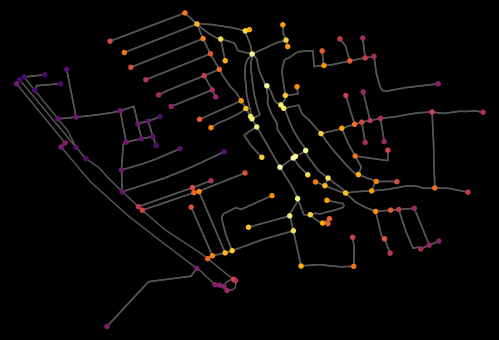

{'n': 139,
 'm': 290,
 'k_avg': 4.172661870503597,
 'intersection_count': 92,
 'streets_per_node_avg': 2.3741007194244603,
 'streets_per_node_counts': {0: 0, 1: 47, 2: 1, 3: 86, 4: 3, 5: 1, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3381294964028777,
  2: 0.007194244604316547,
  3: 0.6187050359712231,
  4: 0.02158273381294964,
  5: 0.007194244604316547,
  6: 0.007194244604316547},
 'edge_length_total': 27926.312000000005,
 'edge_length_avg': 96.29762758620691,
 'street_length_total': 15041.388000000003,
 'street_length_avg': 97.67135064935067,
 'street_segments_count': 154,
 'node_density_km': 148.6559429715261,
 'intersection_density_km': 98.39098383726906,
 'edge_density_km': 29866.27513724493,
 'street_density_km': 16086.271343457534,
 'circuity_avg': 1.0502654742925703,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 69,
 'clean_intersection_density_km': 73.7932378779518}

In [63]:
wardno = pnq_census[(pnq_census['Ward']== 60)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w60 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w60

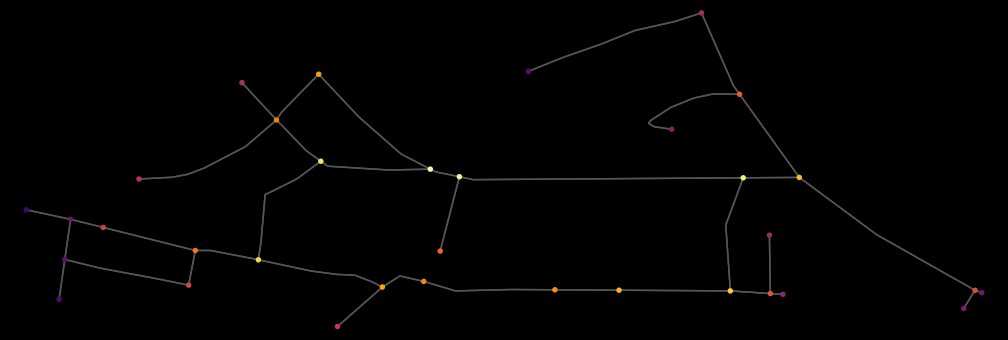

{'n': 34,
 'm': 72,
 'k_avg': 4.235294117647059,
 'intersection_count': 28,
 'streets_per_node_avg': 2.7058823529411766,
 'streets_per_node_counts': {0: 0, 1: 6, 2: 0, 3: 26, 4: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.17647058823529413,
  2: 0.0,
  3: 0.7647058823529411,
  4: 0.058823529411764705},
 'edge_length_total': 5008.27,
 'edge_length_avg': 69.55930555555557,
 'street_length_total': 2504.135,
 'street_length_avg': 69.55930555555557,
 'street_segments_count': 36,
 'node_density_km': 265.4220266784983,
 'intersection_density_km': 218.58284549993976,
 'edge_density_km': 39097.210986856546,
 'street_density_km': 19548.605493428273,
 'circuity_avg': 1.025855252042874,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 22,
 'clean_intersection_density_km': 171.74366432138123}

In [64]:
wardno = pnq_census[(pnq_census['Ward']== 61)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w61 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w61

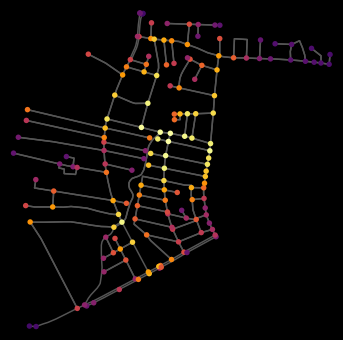

{'n': 161,
 'm': 368,
 'k_avg': 4.571428571428571,
 'intersection_count': 123,
 'streets_per_node_avg': 2.7142857142857144,
 'streets_per_node_counts': {0: 0, 1: 38, 2: 0, 3: 94, 4: 28, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2360248447204969,
  2: 0.0,
  3: 0.5838509316770186,
  4: 0.17391304347826086,
  5: 0.006211180124223602},
 'edge_length_total': 37331.350000000035,
 'edge_length_avg': 101.4438858695653,
 'street_length_total': 20188.218999999994,
 'street_length_avg': 100.94109499999996,
 'street_segments_count': 200,
 'node_density_km': 106.30163105325475,
 'intersection_density_km': 81.21180509037475,
 'edge_density_km': 24648.344064720037,
 'street_density_km': 13329.44476869756,
 'circuity_avg': 1.0301316950692911,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 104,
 'clean_intersection_density_km': 68.66689210893475}

In [65]:
wardno = pnq_census[(pnq_census['Ward']== 62)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w62 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w62

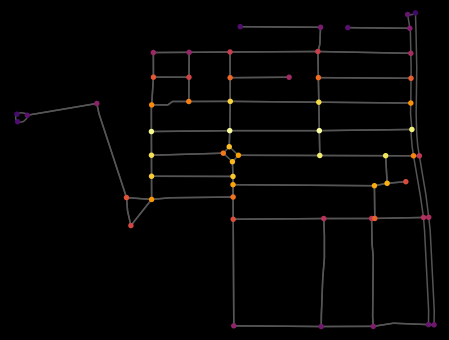

{'n': 60,
 'm': 151,
 'k_avg': 5.033333333333333,
 'intersection_count': 56,
 'streets_per_node_avg': 3.1166666666666667,
 'streets_per_node_counts': {0: 0, 1: 4, 2: 0, 3: 41, 4: 15},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.06666666666666667,
  2: 0.0,
  3: 0.6833333333333333,
  4: 0.25},
 'edge_length_total': 10109.586000000001,
 'edge_length_avg': 66.95090066225167,
 'street_length_total': 5557.773999999999,
 'street_length_avg': 65.38557647058823,
 'street_segments_count': 85,
 'node_density_km': 323.5046631255751,
 'intersection_density_km': 301.9376855838701,
 'edge_density_km': 54508.30355448385,
 'street_density_km': 29966.096759968,
 'circuity_avg': 1.002154294072062,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 39,
 'clean_intersection_density_km': 210.27803103162384}

In [66]:
wardno = pnq_census[(pnq_census['Ward']== 63)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w63 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w63

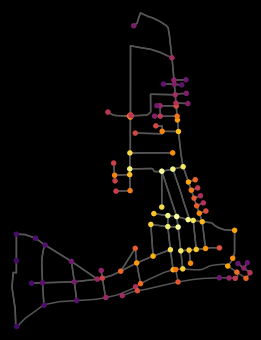

{'n': 105,
 'm': 230,
 'k_avg': 4.380952380952381,
 'intersection_count': 77,
 'streets_per_node_avg': 2.6095238095238096,
 'streets_per_node_counts': {0: 0, 1: 28, 2: 0, 3: 62, 4: 15},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.26666666666666666,
  2: 0.0,
  3: 0.5904761904761905,
  4: 0.14285714285714285},
 'edge_length_total': 19793.840000000007,
 'edge_length_avg': 86.06017391304351,
 'street_length_total': 10798.94800000001,
 'street_length_avg': 85.70593650793658,
 'street_segments_count': 126,
 'node_density_km': 119.2532824765102,
 'intersection_density_km': 87.4524071494408,
 'edge_density_km': 22480.76564585569,
 'street_density_km': 12264.857107553771,
 'circuity_avg': 1.0504222054709256,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 63,
 'clean_intersection_density_km': 71.55196948590611}

In [67]:
wardno = pnq_census[(pnq_census['Ward']== 64)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w64 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w64

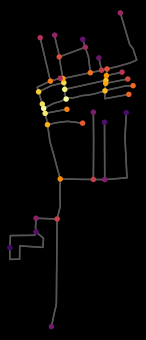

{'n': 42,
 'm': 92,
 'k_avg': 4.380952380952381,
 'intersection_count': 27,
 'streets_per_node_avg': 2.3095238095238093,
 'streets_per_node_counts': {0: 0, 1: 15, 2: 0, 3: 26, 4: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.35714285714285715,
  2: 0.0,
  3: 0.6190476190476191,
  4: 0.023809523809523808},
 'edge_length_total': 8332.731999999998,
 'edge_length_avg': 90.57317391304346,
 'street_length_total': 4166.366,
 'street_length_avg': 90.57317391304348,
 'street_segments_count': 46,
 'node_density_km': 184.32864733279237,
 'intersection_density_km': 118.49698757108081,
 'edge_density_km': 36570.50519396841,
 'street_density_km': 18285.25259698421,
 'circuity_avg': 1.0957371351732554,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 18,
 'clean_intersection_density_km': 78.99799171405388}

In [68]:
wardno = pnq_census[(pnq_census['Ward']== 65)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w65 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w65

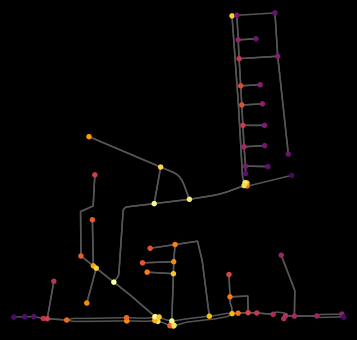

{'n': 74,
 'm': 136,
 'k_avg': 3.675675675675676,
 'intersection_count': 57,
 'streets_per_node_avg': 2.5945945945945947,
 'streets_per_node_counts': {0: 0, 1: 17, 2: 0, 3: 54, 4: 2, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.22972972972972974,
  2: 0.0,
  3: 0.7297297297297297,
  4: 0.02702702702702703,
  5: 0.013513513513513514},
 'edge_length_total': 11125.487,
 'edge_length_avg': 81.80505147058823,
 'street_length_total': 6316.325999999998,
 'street_length_avg': 75.19435714285711,
 'street_segments_count': 84,
 'node_density_km': 155.16353852073118,
 'intersection_density_km': 119.51786075245509,
 'edge_density_km': 23327.97203630262,
 'street_density_km': 13244.101251493184,
 'circuity_avg': 1.0343340518769712,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 34,
 'clean_intersection_density_km': 71.29135553655216}

In [69]:
wardno = pnq_census[(pnq_census['Ward']== 66)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w66 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w66

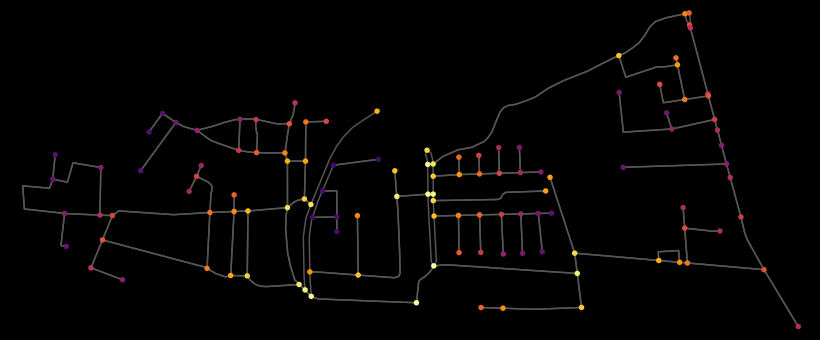

{'n': 120,
 'm': 259,
 'k_avg': 4.316666666666666,
 'intersection_count': 86,
 'streets_per_node_avg': 2.55,
 'streets_per_node_counts': {0: 0, 1: 34, 2: 0, 3: 72, 4: 14},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2833333333333333,
  2: 0.0,
  3: 0.6,
  4: 0.11666666666666667},
 'edge_length_total': 21435.367,
 'edge_length_avg': 82.76203474903474,
 'street_length_total': 11354.695999999998,
 'street_length_avg': 82.28040579710144,
 'street_segments_count': 138,
 'node_density_km': 169.75344968214557,
 'intersection_density_km': 121.656638938871,
 'edge_density_km': 30322.729112106863,
 'street_density_km': 16062.490134100493,
 'circuity_avg': 1.0510457935994844,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 68,
 'clean_intersection_density_km': 96.19362148654916}

In [70]:
wardno = pnq_census[(pnq_census['Ward']== 67)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w67 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w67

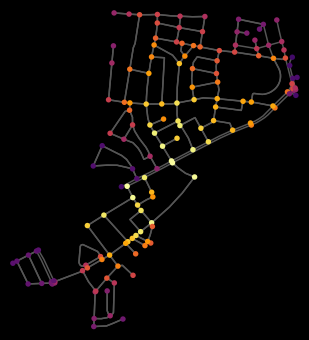

{'n': 147,
 'm': 346,
 'k_avg': 4.707482993197279,
 'intersection_count': 132,
 'streets_per_node_avg': 2.9183673469387754,
 'streets_per_node_counts': {0: 0, 1: 15, 2: 0, 3: 114, 4: 18},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.10204081632653061,
  2: 0.0,
  3: 0.7755102040816326,
  4: 0.12244897959183673},
 'edge_length_total': 27387.219999999998,
 'edge_length_avg': 79.15381502890173,
 'street_length_total': 15208.431000000008,
 'street_length_avg': 77.99195384615389,
 'street_segments_count': 195,
 'node_density_km': 146.2780766904248,
 'intersection_density_km': 131.351742334259,
 'edge_density_km': 27252.720187058065,
 'street_density_km': 15133.74174257847,
 'circuity_avg': 1.0398291761511618,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 99,
 'clean_intersection_density_km': 98.51380675069424}

In [71]:
wardno = pnq_census[(pnq_census['Ward']== 68)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w68 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w68

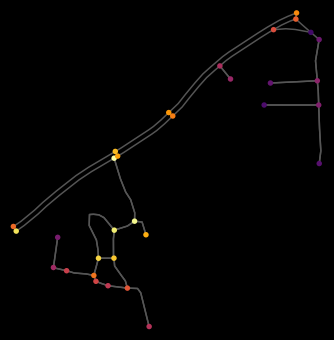

{'n': 32,
 'm': 62,
 'k_avg': 3.875,
 'intersection_count': 26,
 'streets_per_node_avg': 2.84375,
 'streets_per_node_counts': {0: 0, 1: 6, 2: 0, 3: 20, 4: 5, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1875,
  2: 0.0,
  3: 0.625,
  4: 0.15625,
  5: 0.03125},
 'edge_length_total': 4394.468999999999,
 'edge_length_avg': 70.8785322580645,
 'street_length_total': 2977.042,
 'street_length_avg': 80.4605945945946,
 'street_segments_count': 37,
 'node_density_km': 173.442660943466,
 'intersection_density_km': 140.92216201656612,
 'edge_density_km': 23818.38739979912,
 'street_density_km': 16135.815194389308,
 'circuity_avg': 1.0582416590325068,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 17,
 'clean_intersection_density_km': 92.1414136262163}

In [72]:
wardno = pnq_census[(pnq_census['Ward']== 69)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w69 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w69

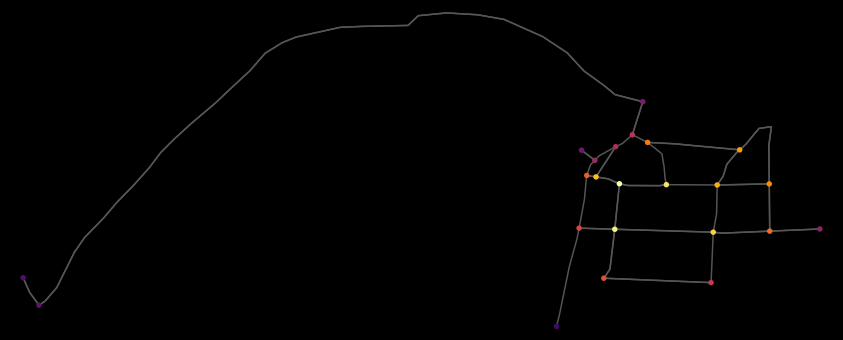

{'n': 23,
 'm': 50,
 'k_avg': 4.3478260869565215,
 'intersection_count': 21,
 'streets_per_node_avg': 2.9565217391304346,
 'streets_per_node_counts': {0: 0, 1: 2, 2: 0, 3: 18, 4: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.08695652173913043,
  2: 0.0,
  3: 0.782608695652174,
  4: 0.13043478260869565},
 'edge_length_total': 4621.715000000001,
 'edge_length_avg': 92.43430000000002,
 'street_length_total': 2567.5400000000004,
 'street_length_avg': 85.58466666666668,
 'street_segments_count': 30,
 'node_density_km': 167.47842585859033,
 'intersection_density_km': 152.91508447958248,
 'edge_density_km': 33653.806650740655,
 'street_density_km': 18695.98076212892,
 'circuity_avg': 1.099185755181221,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 15,
 'clean_intersection_density_km': 109.22506034255892}

In [73]:
wardno = pnq_census[(pnq_census['Ward']== 70)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w70 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w70

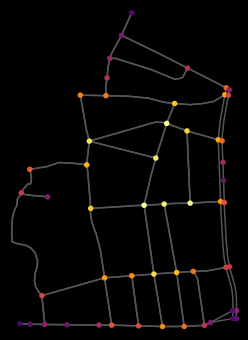

{'n': 53,
 'm': 136,
 'k_avg': 5.132075471698113,
 'intersection_count': 52,
 'streets_per_node_avg': 3.3773584905660377,
 'streets_per_node_counts': {0: 0, 1: 1, 2: 0, 3: 30, 4: 22},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.018867924528301886,
  2: 0.0,
  3: 0.5660377358490566,
  4: 0.41509433962264153},
 'edge_length_total': 10750.313999999998,
 'edge_length_avg': 79.04642647058823,
 'street_length_total': 5941.720000000002,
 'street_length_avg': 77.16519480519483,
 'street_segments_count': 77,
 'node_density_km': 211.09147261543737,
 'intersection_density_km': 207.1086146415612,
 'edge_density_km': 42816.97383657269,
 'street_density_km': 23665.026880539564,
 'circuity_avg': 1.016599661600829,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 40,
 'clean_intersection_density_km': 159.31431895504707}

In [74]:
wardno = pnq_census[(pnq_census['Ward']== 71)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w71 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w71

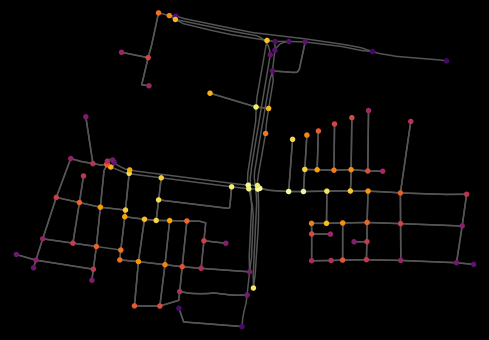

{'n': 110,
 'm': 246,
 'k_avg': 4.472727272727273,
 'intersection_count': 89,
 'streets_per_node_avg': 2.8454545454545452,
 'streets_per_node_counts': {0: 0, 1: 21, 2: 0, 3: 64, 4: 25},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.19090909090909092,
  2: 0.0,
  3: 0.5818181818181818,
  4: 0.22727272727272727},
 'edge_length_total': 23289.143999999997,
 'edge_length_avg': 94.67131707317071,
 'street_length_total': 14432.369999999999,
 'street_length_avg': 99.53358620689654,
 'street_segments_count': 145,
 'node_density_km': 130.00955701816093,
 'intersection_density_km': 105.1895506783302,
 'edge_density_km': 27525.557225201454,
 'street_density_km': 17057.69118565632,
 'circuity_avg': 1.0189918466730141,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 71,
 'clean_intersection_density_km': 83.91525952990386}

In [75]:
wardno = pnq_census[(pnq_census['Ward']== 72)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w72 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w72

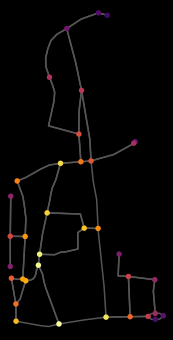

{'n': 36,
 'm': 82,
 'k_avg': 4.555555555555555,
 'intersection_count': 33,
 'streets_per_node_avg': 3.0,
 'streets_per_node_counts': {0: 0, 1: 3, 2: 0, 3: 27, 4: 6},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.08333333333333333,
  2: 0.0,
  3: 0.75,
  4: 0.16666666666666666},
 'edge_length_total': 6246.640999999999,
 'edge_length_avg': 76.17854878048779,
 'street_length_total': 3435.258999999999,
 'street_length_avg': 76.33908888888887,
 'street_segments_count': 45,
 'node_density_km': 223.00344285533075,
 'intersection_density_km': 204.4198226173865,
 'edge_density_km': 38695.06803559072,
 'street_density_km': 21279.849558326678,
 'circuity_avg': 1.0458815017886505,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 24,
 'clean_intersection_density_km': 148.66896190355382}

In [76]:
wardno = pnq_census[(pnq_census['Ward']== 73)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w73 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w73

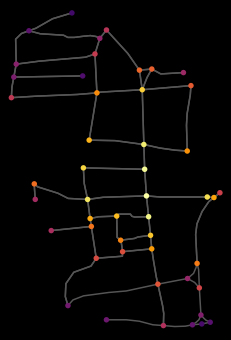

{'n': 48,
 'm': 114,
 'k_avg': 4.75,
 'intersection_count': 43,
 'streets_per_node_avg': 3.0208333333333335,
 'streets_per_node_counts': {0: 0, 1: 5, 2: 0, 3: 34, 4: 7, 5: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.10416666666666667,
  2: 0.0,
  3: 0.7083333333333334,
  4: 0.14583333333333334,
  5: 0.041666666666666664},
 'edge_length_total': 7639.291000000001,
 'edge_length_avg': 67.01132456140351,
 'street_length_total': 4133.1320000000005,
 'street_length_avg': 65.60526984126984,
 'street_segments_count': 63,
 'node_density_km': 291.35384008300804,
 'intersection_density_km': 261.00448174102803,
 'edge_density_km': 46369.51600753256,
 'street_density_km': 25087.580828540904,
 'circuity_avg': 1.0168989676822617,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 31,
 'clean_intersection_density_km': 188.16602172027604}

In [77]:
wardno = pnq_census[(pnq_census['Ward']== 74)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w74 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w74

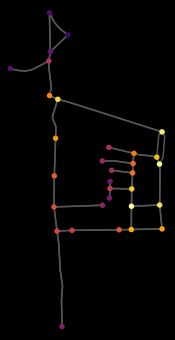

{'n': 32,
 'm': 69,
 'k_avg': 4.3125,
 'intersection_count': 25,
 'streets_per_node_avg': 2.65625,
 'streets_per_node_counts': {0: 0, 1: 7, 2: 0, 3: 23, 4: 1, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.21875,
  2: 0.0,
  3: 0.71875,
  4: 0.03125,
  5: 0.03125},
 'edge_length_total': 4570.942,
 'edge_length_avg': 66.24553623188406,
 'street_length_total': 2361.6690000000003,
 'street_length_avg': 65.60191666666668,
 'street_segments_count': 36,
 'node_density_km': 227.3639441215507,
 'intersection_density_km': 177.6280813449615,
 'edge_density_km': 32477.106295964037,
 'street_density_km': 16779.949329674957,
 'circuity_avg': 1.0076511747731043,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 19,
 'clean_intersection_density_km': 134.9973418221707}

In [78]:
wardno = pnq_census[(pnq_census['Ward']== 75)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w75 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w75

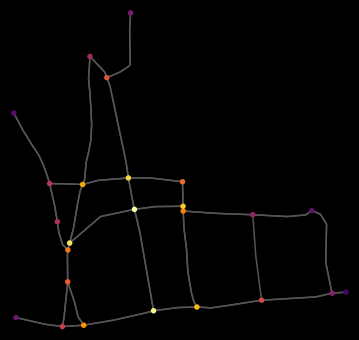

{'n': 25,
 'm': 65,
 'k_avg': 5.2,
 'intersection_count': 25,
 'streets_per_node_avg': 3.44,
 'streets_per_node_counts': {0: 0, 1: 0, 2: 0, 3: 14, 4: 11},
 'streets_per_node_proportion': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.56, 4: 0.44},
 'edge_length_total': 5505.826,
 'edge_length_avg': 84.70501538461538,
 'street_length_total': 2818.783999999999,
 'street_length_avg': 85.41769696969695,
 'street_segments_count': 33,
 'node_density_km': 159.15175965939596,
 'intersection_density_km': 159.15175965939596,
 'edge_density_km': 35050.47585113814,
 'street_density_km': 17944.577347990027,
 'circuity_avg': 1.015823226335815,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 22,
 'clean_intersection_density_km': 140.05354850026845}

In [79]:
wardno = pnq_census[(pnq_census['Ward']== 76)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w76 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w76

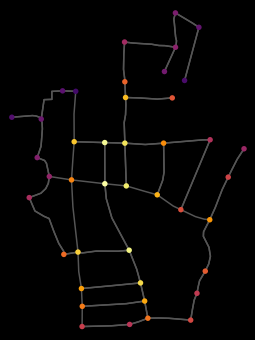

{'n': 42,
 'm': 92,
 'k_avg': 4.380952380952381,
 'intersection_count': 39,
 'streets_per_node_avg': 3.0714285714285716,
 'streets_per_node_counts': {0: 0, 1: 3, 2: 0, 3: 30, 4: 9},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.07142857142857142,
  2: 0.0,
  3: 0.7142857142857143,
  4: 0.21428571428571427},
 'edge_length_total': 6934.625000000004,
 'edge_length_avg': 75.37635869565221,
 'street_length_total': 3862.206,
 'street_length_avg': 74.27319230769231,
 'street_segments_count': 52,
 'node_density_km': 223.77603405681504,
 'intersection_density_km': 207.7920316241854,
 'edge_density_km': 36947.68762312481,
 'street_density_km': 20577.836699772273,
 'circuity_avg': 1.0183626452277537,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 37,
 'clean_intersection_density_km': 197.1360300024323}

In [80]:
wardno = pnq_census[(pnq_census['Ward']== 77)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w77 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w77

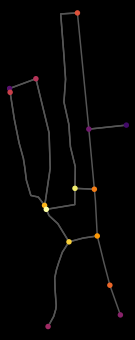

{'n': 15,
 'm': 29,
 'k_avg': 3.8666666666666667,
 'intersection_count': 14,
 'streets_per_node_avg': 3.0,
 'streets_per_node_counts': {0: 0, 1: 1, 2: 0, 3: 12, 4: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.06666666666666667,
  2: 0.0,
  3: 0.8,
  4: 0.13333333333333333},
 'edge_length_total': 3003.207,
 'edge_length_avg': 103.55886206896551,
 'street_length_total': 1758.5720000000001,
 'street_length_avg': 103.4454117647059,
 'street_segments_count': 17,
 'node_density_km': 208.17245332295144,
 'intersection_density_km': 194.294289768088,
 'edge_density_km': 41678.99793511073,
 'street_density_km': 24405.749839003292,
 'circuity_avg': 1.0463353147373122,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 12,
 'clean_intersection_density_km': 166.53796265836115}

In [81]:
wardno = pnq_census[(pnq_census['Ward']== 78)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w78 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w78

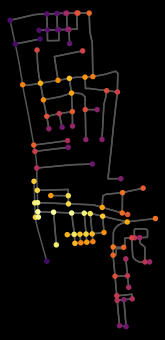

{'n': 98,
 'm': 225,
 'k_avg': 4.591836734693878,
 'intersection_count': 75,
 'streets_per_node_avg': 2.7142857142857144,
 'streets_per_node_counts': {0: 0, 1: 23, 2: 0, 3: 58, 4: 16, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.23469387755102042,
  2: 0.0,
  3: 0.5918367346938775,
  4: 0.16326530612244897,
  5: 0.01020408163265306},
 'edge_length_total': 15629.058999999994,
 'edge_length_avg': 69.46248444444441,
 'street_length_total': 8340.993000000002,
 'street_length_avg': 70.09237815126052,
 'street_segments_count': 119,
 'node_density_km': 253.15906209906353,
 'intersection_density_km': 193.74418017785473,
 'edge_density_km': 40373.85630541761,
 'street_density_km': 21546.91800872301,
 'circuity_avg': 1.0793193079775427,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 51,
 'clean_intersection_density_km': 131.74604252094122}

In [82]:
wardno = pnq_census[(pnq_census['Ward']== 79)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w79 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w79

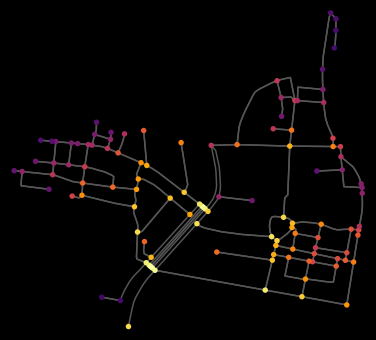

{'n': 112,
 'm': 282,
 'k_avg': 5.035714285714286,
 'intersection_count': 98,
 'streets_per_node_avg': 2.9017857142857144,
 'streets_per_node_counts': {0: 0, 1: 14, 2: 0, 3: 81, 4: 17},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.125,
  2: 0.0,
  3: 0.7232142857142857,
  4: 0.15178571428571427},
 'edge_length_total': 19035.99100000001,
 'edge_length_avg': 67.50351418439719,
 'street_length_total': 10333.252999999999,
 'street_length_avg': 70.29423809523809,
 'street_segments_count': 147,
 'node_density_km': 186.68331405615422,
 'intersection_density_km': 163.34789979913495,
 'edge_density_km': 31729.481126992207,
 'street_density_km': 17223.624241256228,
 'circuity_avg': 1.0368072640105066,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 59,
 'clean_intersection_density_km': 98.34210294029553}

In [83]:
wardno = pnq_census[(pnq_census['Ward']== 80)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w80 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w80

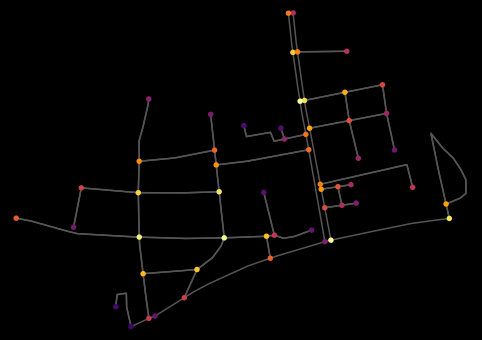

{'n': 55,
 'm': 115,
 'k_avg': 4.181818181818182,
 'intersection_count': 42,
 'streets_per_node_avg': 2.709090909090909,
 'streets_per_node_counts': {0: 0, 1: 13, 2: 0, 3: 32, 4: 10},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.23636363636363636,
  2: 0.0,
  3: 0.5818181818181818,
  4: 0.18181818181818182},
 'edge_length_total': 8462.305000000002,
 'edge_length_avg': 73.58526086956523,
 'street_length_total': 5206.865000000002,
 'street_length_avg': 76.57154411764708,
 'street_segments_count': 68,
 'node_density_km': 248.96506643838492,
 'intersection_density_km': 190.11877800749394,
 'edge_density_km': 38305.787755397774,
 'street_density_km': 23569.590739285482,
 'circuity_avg': 1.1065409282372836,
 'self_loop_proportion': 0.017391304347826087,
 'clean_intersection_count': 29,
 'clean_intersection_density_km': 131.27248957660296}

In [84]:
wardno = pnq_census[(pnq_census['Ward']== 81)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w81 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w81

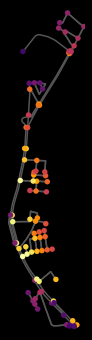

{'n': 87,
 'm': 162,
 'k_avg': 3.7241379310344827,
 'intersection_count': 67,
 'streets_per_node_avg': 2.6091954022988504,
 'streets_per_node_counts': {0: 0, 1: 20, 2: 0, 3: 61, 4: 6},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.22988505747126436,
  2: 0.0,
  3: 0.7011494252873564,
  4: 0.06896551724137931},
 'edge_length_total': 15930.162999999999,
 'edge_length_avg': 98.33433950617282,
 'street_length_total': 11258.28,
 'street_length_avg': 107.2217142857143,
 'street_segments_count': 105,
 'node_density_km': 82.62610074333807,
 'intersection_density_km': 63.63159482532932,
 'edge_density_km': 15129.278768917202,
 'street_density_km': 10692.27330432998,
 'circuity_avg': 1.076793191978688,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 43,
 'clean_intersection_density_km': 40.83818772371882}

In [85]:
wardno = pnq_census[(pnq_census['Ward']== 82)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w82 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w82

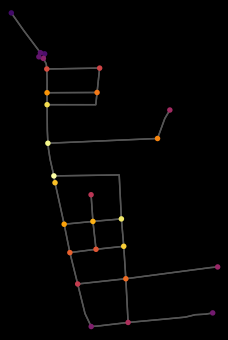

{'n': 28,
 'm': 66,
 'k_avg': 4.714285714285714,
 'intersection_count': 26,
 'streets_per_node_avg': 3.0,
 'streets_per_node_counts': {0: 0, 1: 2, 2: 0, 3: 22, 4: 4},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.07142857142857142,
  2: 0.0,
  3: 0.7857142857142857,
  4: 0.14285714285714285},
 'edge_length_total': 5974.483,
 'edge_length_avg': 90.5224696969697,
 'street_length_total': 3010.5769999999998,
 'street_length_avg': 86.01648571428571,
 'street_segments_count': 35,
 'node_density_km': 151.20019099574216,
 'intersection_density_km': 140.40017735318915,
 'edge_density_km': 32262.248953600523,
 'street_density_km': 16257.136335978159,
 'circuity_avg': 1.0334151200145025,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 20,
 'clean_intersection_density_km': 108.00013642553012}

In [86]:
wardno = pnq_census[(pnq_census['Ward']== 83)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w83 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w83

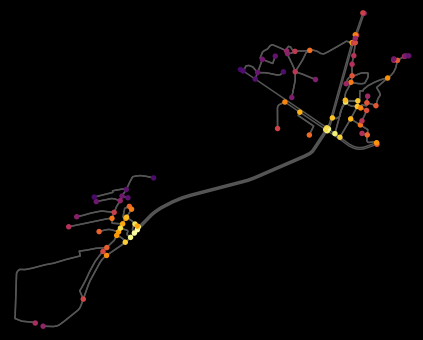

{'n': 96,
 'm': 211,
 'k_avg': 4.395833333333333,
 'intersection_count': 77,
 'streets_per_node_avg': 2.75,
 'streets_per_node_counts': {0: 0, 1: 19, 2: 0, 3: 64, 4: 12, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.19791666666666666,
  2: 0.0,
  3: 0.6666666666666666,
  4: 0.125,
  5: 0.010416666666666666},
 'edge_length_total': 30982.255999999987,
 'edge_length_avg': 146.83533649289095,
 'street_length_total': 18752.01299999999,
 'street_length_avg': 157.57994117647053,
 'street_segments_count': 119,
 'node_density_km': 47.975211658376104,
 'intersection_density_km': 38.4801176843225,
 'edge_density_km': 15483.12801306242,
 'street_density_km': 9371.16450724604,
 'circuity_avg': 1.1045201642186047,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 53,
 'clean_intersection_density_km': 26.486314769728473}

In [87]:
wardno = pnq_census[(pnq_census['Ward']== 84)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w84 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w84

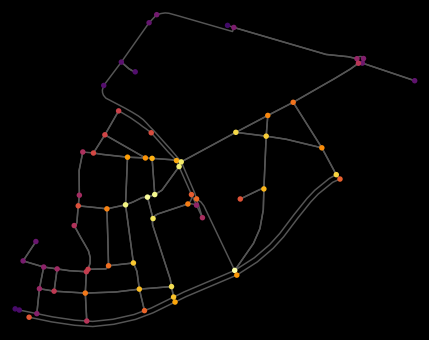

{'n': 68,
 'm': 156,
 'k_avg': 4.588235294117647,
 'intersection_count': 64,
 'streets_per_node_avg': 3.1029411764705883,
 'streets_per_node_counts': {0: 0, 1: 4, 2: 0, 3: 51, 4: 11, 5: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.058823529411764705,
  2: 0.0,
  3: 0.75,
  4: 0.16176470588235295,
  5: 0.029411764705882353},
 'edge_length_total': 13586.217000000002,
 'edge_length_avg': 87.09113461538463,
 'street_length_total': 8522.713000000003,
 'street_length_avg': 90.66715957446812,
 'street_segments_count': 94,
 'node_density_km': 146.57355246406496,
 'intersection_density_km': 137.9515787897082,
 'edge_density_km': 29285.001327024584,
 'street_density_km': 18370.651780024542,
 'circuity_avg': 1.0094674504655943,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 43,
 'clean_intersection_density_km': 92.6862169993352}

In [88]:
wardno = pnq_census[(pnq_census['Ward']== 85)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w85 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w85

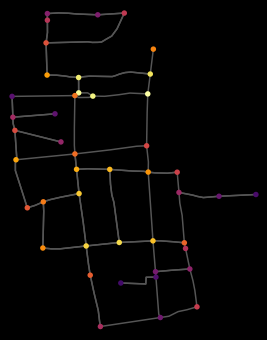

{'n': 45,
 'm': 93,
 'k_avg': 4.133333333333334,
 'intersection_count': 42,
 'streets_per_node_avg': 3.1555555555555554,
 'streets_per_node_counts': {0: 0, 1: 3, 2: 0, 3: 29, 4: 13},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.06666666666666667,
  2: 0.0,
  3: 0.6444444444444445,
  4: 0.28888888888888886},
 'edge_length_total': 6876.863999999999,
 'edge_length_avg': 73.94477419354837,
 'street_length_total': 4286.384,
 'street_length_avg': 73.9031724137931,
 'street_segments_count': 58,
 'node_density_km': 219.51294327715172,
 'intersection_density_km': 204.87874705867495,
 'edge_density_km': 33545.7923812597,
 'street_density_km': 20909.26150791313,
 'circuity_avg': 1.0128416894362875,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 36,
 'clean_intersection_density_km': 175.6103546217214}

In [89]:
wardno = pnq_census[(pnq_census['Ward']== 86)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w86 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w86

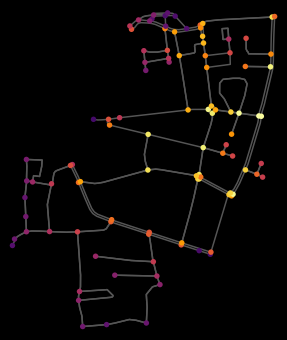

{'n': 102,
 'm': 207,
 'k_avg': 4.0588235294117645,
 'intersection_count': 91,
 'streets_per_node_avg': 3.0294117647058822,
 'streets_per_node_counts': {0: 0, 1: 11, 2: 0, 3: 68, 4: 21, 5: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.10784313725490197,
  2: 0.0,
  3: 0.6666666666666666,
  4: 0.20588235294117646,
  5: 0.0196078431372549},
 'edge_length_total': 21818.188000000002,
 'edge_length_avg': 105.40187439613527,
 'street_length_total': 14246.972000000005,
 'street_length_avg': 103.23892753623193,
 'street_segments_count': 138,
 'node_density_km': 94.14941279022165,
 'intersection_density_km': 83.99604474421736,
 'edge_density_km': 20138.9175328104,
 'street_density_km': 13150.43184155618,
 'circuity_avg': 1.1126994348130437,
 'self_loop_proportion': 0.00966183574879227,
 'clean_intersection_count': 62,
 'clean_intersection_density_km': 57.22807444111512}

In [90]:
wardno = pnq_census[(pnq_census['Ward']== 87)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w87 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w87

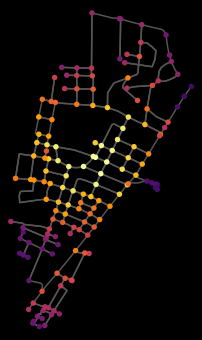

{'n': 154,
 'm': 361,
 'k_avg': 4.688311688311688,
 'intersection_count': 129,
 'streets_per_node_avg': 2.8636363636363638,
 'streets_per_node_counts': {0: 0, 1: 25, 2: 0, 3: 101, 4: 27, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.16233766233766234,
  2: 0.0,
  3: 0.6558441558441559,
  4: 0.17532467532467533,
  5: 0.006493506493506494},
 'edge_length_total': 29777.202000000038,
 'edge_length_avg': 82.4853240997231,
 'street_length_total': 16560.123999999996,
 'street_length_avg': 81.57696551724136,
 'street_segments_count': 203,
 'node_density_km': 144.61613849893624,
 'intersection_density_km': 121.13949263871932,
 'edge_density_km': 27962.753042485758,
 'street_density_km': 15551.046661971151,
 'circuity_avg': 1.056978311800064,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 110,
 'clean_intersection_density_km': 103.29724178495445}

In [91]:
wardno = pnq_census[(pnq_census['Ward']== 88)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w88 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w88

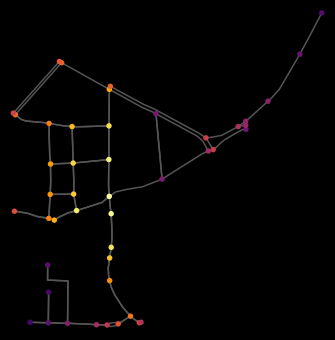

{'n': 46,
 'm': 95,
 'k_avg': 4.130434782608695,
 'intersection_count': 44,
 'streets_per_node_avg': 3.130434782608696,
 'streets_per_node_counts': {0: 0, 1: 2, 2: 2, 3: 31, 4: 10, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.043478260869565216,
  2: 0.043478260869565216,
  3: 0.6739130434782609,
  4: 0.21739130434782608,
  5: 0.021739130434782608},
 'edge_length_total': 7809.403999999999,
 'edge_length_avg': 82.20425263157894,
 'street_length_total': 5002.272999999999,
 'street_length_avg': 87.75917543859647,
 'street_segments_count': 57,
 'node_density_km': 101.57172830615825,
 'intersection_density_km': 97.1555662058905,
 'edge_density_km': 17243.796985239678,
 'street_density_km': 11045.424218896327,
 'circuity_avg': 1.0179805253860867,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 34,
 'clean_intersection_density_km': 75.07475570455175}

In [92]:
wardno = pnq_census[(pnq_census['Ward']== 89)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w89 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w89

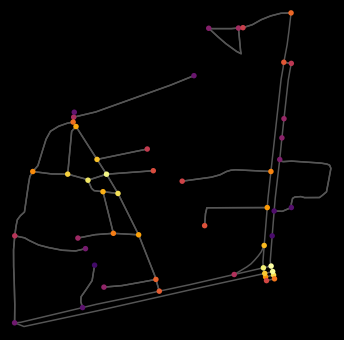

{'n': 51,
 'm': 99,
 'k_avg': 3.8823529411764706,
 'intersection_count': 42,
 'streets_per_node_avg': 2.8627450980392157,
 'streets_per_node_counts': {0: 0, 1: 9, 2: 0, 3: 32, 4: 9, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.17647058823529413,
  2: 0.0,
  3: 0.6274509803921569,
  4: 0.17647058823529413,
  5: 0.0196078431372549},
 'edge_length_total': 7000.552000000001,
 'edge_length_avg': 70.71264646464647,
 'street_length_total': 4396.4400000000005,
 'street_length_avg': 69.78476190476191,
 'street_segments_count': 63,
 'node_density_km': 298.2257470589823,
 'intersection_density_km': 245.59767404857365,
 'edge_density_km': 40936.17352990692,
 'street_density_km': 25708.462811764555,
 'circuity_avg': 1.0752964976114223,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 22,
 'clean_intersection_density_km': 128.64640069211}

In [93]:
wardno = pnq_census[(pnq_census['Ward']== 90)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w90 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w90

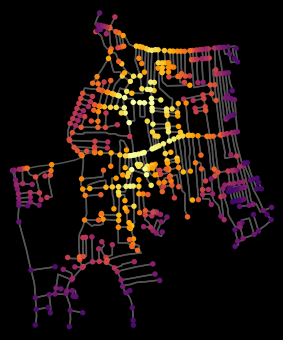

{'n': 509,
 'm': 1156,
 'k_avg': 4.542239685658153,
 'intersection_count': 340,
 'streets_per_node_avg': 2.404715127701375,
 'streets_per_node_counts': {0: 0, 1: 169, 2: 0, 3: 307, 4: 31, 5: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3320235756385069,
  2: 0.0,
  3: 0.6031434184675835,
  4: 0.060903732809430254,
  5: 0.003929273084479371},
 'edge_length_total': 101665.332,
 'edge_length_avg': 87.94578892733564,
 'street_length_total': 51379.979999999974,
 'street_length_avg': 87.8290256410256,
 'street_segments_count': 585,
 'node_density_km': 140.09020271424794,
 'intersection_density_km': 93.57695269714007,
 'edge_density_km': 27980.976363244237,
 'street_density_km': 14141.123406000002,
 'circuity_avg': 1.0561554463571803,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 225,
 'clean_intersection_density_km': 61.92592457898976}

In [94]:
wardno = pnq_census[(pnq_census['Ward']== 91)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w91 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w91

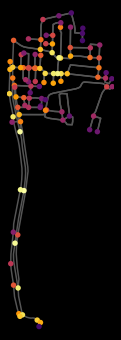

{'n': 102,
 'm': 199,
 'k_avg': 3.9019607843137254,
 'intersection_count': 74,
 'streets_per_node_avg': 2.5392156862745097,
 'streets_per_node_counts': {0: 0, 1: 28, 2: 0, 3: 66, 4: 7, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.27450980392156865,
  2: 0.0,
  3: 0.6470588235294118,
  4: 0.06862745098039216,
  5: 0.00980392156862745},
 'edge_length_total': 16631.340999999997,
 'edge_length_avg': 83.57457788944723,
 'street_length_total': 10590.62,
 'street_length_avg': 92.09234782608696,
 'street_segments_count': 115,
 'node_density_km': 164.65195592543603,
 'intersection_density_km': 119.45337978904183,
 'edge_density_km': 26846.890444244087,
 'street_density_km': 17095.748014343542,
 'circuity_avg': 1.0909593115682095,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 54,
 'clean_intersection_density_km': 87.16868254876026}

In [95]:
wardno = pnq_census[(pnq_census['Ward']== 92)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w92 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w92

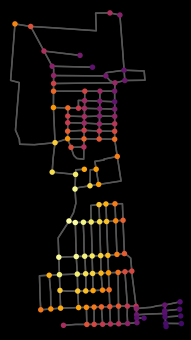

{'n': 122,
 'm': 374,
 'k_avg': 6.131147540983607,
 'intersection_count': 112,
 'streets_per_node_avg': 3.1557377049180326,
 'streets_per_node_counts': {0: 0, 1: 10, 2: 0, 3: 73, 4: 39},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.08196721311475409,
  2: 0.0,
  3: 0.5983606557377049,
  4: 0.319672131147541},
 'edge_length_total': 17150.25000000001,
 'edge_length_avg': 45.856283422459924,
 'street_length_total': 8575.125000000005,
 'street_length_avg': 45.856283422459924,
 'street_segments_count': 187,
 'node_density_km': 443.45821310538327,
 'intersection_density_km': 407.1091792442863,
 'edge_density_km': 62339.501797627905,
 'street_density_km': 31169.750898813953,
 'circuity_avg': 1.0600453697557868,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 28,
 'clean_intersection_density_km': 101.77729481107157}

In [96]:
wardno = pnq_census[(pnq_census['Ward']== 93)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w93 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w93

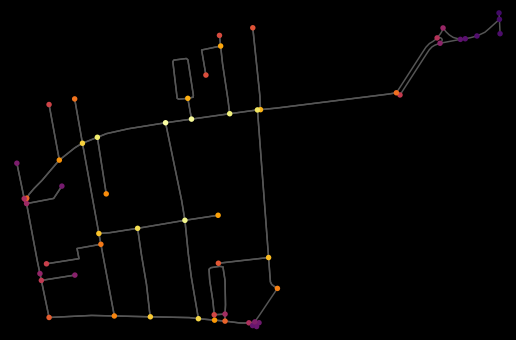

{'n': 58,
 'm': 120,
 'k_avg': 4.137931034482759,
 'intersection_count': 47,
 'streets_per_node_avg': 2.810344827586207,
 'streets_per_node_counts': {0: 0, 1: 11, 2: 0, 3: 36, 4: 11},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1896551724137931,
  2: 0.0,
  3: 0.6206896551724138,
  4: 0.1896551724137931},
 'edge_length_total': 12601.477999999997,
 'edge_length_avg': 105.01231666666665,
 'street_length_total': 6988.428,
 'street_length_avg': 99.83468571428571,
 'street_segments_count': 70,
 'node_density_km': 96.54650286093329,
 'intersection_density_km': 78.23595921489422,
 'edge_density_km': 20976.355720327374,
 'street_density_km': 11632.901446472866,
 'circuity_avg': 1.105984041366361,
 'self_loop_proportion': 0.016666666666666666,
 'clean_intersection_count': 29,
 'clean_intersection_density_km': 48.273251430466644}

In [97]:
wardno = pnq_census[(pnq_census['Ward']== 94)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w94 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w94

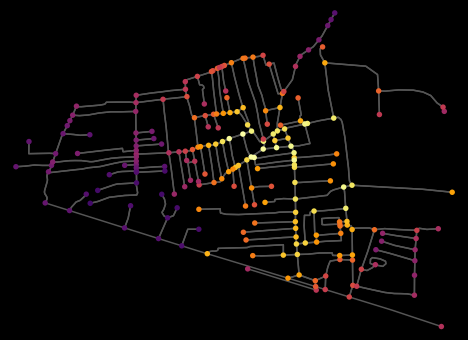

{'n': 216,
 'm': 505,
 'k_avg': 4.675925925925926,
 'intersection_count': 162,
 'streets_per_node_avg': 2.564814814814815,
 'streets_per_node_counts': {0: 0, 1: 54, 2: 0, 3: 148, 4: 14},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.25,
  2: 0.0,
  3: 0.6851851851851852,
  4: 0.06481481481481481},
 'edge_length_total': 53082.376999999986,
 'edge_length_avg': 105.11361782178216,
 'street_length_total': 27919.406,
 'street_length_avg': 107.79693436293437,
 'street_segments_count': 259,
 'node_density_km': 110.90023308693048,
 'intersection_density_km': 83.17517481519786,
 'edge_density_km': 27253.925843094057,
 'street_density_km': 14334.57700485484,
 'circuity_avg': 1.0462947271571532,
 'self_loop_proportion': 0.0039603960396039604,
 'clean_intersection_count': 119,
 'clean_intersection_density_km': 61.097813598818185}

In [98]:
wardno = pnq_census[(pnq_census['Ward']== 95)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w95 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w95

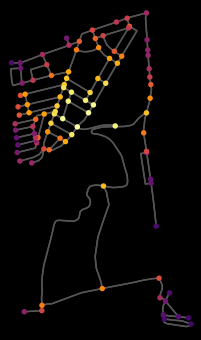

{'n': 100,
 'm': 256,
 'k_avg': 5.12,
 'intersection_count': 87,
 'streets_per_node_avg': 2.81,
 'streets_per_node_counts': {0: 0, 1: 13, 2: 0, 3: 80, 4: 7},
 'streets_per_node_proportion': {0: 0.0, 1: 0.13, 2: 0.0, 3: 0.8, 4: 0.07},
 'edge_length_total': 25003.45399999999,
 'edge_length_avg': 97.66974218749996,
 'street_length_total': 12501.726999999997,
 'street_length_avg': 97.66974218749998,
 'street_segments_count': 128,
 'node_density_km': 86.84155815341289,
 'intersection_density_km': 75.55215559346922,
 'edge_density_km': 21713.389045771833,
 'street_density_km': 10856.694522885919,
 'circuity_avg': 1.0737570832276202,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 73,
 'clean_intersection_density_km': 63.39433745199141}

In [99]:
wardno = pnq_census[(pnq_census['Ward']== 96)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w96 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w96

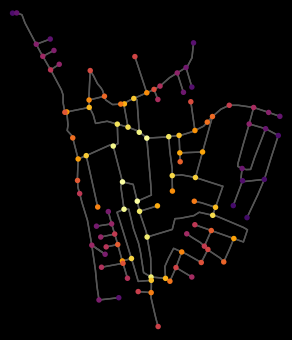

{'n': 105,
 'm': 240,
 'k_avg': 4.571428571428571,
 'intersection_count': 79,
 'streets_per_node_avg': 2.5619047619047617,
 'streets_per_node_counts': {0: 0, 1: 26, 2: 1, 3: 73, 4: 4, 5: 0, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.24761904761904763,
  2: 0.009523809523809525,
  3: 0.6952380952380952,
  4: 0.0380952380952381,
  5: 0.0,
  6: 0.009523809523809525},
 'edge_length_total': 16169.034000000001,
 'edge_length_avg': 67.370975,
 'street_length_total': 8084.517,
 'street_length_avg': 67.370975,
 'street_segments_count': 120,
 'node_density_km': 242.46711399077276,
 'intersection_density_km': 182.42763814543855,
 'edge_density_km': 37337.704857130295,
 'street_density_km': 18668.852428565144,
 'circuity_avg': 1.0504956629016535,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 64,
 'clean_intersection_density_km': 147.78947900389957}

In [100]:
wardno = pnq_census[(pnq_census['Ward']== 97)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w97 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w97

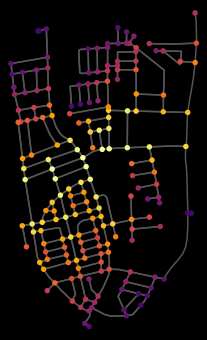

{'n': 188,
 'm': 502,
 'k_avg': 5.340425531914893,
 'intersection_count': 164,
 'streets_per_node_avg': 2.856382978723404,
 'streets_per_node_counts': {0: 0, 1: 24, 2: 0, 3: 143, 4: 21},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1276595744680851,
  2: 0.0,
  3: 0.7606382978723404,
  4: 0.11170212765957446},
 'edge_length_total': 32473.803000000054,
 'edge_length_avg': 64.68885059760967,
 'street_length_total': 16801.616,
 'street_length_avg': 66.14809448818899,
 'street_segments_count': 254,
 'node_density_km': 235.86427248471028,
 'intersection_density_km': 205.7539398270877,
 'edge_density_km': 40741.54212450433,
 'street_density_km': 21079.260289401427,
 'circuity_avg': 1.0228481543796433,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 143,
 'clean_intersection_density_km': 179.40739875166793}

In [101]:
wardno = pnq_census[(pnq_census['Ward']== 98)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w98 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w98

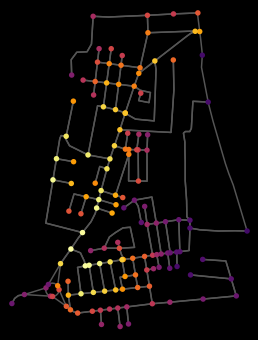

{'n': 138,
 'm': 324,
 'k_avg': 4.695652173913044,
 'intersection_count': 103,
 'streets_per_node_avg': 2.5652173913043477,
 'streets_per_node_counts': {0: 0, 1: 35, 2: 0, 3: 93, 4: 10},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2536231884057971,
  2: 0.0,
  3: 0.6739130434782609,
  4: 0.07246376811594203},
 'edge_length_total': 16914.70499999998,
 'edge_length_avg': 52.20587962962957,
 'street_length_total': 8939.584,
 'street_length_avg': 52.585788235294125,
 'street_segments_count': 170,
 'node_density_km': 439.2389959014237,
 'intersection_density_km': 327.83780128874383,
 'edge_density_km': 53837.666957744805,
 'street_density_km': 28453.723912582853,
 'circuity_avg': 1.095710299813245,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 48,
 'clean_intersection_density_km': 152.77878118310392}

In [102]:
wardno = pnq_census[(pnq_census['Ward']== 99)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w99 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w99

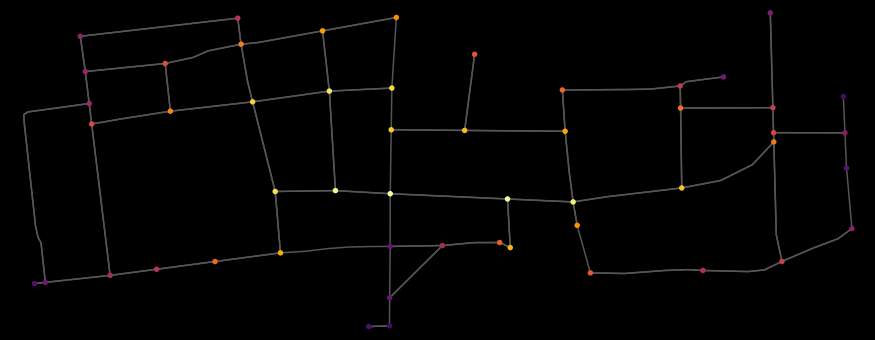

{'n': 52,
 'm': 125,
 'k_avg': 4.8076923076923075,
 'intersection_count': 50,
 'streets_per_node_avg': 3.1538461538461537,
 'streets_per_node_counts': {0: 0, 1: 2, 2: 0, 3: 38, 4: 12},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.038461538461538464,
  2: 0.0,
  3: 0.7307692307692307,
  4: 0.23076923076923078},
 'edge_length_total': 8581.912999999997,
 'edge_length_avg': 68.65530399999997,
 'street_length_total': 4585.905,
 'street_length_avg': 67.4397794117647,
 'street_segments_count': 68,
 'node_density_km': 250.29706177405583,
 'intersection_density_km': 240.67025170582292,
 'edge_density_km': 41308.223236549464,
 'street_density_km': 22073.818212979833,
 'circuity_avg': 1.0151170069484319,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 40,
 'clean_intersection_density_km': 192.53620136465833}

In [103]:
wardno = pnq_census[(pnq_census['Ward']== 100)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w100 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w100

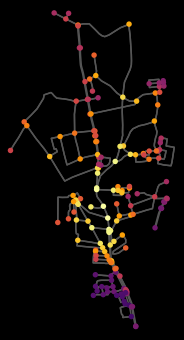

{'n': 168,
 'm': 392,
 'k_avg': 4.666666666666667,
 'intersection_count': 144,
 'streets_per_node_avg': 2.8511904761904763,
 'streets_per_node_counts': {0: 0, 1: 24, 2: 3, 3: 116, 4: 24, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.14285714285714285,
  2: 0.017857142857142856,
  3: 0.6904761904761905,
  4: 0.14285714285714285,
  5: 0.005952380952380952},
 'edge_length_total': 58364.056999999986,
 'edge_length_avg': 148.88790051020405,
 'street_length_total': 32696.422999999984,
 'street_length_avg': 147.2811846846846,
 'street_segments_count': 222,
 'node_density_km': 40.363511052233555,
 'intersection_density_km': 34.59729518762876,
 'edge_density_km': 14022.489641504098,
 'street_density_km': 7855.609709101207,
 'circuity_avg': 1.1283741392822424,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 103,
 'clean_intersection_density_km': 24.746676418928907}

In [104]:
wardno = pnq_census[(pnq_census['Ward']== 101)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w101 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w101

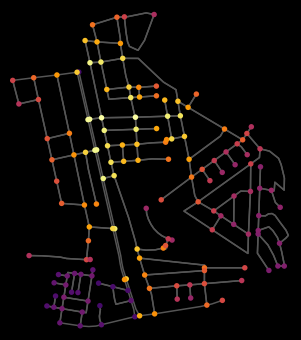

{'n': 154,
 'm': 370,
 'k_avg': 4.805194805194805,
 'intersection_count': 120,
 'streets_per_node_avg': 2.74025974025974,
 'streets_per_node_counts': {0: 0, 1: 34, 2: 2, 3: 88, 4: 30},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.22077922077922077,
  2: 0.012987012987012988,
  3: 0.5714285714285714,
  4: 0.19480519480519481},
 'edge_length_total': 32680.420000000035,
 'edge_length_avg': 88.32545945945955,
 'street_length_total': 17782.301,
 'street_length_avg': 90.26548730964467,
 'street_segments_count': 197,
 'node_density_km': 161.3272367592843,
 'intersection_density_km': 125.70953513710464,
 'edge_density_km': 34235.33671904451,
 'street_density_km': 18628.373269817257,
 'circuity_avg': 1.052187255480105,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 105,
 'clean_intersection_density_km': 109.99584324496655}

In [105]:
wardno = pnq_census[(pnq_census['Ward']== 102)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w102 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w102

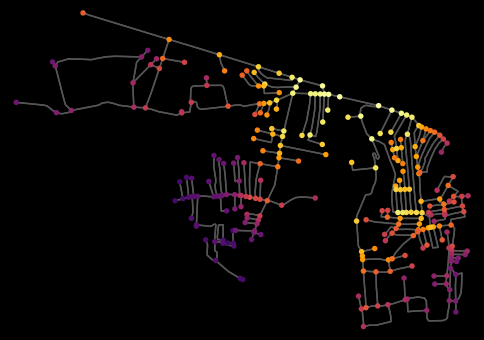

{'n': 270,
 'm': 616,
 'k_avg': 4.562962962962963,
 'intersection_count': 179,
 'streets_per_node_avg': 2.3851851851851853,
 'streets_per_node_counts': {0: 0, 1: 91, 2: 0, 3: 163, 4: 16},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.337037037037037,
  2: 0.0,
  3: 0.6037037037037037,
  4: 0.05925925925925926},
 'edge_length_total': 57092.822000000044,
 'edge_length_avg': 92.68315259740267,
 'street_length_total': 28761.96799999999,
 'street_length_avg': 93.08080258899673,
 'street_segments_count': 309,
 'node_density_km': 115.65328124566486,
 'intersection_density_km': 76.67384201101486,
 'edge_density_km': 24455.452592128473,
 'street_density_km': 12320.059164010414,
 'circuity_avg': 1.070876144647688,
 'self_loop_proportion': 0.003246753246753247,
 'clean_intersection_count': 115,
 'clean_intersection_density_km': 49.25973090093133}

In [106]:
wardno = pnq_census[(pnq_census['Ward']== 103)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w103 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w103

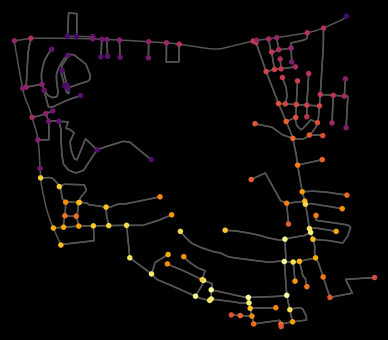

{'n': 143,
 'm': 314,
 'k_avg': 4.391608391608392,
 'intersection_count': 105,
 'streets_per_node_avg': 2.5734265734265733,
 'streets_per_node_counts': {0: 0, 1: 38, 2: 0, 3: 90, 4: 15},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.26573426573426573,
  2: 0.0,
  3: 0.6293706293706294,
  4: 0.1048951048951049},
 'edge_length_total': 36291.33200000002,
 'edge_length_avg': 115.57749044585992,
 'street_length_total': 19766.86900000001,
 'street_length_avg': 116.27570000000006,
 'street_segments_count': 170,
 'node_density_km': 71.19963529123282,
 'intersection_density_km': 52.279452486569554,
 'edge_density_km': 18069.437780650685,
 'street_density_km': 9841.91513041662,
 'circuity_avg': 1.1442979520556364,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 90,
 'clean_intersection_density_km': 44.810959274202474}

In [107]:
wardno = pnq_census[(pnq_census['Ward']== 104)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w104 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w104

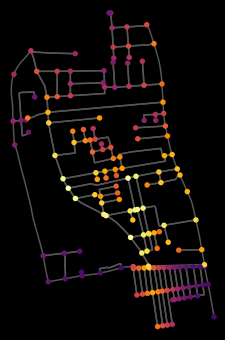

{'n': 161,
 'm': 373,
 'k_avg': 4.633540372670807,
 'intersection_count': 125,
 'streets_per_node_avg': 2.7577639751552794,
 'streets_per_node_counts': {0: 0, 1: 36, 2: 0, 3: 92, 4: 33},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2236024844720497,
  2: 0.0,
  3: 0.5714285714285714,
  4: 0.20496894409937888},
 'edge_length_total': 27646.578999999987,
 'edge_length_avg': 74.11951474530828,
 'street_length_total': 15443.516000000007,
 'street_length_avg': 74.60635748792274,
 'street_segments_count': 207,
 'node_density_km': 209.2615153797272,
 'intersection_density_km': 162.47012063643416,
 'edge_density_km': 35933.94420251764,
 'street_density_km': 20072.87926056562,
 'circuity_avg': 1.0370196056733418,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 77,
 'clean_intersection_density_km': 100.08159431204345}

In [108]:
wardno = pnq_census[(pnq_census['Ward']== 105)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w105 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w105

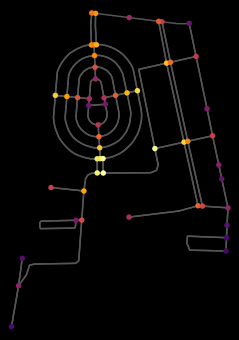

{'n': 54,
 'm': 153,
 'k_avg': 5.666666666666667,
 'intersection_count': 51,
 'streets_per_node_avg': 3.240740740740741,
 'streets_per_node_counts': {0: 0, 1: 3, 2: 0, 3: 32, 4: 19},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.05555555555555555,
  2: 0.0,
  3: 0.5925925925925926,
  4: 0.35185185185185186},
 'edge_length_total': 15560.100000000004,
 'edge_length_avg': 101.70000000000003,
 'street_length_total': 8179.200999999998,
 'street_length_avg': 102.24001249999998,
 'street_segments_count': 80,
 'node_density_km': 135.60344157698222,
 'intersection_density_km': 128.06991704492765,
 'edge_density_km': 39074.13169040744,
 'street_density_km': 20539.403795368413,
 'circuity_avg': 1.1555838969235197,
 'self_loop_proportion': 0.013071895424836602,
 'clean_intersection_count': 38,
 'clean_intersection_density_km': 95.4246440726912}

In [109]:
wardno = pnq_census[(pnq_census['Ward']== 106)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w106 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w106

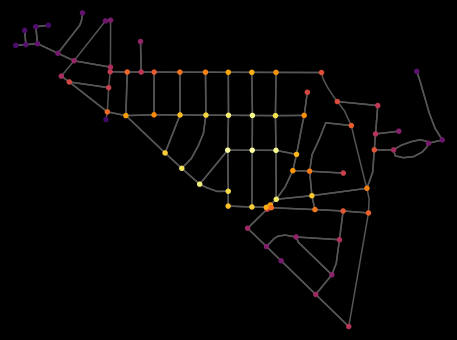

{'n': 78,
 'm': 201,
 'k_avg': 5.153846153846154,
 'intersection_count': 71,
 'streets_per_node_avg': 3.0641025641025643,
 'streets_per_node_counts': {0: 0, 1: 7, 2: 0, 3: 52, 4: 19},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.08974358974358974,
  2: 0.0,
  3: 0.6666666666666666,
  4: 0.24358974358974358},
 'edge_length_total': 13583.836000000001,
 'edge_length_avg': 67.5812736318408,
 'street_length_total': 7291.548000000001,
 'street_length_avg': 66.89493577981652,
 'street_segments_count': 109,
 'node_density_km': 251.29332864739553,
 'intersection_density_km': 228.7413632559626,
 'edge_density_km': 43763.171336414394,
 'street_density_km': 23491.24830656743,
 'circuity_avg': 1.013818662849361,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 61,
 'clean_intersection_density_km': 196.52426983962985}

In [110]:
wardno = pnq_census[(pnq_census['Ward']== 107)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w107 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w107

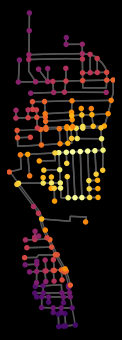

{'n': 181,
 'm': 390,
 'k_avg': 4.30939226519337,
 'intersection_count': 129,
 'streets_per_node_avg': 2.5193370165745854,
 'streets_per_node_counts': {0: 0, 1: 52, 2: 0, 3: 112, 4: 17},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.287292817679558,
  2: 0.0,
  3: 0.6187845303867403,
  4: 0.09392265193370165},
 'edge_length_total': 30108.623,
 'edge_length_avg': 77.20159743589744,
 'street_length_total': 16385.52,
 'street_length_avg': 76.92732394366197,
 'street_segments_count': 213,
 'node_density_km': 221.1328604958283,
 'intersection_density_km': 157.60297792244117,
 'edge_density_km': 36784.56314685352,
 'street_density_km': 20018.65695199782,
 'circuity_avg': 1.0266651521266201,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 98,
 'clean_intersection_density_km': 119.72939408061423}

In [111]:
wardno = pnq_census[(pnq_census['Ward']== 108)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w108 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w108

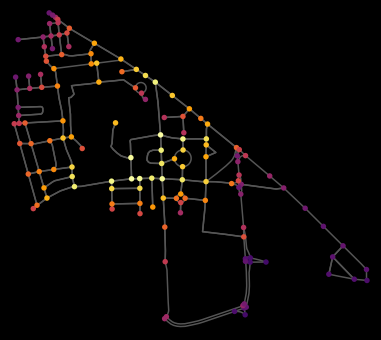

{'n': 139,
 'm': 316,
 'k_avg': 4.546762589928058,
 'intersection_count': 123,
 'streets_per_node_avg': 2.971223021582734,
 'streets_per_node_counts': {0: 0, 1: 16, 2: 2, 3: 94, 4: 24, 5: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.11510791366906475,
  2: 0.014388489208633094,
  3: 0.6762589928057554,
  4: 0.17266187050359713,
  5: 0.02158273381294964},
 'edge_length_total': 23999.134000000005,
 'edge_length_avg': 75.9466265822785,
 'street_length_total': 14085.798999999999,
 'street_length_avg': 75.32512834224599,
 'street_segments_count': 187,
 'node_density_km': 150.35605456594953,
 'intersection_density_km': 133.04888281735103,
 'edge_density_km': 25959.820872226872,
 'street_density_km': 15236.583906827318,
 'circuity_avg': 1.0644062220359325,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 92,
 'clean_intersection_density_km': 99.51623755444142}

In [112]:
wardno = pnq_census[(pnq_census['Ward']== 109)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w109 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w109

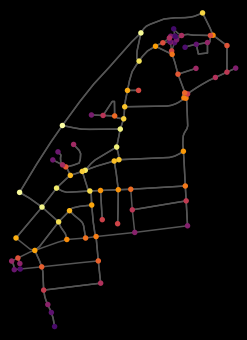

{'n': 87,
 'm': 199,
 'k_avg': 4.574712643678161,
 'intersection_count': 77,
 'streets_per_node_avg': 2.9655172413793105,
 'streets_per_node_counts': {0: 0, 1: 10, 2: 0, 3: 61, 4: 15, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.11494252873563218,
  2: 0.0,
  3: 0.7011494252873564,
  4: 0.1724137931034483,
  5: 0.011494252873563218},
 'edge_length_total': 15274.446999999996,
 'edge_length_avg': 76.75601507537687,
 'street_length_total': 8358.539000000006,
 'street_length_avg': 72.05637068965522,
 'street_segments_count': 116,
 'node_density_km': 204.2001445064072,
 'intersection_density_km': 180.72886352865928,
 'edge_density_km': 35851.083731671926,
 'street_density_km': 19618.561743246457,
 'circuity_avg': 1.0328476716960988,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 52,
 'clean_intersection_density_km': 122.05066108428937}

In [113]:
wardno = pnq_census[(pnq_census['Ward']== 110)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w110 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w110

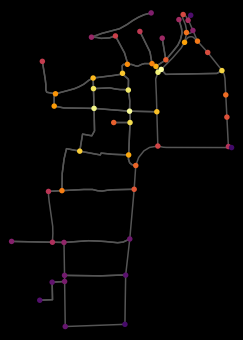

{'n': 55,
 'm': 106,
 'k_avg': 3.8545454545454545,
 'intersection_count': 47,
 'streets_per_node_avg': 2.8545454545454545,
 'streets_per_node_counts': {0: 0, 1: 8, 2: 0, 3: 39, 4: 8},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.14545454545454545,
  2: 0.0,
  3: 0.7090909090909091,
  4: 0.14545454545454545},
 'edge_length_total': 8130.388999999999,
 'edge_length_avg': 76.70178301886791,
 'street_length_total': 5046.469,
 'street_length_avg': 75.3204328358209,
 'street_segments_count': 67,
 'node_density_km': 179.02746485220655,
 'intersection_density_km': 152.98710632824924,
 'edge_density_km': 26464.78056240485,
 'street_density_km': 16426.482755004545,
 'circuity_avg': 1.0399859333986345,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 32,
 'clean_intersection_density_km': 104.16143409582928}

In [114]:
wardno = pnq_census[(pnq_census['Ward']== 111)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w111 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w111

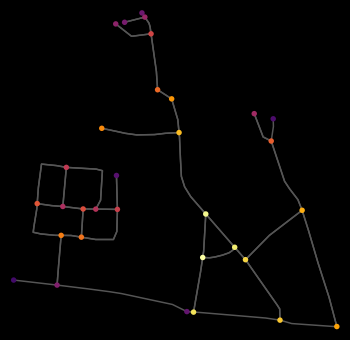

{'n': 32,
 'm': 70,
 'k_avg': 4.375,
 'intersection_count': 28,
 'streets_per_node_avg': 2.8125,
 'streets_per_node_counts': {0: 0, 1: 4, 2: 0, 3: 26, 4: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.125,
  2: 0.0,
  3: 0.8125,
  4: 0.0625},
 'edge_length_total': 5680.530999999998,
 'edge_length_avg': 81.15044285714283,
 'street_length_total': 3147.2079999999996,
 'street_length_avg': 82.82126315789473,
 'street_segments_count': 38,
 'node_density_km': 170.63652384814486,
 'intersection_density_km': 149.30695836712675,
 'edge_density_km': 30290.81448286331,
 'street_density_km': 16782.14477959601,
 'circuity_avg': 1.0629147085467747,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 23,
 'clean_intersection_density_km': 122.64500151585412}

In [115]:
wardno = pnq_census[(pnq_census['Ward']== 112)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w112 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w112

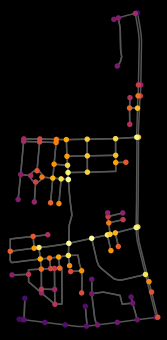

{'n': 102,
 'm': 231,
 'k_avg': 4.529411764705882,
 'intersection_count': 80,
 'streets_per_node_avg': 2.764705882352941,
 'streets_per_node_counts': {0: 0, 1: 22, 2: 0, 3: 60, 4: 20},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.21568627450980393,
  2: 0.0,
  3: 0.5882352941176471,
  4: 0.19607843137254902},
 'edge_length_total': 18268.335999999996,
 'edge_length_avg': 79.08370562770561,
 'street_length_total': 10819.631999999998,
 'street_length_avg': 83.87311627906975,
 'street_segments_count': 129,
 'node_density_km': 161.3748972497729,
 'intersection_density_km': 126.56854686256699,
 'edge_density_km': 28902.45926396399,
 'street_density_km': 17117.813747846612,
 'circuity_avg': 1.0383794430905662,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 61,
 'clean_intersection_density_km': 96.50851698270733}

In [116]:
wardno = pnq_census[(pnq_census['Ward']== 113)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w113 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w113

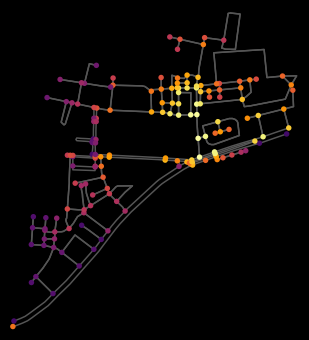

{'n': 159,
 'm': 354,
 'k_avg': 4.452830188679245,
 'intersection_count': 135,
 'streets_per_node_avg': 2.830188679245283,
 'streets_per_node_counts': {0: 0, 1: 24, 2: 0, 3: 114, 4: 21},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1509433962264151,
  2: 0.0,
  3: 0.7169811320754716,
  4: 0.1320754716981132},
 'edge_length_total': 26357.42999999998,
 'edge_length_avg': 74.45601694915248,
 'street_length_total': 16467.977000000003,
 'street_length_avg': 76.95316355140189,
 'street_segments_count': 214,
 'node_density_km': 196.23033734563018,
 'intersection_density_km': 166.6106637840256,
 'edge_density_km': 32529.103021785086,
 'street_density_km': 20324.0042900005,
 'circuity_avg': 1.1539226767236177,
 'self_loop_proportion': 0.005649717514124294,
 'clean_intersection_count': 78,
 'clean_intersection_density_km': 96.2639390752148}

In [117]:
wardno = pnq_census[(pnq_census['Ward']== 114)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w114 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w114

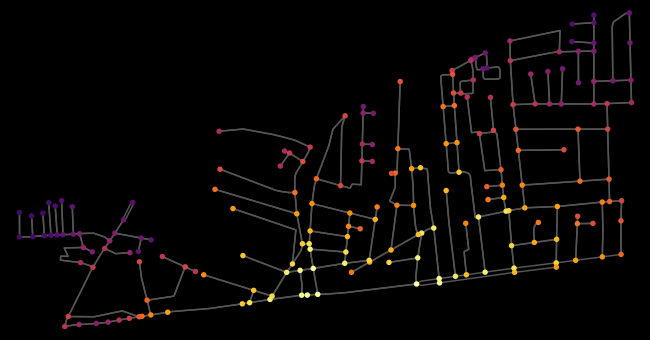

{'n': 199,
 'm': 464,
 'k_avg': 4.663316582914573,
 'intersection_count': 150,
 'streets_per_node_avg': 2.5527638190954773,
 'streets_per_node_counts': {0: 0, 1: 49, 2: 2, 3: 137, 4: 11},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.24623115577889448,
  2: 0.010050251256281407,
  3: 0.6884422110552764,
  4: 0.05527638190954774},
 'edge_length_total': 34688.46200000001,
 'edge_length_avg': 74.75961637931036,
 'street_length_total': 17834.237999999983,
 'street_length_avg': 74.93377310924363,
 'street_segments_count': 238,
 'node_density_km': 218.93912544962072,
 'intersection_density_km': 165.02949154494024,
 'edge_density_km': 38164.12830890655,
 'street_density_km': 19621.16819487633,
 'circuity_avg': 1.0456460773375245,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 115,
 'clean_intersection_density_km': 126.52261018445418}

In [118]:
wardno = pnq_census[(pnq_census['Ward']== 115)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w115 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w115

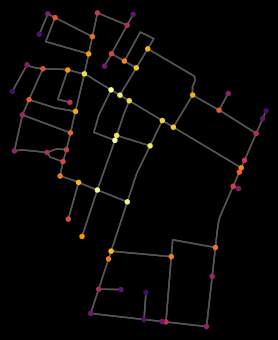

{'n': 65,
 'm': 160,
 'k_avg': 4.923076923076923,
 'intersection_count': 54,
 'streets_per_node_avg': 2.6923076923076925,
 'streets_per_node_counts': {0: 0, 1: 11, 2: 0, 3: 52, 4: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.16923076923076924,
  2: 0.0,
  3: 0.8,
  4: 0.03076923076923077},
 'edge_length_total': 10973.381999999996,
 'edge_length_avg': 68.58363749999998,
 'street_length_total': 5486.690999999999,
 'street_length_avg': 68.58363749999998,
 'street_segments_count': 80,
 'node_density_km': 233.2016066441468,
 'intersection_density_km': 193.7367193659066,
 'edge_density_km': 39369.389426460926,
 'street_density_km': 19684.694713230467,
 'circuity_avg': 1.0491241023871032,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 43,
 'clean_intersection_density_km': 154.27183208766635}

In [119]:
wardno = pnq_census[(pnq_census['Ward']== 116)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w116 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w116

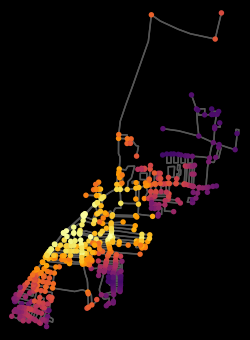

{'n': 520,
 'm': 1198,
 'k_avg': 4.607692307692307,
 'intersection_count': 362,
 'streets_per_node_avg': 2.4884615384615385,
 'streets_per_node_counts': {0: 0, 1: 158, 2: 0, 3: 312, 4: 50},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3038461538461538,
  2: 0.0,
  3: 0.6,
  4: 0.09615384615384616},
 'edge_length_total': 116619.59400000013,
 'edge_length_avg': 97.34523706176972,
 'street_length_total': 62734.10699999997,
 'street_length_avg': 98.02204218749995,
 'street_segments_count': 640,
 'node_density_km': 72.27819912327844,
 'intersection_density_km': 50.31674631274384,
 'edge_density_km': 16209.719686169034,
 'street_density_km': 8719.823610705873,
 'circuity_avg': 1.1257674211390756,
 'self_loop_proportion': 0.01001669449081803,
 'clean_intersection_count': 246,
 'clean_intersection_density_km': 34.19314804678172}

In [120]:
wardno = pnq_census[(pnq_census['Ward']== 117)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w117 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w117

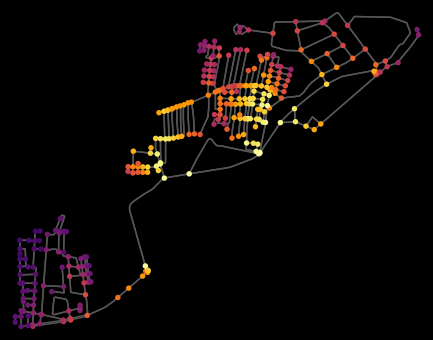

{'n': 312,
 'm': 743,
 'k_avg': 4.762820512820513,
 'intersection_count': 231,
 'streets_per_node_avg': 2.605769230769231,
 'streets_per_node_counts': {0: 0, 1: 81, 2: 0, 3: 193, 4: 37, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.25961538461538464,
  2: 0.0,
  3: 0.6185897435897436,
  4: 0.11858974358974358,
  5: 0.003205128205128205},
 'edge_length_total': 70794.16899999995,
 'edge_length_avg': 95.28151951547773,
 'street_length_total': 36546.04399999998,
 'street_length_avg': 94.19083505154634,
 'street_segments_count': 388,
 'node_density_km': 94.80360096711915,
 'intersection_density_km': 70.19112763911707,
 'edge_density_km': 21511.353040624334,
 'street_density_km': 11104.796706098645,
 'circuity_avg': 1.0760387865730887,
 'self_loop_proportion': 0.0026917900403768506,
 'clean_intersection_count': 170,
 'clean_intersection_density_km': 51.65580821926364}

In [121]:
wardno = pnq_census[(pnq_census['Ward']== 118)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w118 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w118

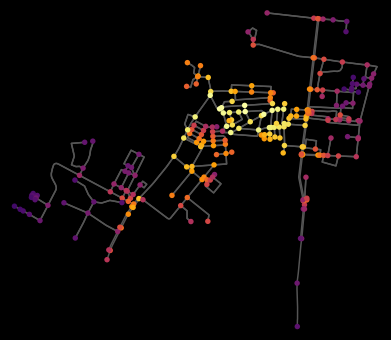

{'n': 247,
 'm': 591,
 'k_avg': 4.7854251012145745,
 'intersection_count': 198,
 'streets_per_node_avg': 2.7246963562753037,
 'streets_per_node_counts': {0: 0, 1: 49, 2: 0, 3: 168, 4: 30},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.19838056680161945,
  2: 0.0,
  3: 0.680161943319838,
  4: 0.1214574898785425},
 'edge_length_total': 58472.943999999974,
 'edge_length_avg': 98.93899153976307,
 'street_length_total': 32466.215999999986,
 'street_length_avg': 101.45692499999996,
 'street_segments_count': 320,
 'node_density_km': 59.99134424320189,
 'intersection_density_km': 48.09022736904443,
 'edge_density_km': 14201.904908572731,
 'street_density_km': 7885.39247097226,
 'circuity_avg': 1.1096807530265367,
 'self_loop_proportion': 0.00676818950930626,
 'clean_intersection_count': 147,
 'clean_intersection_density_km': 35.70335062247238}

In [122]:
wardno = pnq_census[(pnq_census['Ward']== 119)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w119 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w119

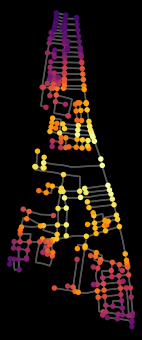

{'n': 283,
 'm': 680,
 'k_avg': 4.80565371024735,
 'intersection_count': 207,
 'streets_per_node_avg': 2.5406360424028267,
 'streets_per_node_counts': {0: 0, 1: 76, 2: 0, 3: 185, 4: 22},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.26855123674911663,
  2: 0.0,
  3: 0.6537102473498233,
  4: 0.07773851590106007},
 'edge_length_total': 43004.04599999996,
 'edge_length_avg': 63.241244117647,
 'street_length_total': 21502.02300000001,
 'street_length_avg': 63.241244117647085,
 'street_segments_count': 340,
 'node_density_km': 264.8035897178474,
 'intersection_density_km': 193.6902582035138,
 'edge_density_km': 40238.96025862694,
 'street_density_km': 20119.4801293135,
 'circuity_avg': 1.0410384812167268,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 139,
 'clean_intersection_density_km': 130.0625405327943}

In [123]:
wardno = pnq_census[(pnq_census['Ward']== 120)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w120 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w120

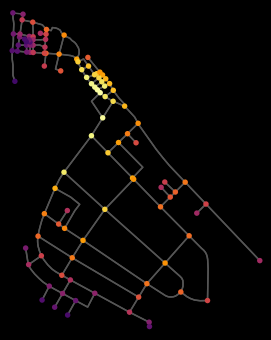

{'n': 107,
 'm': 289,
 'k_avg': 5.401869158878505,
 'intersection_count': 88,
 'streets_per_node_avg': 2.803738317757009,
 'streets_per_node_counts': {0: 0, 1: 19, 2: 0, 3: 71, 4: 17},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.17757009345794392,
  2: 0.0,
  3: 0.6635514018691588,
  4: 0.1588785046728972},
 'edge_length_total': 28650.197999999993,
 'edge_length_avg': 99.13563321799306,
 'street_length_total': 14353.189000000006,
 'street_length_avg': 98.98751034482763,
 'street_segments_count': 145,
 'node_density_km': 80.73988251754017,
 'intersection_density_km': 66.40289403311714,
 'edge_density_km': 21618.81888433891,
 'street_density_km': 10830.60554777617,
 'circuity_avg': 1.0327754590032157,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 63,
 'clean_intersection_density_km': 47.53843550098159}

In [124]:
wardno = pnq_census[(pnq_census['Ward']== 121)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w121 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w121

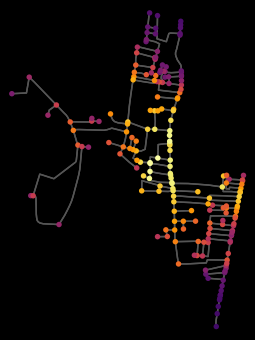

{'n': 196,
 'm': 439,
 'k_avg': 4.479591836734694,
 'intersection_count': 151,
 'streets_per_node_avg': 2.576530612244898,
 'streets_per_node_counts': {0: 0, 1: 45, 2: 0, 3: 144, 4: 7},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.22959183673469388,
  2: 0.0,
  3: 0.7346938775510204,
  4: 0.03571428571428571},
 'edge_length_total': 31509.862999999994,
 'edge_length_avg': 71.77645330296126,
 'street_length_total': 15774.323999999993,
 'street_length_avg': 71.37703167420811,
 'street_segments_count': 221,
 'node_density_km': 115.38457693982897,
 'intersection_density_km': 88.89321998935804,
 'edge_density_km': 18549.756182076377,
 'street_density_km': 9286.294394141785,
 'circuity_avg': 1.060615469951736,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 89,
 'clean_intersection_density_km': 52.3940170798203}

In [125]:
wardno = pnq_census[(pnq_census['Ward']== 122)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w122 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w122

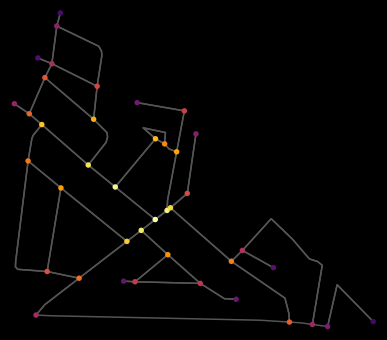

{'n': 41,
 'm': 99,
 'k_avg': 4.829268292682927,
 'intersection_count': 32,
 'streets_per_node_avg': 2.6341463414634148,
 'streets_per_node_counts': {0: 0, 1: 9, 2: 0, 3: 29, 4: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.21951219512195122,
  2: 0.0,
  3: 0.7073170731707317,
  4: 0.07317073170731707},
 'edge_length_total': 8576.947,
 'edge_length_avg': 86.63582828282829,
 'street_length_total': 4545.311,
 'street_length_avg': 89.12374509803921,
 'street_segments_count': 51,
 'node_density_km': 215.62846139099034,
 'intersection_density_km': 168.29538450028514,
 'edge_density_km': 45108.143537611475,
 'street_density_km': 23904.839450574233,
 'circuity_avg': 1.1023383350301816,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 24,
 'clean_intersection_density_km': 126.22153837521385}

In [126]:
wardno = pnq_census[(pnq_census['Ward']== 123)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w123 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w123

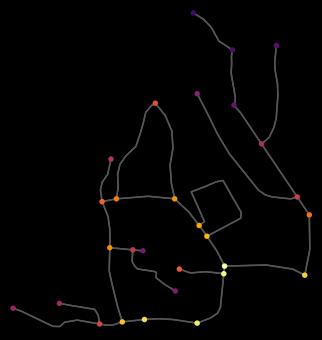

{'n': 29,
 'm': 62,
 'k_avg': 4.275862068965517,
 'intersection_count': 21,
 'streets_per_node_avg': 2.4827586206896552,
 'streets_per_node_counts': {0: 0, 1: 8, 2: 0, 3: 20, 4: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.27586206896551724,
  2: 0.0,
  3: 0.6896551724137931,
  4: 0.034482758620689655},
 'edge_length_total': 4262.380000000002,
 'edge_length_avg': 68.74806451612906,
 'street_length_total': 2131.1899999999996,
 'street_length_avg': 68.74806451612902,
 'street_segments_count': 31,
 'node_density_km': 365.32854291928373,
 'intersection_density_km': 264.54825521741236,
 'edge_density_km': 53695.48533683784,
 'street_density_km': 26847.7426684189,
 'circuity_avg': 1.1283715831519978,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 14,
 'clean_intersection_density_km': 176.3655034782749}

In [127]:
wardno = pnq_census[(pnq_census['Ward']== 124)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w124 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w124

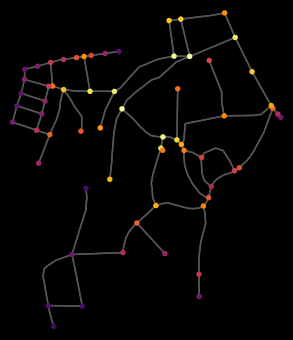

{'n': 64,
 'm': 154,
 'k_avg': 4.8125,
 'intersection_count': 55,
 'streets_per_node_avg': 2.84375,
 'streets_per_node_counts': {0: 0, 1: 9, 2: 0, 3: 47, 4: 8},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.140625,
  2: 0.0,
  3: 0.734375,
  4: 0.125},
 'edge_length_total': 7059.568000000002,
 'edge_length_avg': 45.841350649350666,
 'street_length_total': 3529.7840000000006,
 'street_length_avg': 45.84135064935066,
 'street_segments_count': 77,
 'node_density_km': 476.5052588274727,
 'intersection_density_km': 409.49670680485934,
 'edge_density_km': 52561.26995390851,
 'street_density_km': 26280.63497695425,
 'circuity_avg': 1.0295704480245569,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 23,
 'clean_intersection_density_km': 171.244077391123}

In [128]:
wardno = pnq_census[(pnq_census['Ward']== 125)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w125 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w125

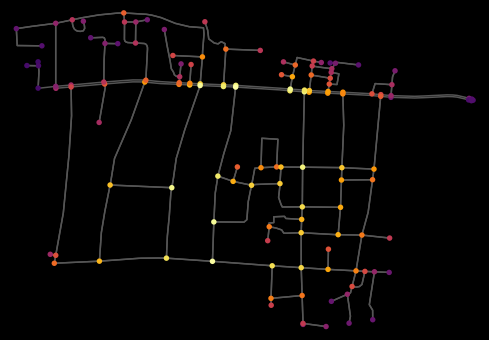

{'n': 132,
 'm': 314,
 'k_avg': 4.757575757575758,
 'intersection_count': 100,
 'streets_per_node_avg': 2.734848484848485,
 'streets_per_node_counts': {0: 0, 1: 32, 2: 0, 3: 71, 4: 29},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.24242424242424243,
  2: 0.0,
  3: 0.5378787878787878,
  4: 0.2196969696969697},
 'edge_length_total': 34689.90499999999,
 'edge_length_avg': 110.4774044585987,
 'street_length_total': 19103.894,
 'street_length_avg': 107.93160451977401,
 'street_segments_count': 177,
 'node_density_km': 76.25012891746174,
 'intersection_density_km': 57.76524917989525,
 'edge_density_km': 20038.710063518938,
 'street_density_km': 11035.411972163058,
 'circuity_avg': 1.0559429328736798,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 72,
 'clean_intersection_density_km': 41.59097940952458}

In [129]:
wardno = pnq_census[(pnq_census['Ward']== 126)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w126 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w126

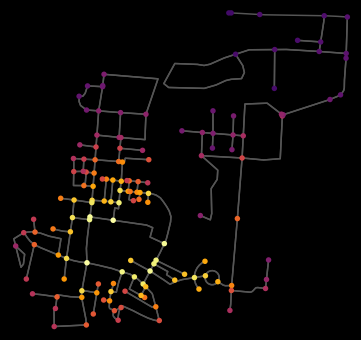

{'n': 143,
 'm': 337,
 'k_avg': 4.713286713286713,
 'intersection_count': 109,
 'streets_per_node_avg': 2.6223776223776225,
 'streets_per_node_counts': {0: 0, 1: 34, 2: 0, 3: 95, 4: 14},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.23776223776223776,
  2: 0.0,
  3: 0.6643356643356644,
  4: 0.0979020979020979},
 'edge_length_total': 36574.04,
 'edge_length_avg': 108.52830860534125,
 'street_length_total': 19826.882000000005,
 'street_length_avg': 113.94759770114945,
 'street_segments_count': 174,
 'node_density_km': 76.79779453559986,
 'intersection_density_km': 58.53817905161108,
 'edge_density_km': 19641.997267530147,
 'street_density_km': 10647.977693129955,
 'circuity_avg': 1.1522192088234735,
 'self_loop_proportion': 0.011869436201780416,
 'clean_intersection_count': 94,
 'clean_intersection_density_km': 50.482466338086624}

In [130]:
wardno = pnq_census[(pnq_census['Ward']== 127)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w127 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w127

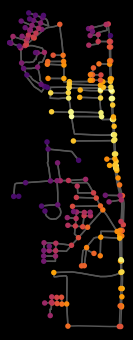

{'n': 214,
 'm': 451,
 'k_avg': 4.214953271028038,
 'intersection_count': 155,
 'streets_per_node_avg': 2.5654205607476634,
 'streets_per_node_counts': {0: 0, 1: 59, 2: 3, 3: 124, 4: 28},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2757009345794392,
  2: 0.014018691588785047,
  3: 0.5794392523364486,
  4: 0.1308411214953271},
 'edge_length_total': 43108.90999999996,
 'edge_length_avg': 95.58516629711742,
 'street_length_total': 24220.702999999994,
 'street_length_avg': 94.61212109374998,
 'street_segments_count': 256,
 'node_density_km': 103.84246175885747,
 'intersection_density_km': 75.21299800291078,
 'edge_density_km': 20918.389430565534,
 'street_density_km': 11752.978621729644,
 'circuity_avg': 1.0551512700799537,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 105,
 'clean_intersection_density_km': 50.95074058261698}

In [131]:
wardno = pnq_census[(pnq_census['Ward']== 128)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w128 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w128

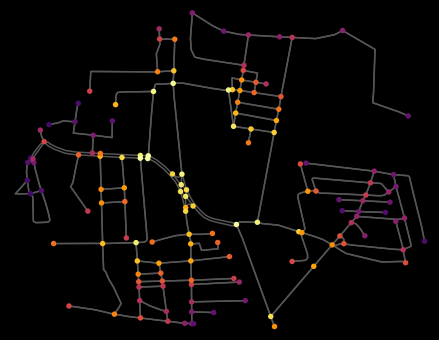

{'n': 142,
 'm': 348,
 'k_avg': 4.901408450704225,
 'intersection_count': 112,
 'streets_per_node_avg': 2.767605633802817,
 'streets_per_node_counts': {0: 0, 1: 30, 2: 2, 3: 83, 4: 25, 5: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2112676056338028,
  2: 0.014084507042253521,
  3: 0.5845070422535211,
  4: 0.176056338028169,
  5: 0.014084507042253521},
 'edge_length_total': 36429.61700000004,
 'edge_length_avg': 104.68280747126448,
 'street_length_total': 19323.513000000003,
 'street_length_avg': 102.78464361702129,
 'street_segments_count': 188,
 'node_density_km': 103.18228042461202,
 'intersection_density_km': 81.38320709546863,
 'edge_density_km': 26471.063077853643,
 'street_density_km': 14041.155895455184,
 'circuity_avg': 1.0676536128890666,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 88,
 'clean_intersection_density_km': 63.94394843215393}

In [132]:
wardno = pnq_census[(pnq_census['Ward']== 129)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w129 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w129

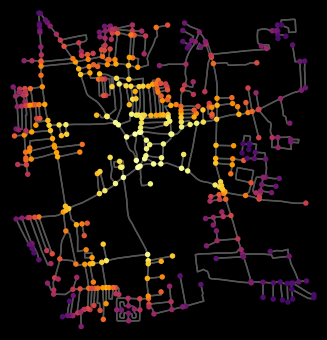

{'n': 465,
 'm': 1101,
 'k_avg': 4.735483870967742,
 'intersection_count': 340,
 'streets_per_node_avg': 2.5053763440860215,
 'streets_per_node_counts': {0: 0, 1: 125, 2: 1, 3: 318, 4: 21},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.26881720430107525,
  2: 0.002150537634408602,
  3: 0.6838709677419355,
  4: 0.04516129032258064},
 'edge_length_total': 110490.2209999998,
 'edge_length_avg': 100.3544241598545,
 'street_length_total': 56483.72799999999,
 'street_length_avg': 101.40705206463194,
 'street_segments_count': 557,
 'node_density_km': 90.6741816081264,
 'intersection_density_km': 66.29940160594188,
 'edge_density_km': 21545.39863414194,
 'street_density_km': 11014.227549625833,
 'circuity_avg': 1.104107327124379,
 'self_loop_proportion': 0.007266121707538601,
 'clean_intersection_count': 253,
 'clean_intersection_density_km': 49.33455472442146}

In [133]:
wardno = pnq_census[(pnq_census['Ward']== 130)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w130 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w130

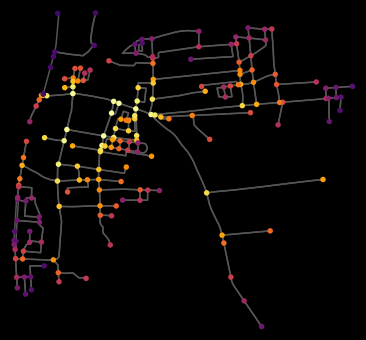

{'n': 186,
 'm': 441,
 'k_avg': 4.741935483870968,
 'intersection_count': 147,
 'streets_per_node_avg': 2.6881720430107525,
 'streets_per_node_counts': {0: 0, 1: 39, 2: 0, 3: 128, 4: 18, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.20967741935483872,
  2: 0.0,
  3: 0.6881720430107527,
  4: 0.0967741935483871,
  5: 0.005376344086021506},
 'edge_length_total': 46045.444,
 'edge_length_avg': 104.41143764172337,
 'street_length_total': 23752.152000000002,
 'street_length_avg': 102.82316883116884,
 'street_segments_count': 231,
 'node_density_km': 70.08181527242289,
 'intersection_density_km': 55.38724110239874,
 'edge_density_km': 17349.18441153061,
 'street_density_km': 8949.429724658656,
 'circuity_avg': 1.0631005927835988,
 'self_loop_proportion': 0.0045351473922902496,
 'clean_intersection_count': 117,
 'clean_intersection_density_km': 44.08372251007246}

In [134]:
wardno = pnq_census[(pnq_census['Ward']== 131)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w131 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w131

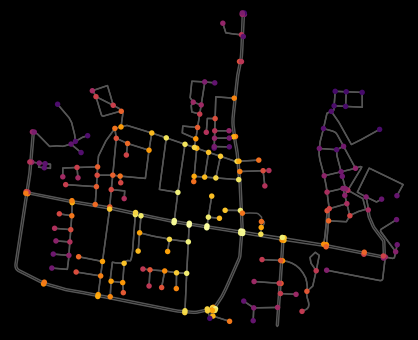

{'n': 221,
 'm': 477,
 'k_avg': 4.316742081447964,
 'intersection_count': 168,
 'streets_per_node_avg': 2.6515837104072397,
 'streets_per_node_counts': {0: 0, 1: 53, 2: 2, 3: 136, 4: 29, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2398190045248869,
  2: 0.00904977375565611,
  3: 0.6153846153846154,
  4: 0.13122171945701358,
  5: 0.004524886877828055},
 'edge_length_total': 39223.73400000006,
 'edge_length_avg': 82.23005031446554,
 'street_length_total': 24754.407000000017,
 'street_length_avg': 86.25228919860633,
 'street_segments_count': 287,
 'node_density_km': 149.55676014832687,
 'intersection_density_km': 113.69020680958786,
 'edge_density_km': 26543.776370858748,
 'street_density_km': 16751.98601951614,
 'circuity_avg': 1.1032675917992234,
 'self_loop_proportion': 0.0041928721174004195,
 'clean_intersection_count': 111,
 'clean_intersection_density_km': 75.11674378490626}

In [135]:
wardno = pnq_census[(pnq_census['Ward']== 132)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w132 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w132

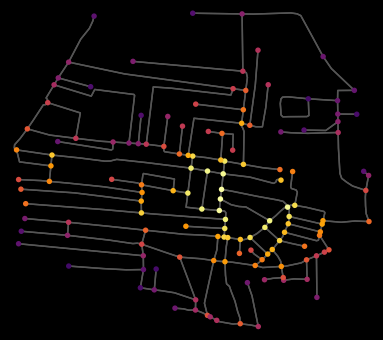

{'n': 138,
 'm': 338,
 'k_avg': 4.898550724637682,
 'intersection_count': 102,
 'streets_per_node_avg': 2.572463768115942,
 'streets_per_node_counts': {0: 0, 1: 36, 2: 0, 3: 89, 4: 13},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2608695652173913,
  2: 0.0,
  3: 0.644927536231884,
  4: 0.09420289855072464},
 'edge_length_total': 30506.706000000002,
 'edge_length_avg': 90.25652662721895,
 'street_length_total': 15501.392000000003,
 'street_length_avg': 91.18465882352943,
 'street_segments_count': 170,
 'node_density_km': 210.93164341912188,
 'intersection_density_km': 155.90599730978573,
 'edge_density_km': 46629.20023104338,
 'street_density_km': 23693.72528872485,
 'circuity_avg': 1.0679831999898444,
 'self_loop_proportion': 0.005917159763313609,
 'clean_intersection_count': 64,
 'clean_intersection_density_km': 97.82337086104204}

In [136]:
wardno = pnq_census[(pnq_census['Ward']== 133)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w133 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w133

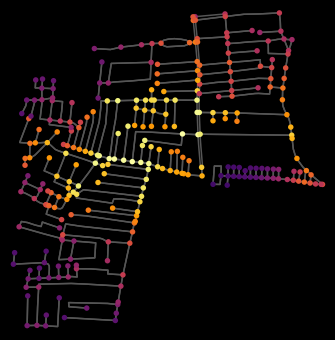

{'n': 280,
 'm': 630,
 'k_avg': 4.5,
 'intersection_count': 193,
 'streets_per_node_avg': 2.517857142857143,
 'streets_per_node_counts': {0: 0, 1: 87, 2: 0, 3: 154, 4: 39},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3107142857142857,
  2: 0.0,
  3: 0.55,
  4: 0.1392857142857143},
 'edge_length_total': 41089.83300000004,
 'edge_length_avg': 65.2219571428572,
 'street_length_total': 21172.40600000002,
 'street_length_avg': 64.9460306748467,
 'street_segments_count': 326,
 'node_density_km': 285.20686742327416,
 'intersection_density_km': 196.58901933104252,
 'edge_density_km': 41853.937688841026,
 'street_density_km': 21566.127110977643,
 'circuity_avg': 1.0628230966756187,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 113,
 'clean_intersection_density_km': 115.10134292439278}

In [137]:
wardno = pnq_census[(pnq_census['Ward']== 134)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w134 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w134

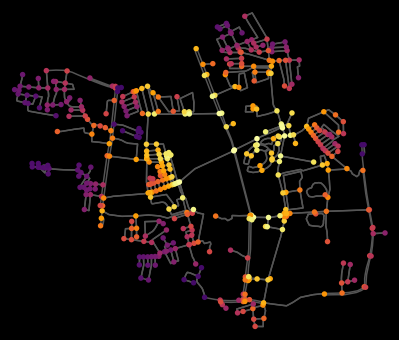

{'n': 449,
 'm': 1033,
 'k_avg': 4.601336302895323,
 'intersection_count': 338,
 'streets_per_node_avg': 2.6325167037861914,
 'streets_per_node_counts': {0: 0, 1: 111, 2: 2, 3: 285, 4: 43, 5: 8},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.24721603563474387,
  2: 0.004454342984409799,
  3: 0.6347438752783965,
  4: 0.0957683741648107,
  5: 0.017817371937639197},
 'edge_length_total': 89316.201,
 'edge_length_avg': 86.46292449177155,
 'street_length_total': 51063.164000000004,
 'street_length_avg': 89.58449824561404,
 'street_segments_count': 570,
 'node_density_km': 115.40511081170595,
 'intersection_density_km': 86.8751168248477,
 'edge_density_km': 22956.672769901117,
 'street_density_km': 13124.610467296914,
 'circuity_avg': 1.1439216097586011,
 'self_loop_proportion': 0.007744433688286544,
 'clean_intersection_count': 216,
 'clean_intersection_density_km': 55.51782613658906}

In [138]:
wardno = pnq_census[(pnq_census['Ward']== 135)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w135 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w135

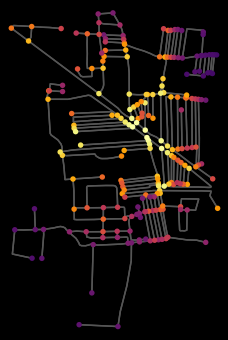

{'n': 214,
 'm': 502,
 'k_avg': 4.691588785046729,
 'intersection_count': 149,
 'streets_per_node_avg': 2.453271028037383,
 'streets_per_node_counts': {0: 0, 1: 65, 2: 0, 3: 136, 4: 13},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3037383177570093,
  2: 0.0,
  3: 0.6355140186915887,
  4: 0.06074766355140187},
 'edge_length_total': 59721.24999999997,
 'edge_length_avg': 118.9666334661354,
 'street_length_total': 29860.62500000001,
 'street_length_avg': 118.9666334661355,
 'street_segments_count': 251,
 'node_density_km': 103.44184625354298,
 'intersection_density_km': 72.02259388681264,
 'edge_density_km': 28867.646544716827,
 'street_density_km': 14433.823272358426,
 'circuity_avg': 1.0865960569118616,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 85,
 'clean_intersection_density_km': 41.086714633416605}

In [139]:
wardno = pnq_census[(pnq_census['Ward']== 136)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w136 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w136

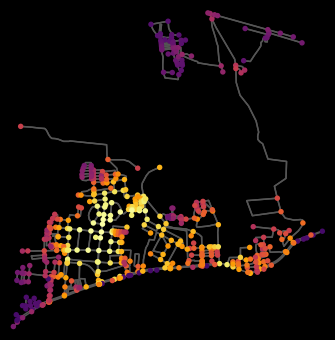

{'n': 509,
 'm': 1189,
 'k_avg': 4.671905697445973,
 'intersection_count': 401,
 'streets_per_node_avg': 2.669941060903733,
 'streets_per_node_counts': {0: 0, 1: 108, 2: 6, 3: 343, 4: 50, 5: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.21218074656188604,
  2: 0.011787819253438114,
  3: 0.6738703339882122,
  4: 0.09823182711198428,
  5: 0.003929273084479371},
 'edge_length_total': 143479.41899999985,
 'edge_length_avg': 120.67234566862898,
 'street_length_total': 78032.7399999999,
 'street_length_avg': 120.42089506172825,
 'street_segments_count': 648,
 'node_density_km': 35.24937955304619,
 'intersection_density_km': 27.770139883637565,
 'edge_density_km': 9936.268169708332,
 'street_density_km': 5403.940412228224,
 'circuity_avg': 1.1246153547388984,
 'self_loop_proportion': 0.00672834314550042,
 'clean_intersection_count': 284,
 'clean_intersection_density_km': 19.667630241778227}

In [140]:
wardno = pnq_census[(pnq_census['Ward']== 137)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w137 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w137

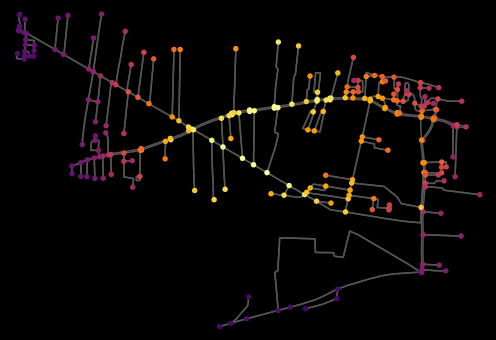

{'n': 242,
 'm': 525,
 'k_avg': 4.338842975206612,
 'intersection_count': 172,
 'streets_per_node_avg': 2.541322314049587,
 'streets_per_node_counts': {0: 0, 1: 70, 2: 0, 3: 144, 4: 27, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2892561983471074,
  2: 0.0,
  3: 0.5950413223140496,
  4: 0.1115702479338843,
  5: 0.004132231404958678},
 'edge_length_total': 67735.84199999995,
 'edge_length_avg': 129.0206514285713,
 'street_length_total': 38335.01399999996,
 'street_length_avg': 126.10201973684197,
 'street_segments_count': 304,
 'node_density_km': 52.23175304338527,
 'intersection_density_km': 37.12339472505069,
 'edge_density_km': 14619.676741858515,
 'street_density_km': 8273.987537862457,
 'circuity_avg': 1.0755260085830296,
 'self_loop_proportion': 0.015238095238095238,
 'clean_intersection_count': 121,
 'clean_intersection_density_km': 26.115876521692634}

In [141]:
wardno = pnq_census[(pnq_census['Ward']== 138)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w138 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w138

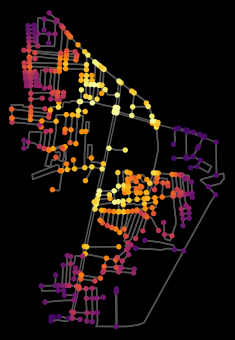

{'n': 423,
 'm': 960,
 'k_avg': 4.539007092198582,
 'intersection_count': 294,
 'streets_per_node_avg': 2.4988179669030735,
 'streets_per_node_counts': {0: 0, 1: 129, 2: 3, 3: 242, 4: 49},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3049645390070922,
  2: 0.0070921985815602835,
  3: 0.5721040189125296,
  4: 0.11583924349881797},
 'edge_length_total': 70267.38699999992,
 'edge_length_avg': 73.19519479166658,
 'street_length_total': 38443.95299999999,
 'street_length_avg': 74.7936828793774,
 'street_segments_count': 514,
 'node_density_km': 208.1331349490293,
 'intersection_density_km': 144.65990939719768,
 'edge_density_km': 34574.40080611501,
 'street_density_km': 18915.982169558243,
 'circuity_avg': 1.0930729056777357,
 'self_loop_proportion': 0.008333333333333333,
 'clean_intersection_count': 165,
 'clean_intersection_density_km': 81.18668384536605}

In [142]:
wardno = pnq_census[(pnq_census['Ward']== 139)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w139 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w139

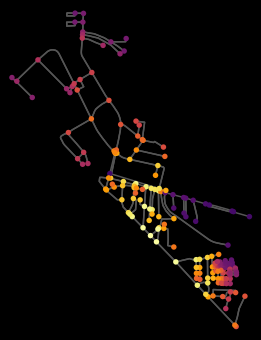

{'n': 183,
 'm': 411,
 'k_avg': 4.491803278688525,
 'intersection_count': 128,
 'streets_per_node_avg': 2.459016393442623,
 'streets_per_node_counts': {0: 0, 1: 55, 2: 0, 3: 117, 4: 11},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3005464480874317,
  2: 0.0,
  3: 0.639344262295082,
  4: 0.060109289617486336},
 'edge_length_total': 41105.70000000005,
 'edge_length_avg': 100.0138686131388,
 'street_length_total': 21849.349999999988,
 'street_length_avg': 99.76872146118716,
 'street_segments_count': 219,
 'node_density_km': 83.37504542465628,
 'intersection_density_km': 58.316971663147555,
 'edge_density_km': 18727.812047608182,
 'street_density_km': 9954.593162564002,
 'circuity_avg': 1.0690942182371317,
 'self_loop_proportion': 0.009732360097323601,
 'clean_intersection_count': 79,
 'clean_intersection_density_km': 35.992505948348885}

In [143]:
wardno = pnq_census[(pnq_census['Ward']== 140)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w140 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w140

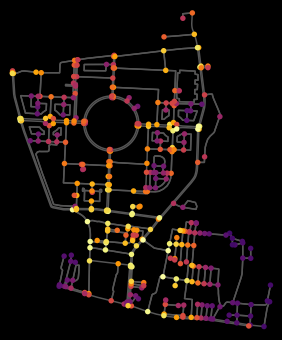

{'n': 341,
 'm': 771,
 'k_avg': 4.521994134897361,
 'intersection_count': 294,
 'streets_per_node_avg': 2.8621700879765397,
 'streets_per_node_counts': {0: 0, 1: 47, 2: 0, 3: 247, 4: 47},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1378299120234604,
  2: 0.0,
  3: 0.7243401759530792,
  4: 0.1378299120234604},
 'edge_length_total': 79546.21799999995,
 'edge_length_avg': 103.17278599221784,
 'street_length_total': 51531.208,
 'street_length_avg': 107.58081002087683,
 'street_segments_count': 479,
 'node_density_km': 107.93510938928256,
 'intersection_density_km': 93.05842275791517,
 'edge_density_km': 25178.38633822203,
 'street_density_km': 16310.928364932177,
 'circuity_avg': 1.1710264782840136,
 'self_loop_proportion': 0.018158236057068743,
 'clean_intersection_count': 189,
 'clean_intersection_density_km': 59.82327177294547}

In [144]:
wardno = pnq_census[(pnq_census['Ward']== 141)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w141 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w141

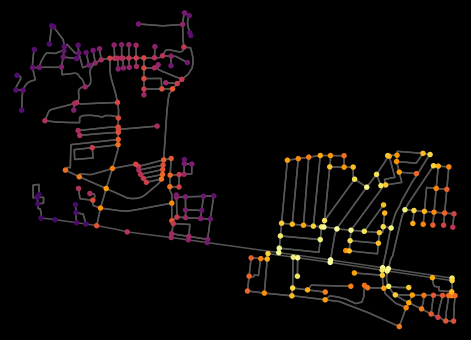

{'n': 248,
 'm': 596,
 'k_avg': 4.806451612903226,
 'intersection_count': 193,
 'streets_per_node_avg': 2.681451612903226,
 'streets_per_node_counts': {0: 0, 1: 55, 2: 0, 3: 162, 4: 31},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2217741935483871,
  2: 0.0,
  3: 0.6532258064516129,
  4: 0.125},
 'edge_length_total': 54732.561,
 'edge_length_avg': 91.83315604026846,
 'street_length_total': 29107.946000000007,
 'street_length_avg': 94.20047249190941,
 'street_segments_count': 309,
 'node_density_km': 113.86785126316099,
 'intersection_density_km': 88.61490037818577,
 'edge_density_km': 25130.157722580185,
 'street_density_km': 13364.755103645655,
 'circuity_avg': 1.0619785224172846,
 'self_loop_proportion': 0.003355704697986577,
 'clean_intersection_count': 152,
 'clean_intersection_density_km': 69.78997335484061}

In [145]:
wardno = pnq_census[(pnq_census['Ward']== 142)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w142 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w142

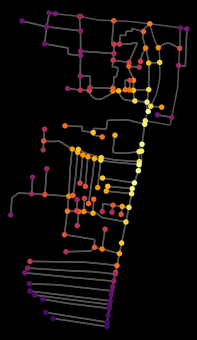

{'n': 135,
 'm': 296,
 'k_avg': 4.385185185185185,
 'intersection_count': 95,
 'streets_per_node_avg': 2.5037037037037035,
 'streets_per_node_counts': {0: 0, 1: 40, 2: 0, 3: 83, 4: 11, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.2962962962962963,
  2: 0.0,
  3: 0.6148148148148148,
  4: 0.08148148148148149,
  5: 0.007407407407407408},
 'edge_length_total': 23149.925999999992,
 'edge_length_avg': 78.20920945945943,
 'street_length_total': 12373.000000000002,
 'street_length_avg': 77.8176100628931,
 'street_segments_count': 159,
 'node_density_km': 232.2697915712724,
 'intersection_density_km': 163.4491125871917,
 'edge_density_km': 39829.84064378058,
 'street_density_km': 21287.95652675077,
 'circuity_avg': 1.0472128712442497,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 49,
 'clean_intersection_density_km': 84.30533175549887}

In [146]:
wardno = pnq_census[(pnq_census['Ward']== 143)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w143 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w143

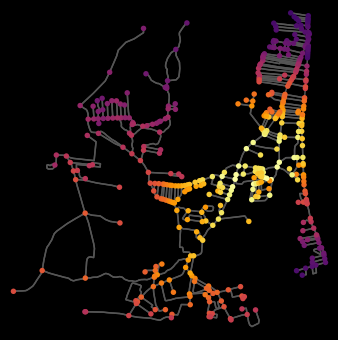

{'n': 435,
 'm': 985,
 'k_avg': 4.528735632183908,
 'intersection_count': 319,
 'streets_per_node_avg': 2.533333333333333,
 'streets_per_node_counts': {0: 0, 1: 116, 2: 0, 3: 290, 4: 29},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.26666666666666666,
  2: 0.0,
  3: 0.6666666666666666,
  4: 0.06666666666666667},
 'edge_length_total': 114843.282,
 'edge_length_avg': 116.59216446700508,
 'street_length_total': 59903.65900000003,
 'street_length_avg': 113.88528326996203,
 'street_segments_count': 526,
 'node_density_km': 55.35230485432956,
 'intersection_density_km': 40.59169022650834,
 'edge_density_km': 14613.42610513963,
 'street_density_km': 7622.541597374262,
 'circuity_avg': 1.0916145578456415,
 'self_loop_proportion': 0.01015228426395939,
 'clean_intersection_count': 220,
 'clean_intersection_density_km': 27.994269121729893}

In [147]:
wardno = pnq_census[(pnq_census['Ward']== 144)]
polygon = wardno['geometry'].iloc[0]
G = ox.graph_from_polygon(polygon, network_type='drive_service')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
w144 = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')
w144

In [148]:
infra = pd.DataFrame.from_dict([w1, w2, w3, w4, w5, w6, w7, w8, w9, w10,
                       w11, w12, w13, w14, w15, w16, w17, w18, w19, w20,
                       w21, w22, w23, w24, w25, w26, w27, w28, w29, w30,
                       w31, w32, w33, w34, w35, w36, w37, w38, w39, w40,
                       w41, w42, w43, w44, w45, w46, w47, w48, w49, w50,
                       w51, w52, w53, w54, w55, w56, w57, w58, w59, w60,
                       w61, w62, w63, w64, w65, w66, w67, w68, w69, w70,
                       w71, w72, w73, w74, w75, w76, w77, w78, w79, w80,
                       w81, w82, w83, w84, w85, w86, w87, w88, w89, w90,
                       w91, w92, w93, w94, w95, w96, w97, w98, w99, w100,
                       w101, w102, w103, w104, w105, w106, w107, w108, w109, w110,
                       w111, w112, w113, w114, w115, w116, w117, w118, w119, w120,
                       w121, w122, w123, w124, w125, w126, w127, w128, w129, w130,
                       w131, w132, w133, w134, w135, w136, w137, w138, w139, w140,
                       w141, w142, w143, w144])

In [149]:
infra.to_csv('data/osm_infra.csv')